In [ ]:
#importing essential libraries
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *

from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *

from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow as tf

In [ ]:
# run the first cell for all libraries

import numpy as np
import pandas as pd
from PIL import Image 
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from google.colab.patches import cv2_imshow
import os,io,cv2,shutil

from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive'

c = pd.read_csv('/content/drive/MyDrive/Final.csv')
covid = c.copy()
covid.head()

Mounted at /content/drive
 allcentralpixel.csv	       PNG
 AllTiff		       resized_balanced_test.npy
 balanced_test.npy	       resized_balanced_train.npy
 balanced_train.npy	       resized_balanced_valid.npy
 balanced_valid.npy	       resizedcp.ckpt.data-00000-of-00001
 checkpoint		       resizedcp.ckpt.index
'Colab Notebooks'	       resizedmodel
 cp.ckpt.data-00000-of-00001   Savingmodel
 cp.ckpt.index		       test.npy
 CroppedOpenLungs	       train11.npy
 Final.csv		       train22.npy
 Full.csv		       train.npy
 local.csv		       valid.npy
 model


,Unnamed: 0,index,loc,img,maximat2b,maximal2r,colsavg,rowsavg,croppedshape,maxnpfull,FullAvgPxlDen,CrpdAvgPxlDen,CentAvgPxlDen,OpenClose,label
0,0,0,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,[0 0 0 ... 0 0 0],"(99, 245, 427)","(152, 235, 378)",[ 42.36914062 43.45117188 44.63671875 46.08...,[ 20.10351562 20.0703125 20.02148438 20.02...,"(226, 328)",2191,439,622,672,Open,0
1,1,1,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,[0 0 0 ... 0 0 0],"(101, 244, 424)","(160, 263, 374)",[ 41.29101562 42.37695312 43.78125 45.46...,[ 20.45703125 20.61523438 20.64257812 20.85...,"(214, 323)",3039,475,583,634,Open,0
2,2,2,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,[0 0 0 ... 0 0 0],"(169, 274, 343)","(151, 249, 375)",[ 41.86914062 42.98632812 44.26171875 45.70...,[ 19.7109375 19.89257812 19.96875 20.38...,"(224, 174)",2212,424,885,895,Close,0
3,3,3,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,[0 0 0 ... 0 0 0],"(169, 254, 378)","(150, 271, 369)",[ 41.3515625 42.203125 43.56640625 45.07...,[ 19.66992188 19.734375 20.0703125 20.19...,"(219, 209)",2291,476,1031,1031,Close,0
4,4,4,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,[0 0 0 ... 0 0 0],"(93, 261, 434)","(148, 218, 379)",[ 43.41601562 44.4375 45.24023438 46.55...,[ 18.31835938 18.38476562 18.59179688 18.67...,"(231, 341)",2246,348,623,688,Open,0


In [ ]:
data = covid.drop(columns=['Unnamed: 0', 'img', 'maximat2b', 'maximal2r',
       'colsavg', 'rowsavg', 'croppedshape', 'maxnpfull', 'FullAvgPxlDen',
       'CrpdAvgPxlDen', 'CentAvgPxlDen'])
data.head(8)

,index,loc,OpenClose,label
0,0,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
1,1,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
2,2,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0
3,3,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0
4,4,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
5,5,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
6,6,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0
7,7,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0


In [ ]:
# location = 'C:/Users/mailn/Desktop/dataset'

In [ ]:
print(str(data['loc'][0])[31:])

COVID-CTset/normal3/patient336/SR_2/IM00018.tif


In [ ]:
data.head()

,index,loc,OpenClose,label
0,0,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
1,1,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0
2,2,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0
3,3,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close,0
4,4,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Open,0


Balancing

In [ ]:
X = data.drop('label',axis=1)
y = data['label']

n=[]
c=[]
for j,i in enumerate(data['label']):
    if i==0:
        n.append(j)
    else:
        c.append(j)


Considering Only Open COVID Cases

In [ ]:
OpenCovid=[]
for j,i in enumerate(data['label']):
    if data['OpenClose'].iloc[j]=="Open" and i == 1:
        OpenCovid.append(data['index'].iloc[j])

print(len(OpenCovid),'Open Covid out of',len(data))

8774 Open Covid out of 63849


In [ ]:
len(OpenCovid)

8774

In [ ]:
CovidOpen = data.iloc[OpenCovid]
X_normal = data.drop('label',axis=1).iloc[n]
y_normal = data['label'].iloc[n]
X_normal = X_normal.sample(len(OpenCovid),random_state=1)
y_normal = y_normal.sample(len(OpenCovid),random_state=1)

X_covid  = CovidOpen.drop('label',axis=1)
y_covid  = CovidOpen['label']

X=X_normal.append(X_covid)
y=y_normal.append(y_covid)
X=X.sample(frac=1)
y=y.sample(frac=1)


X_train, X_test, y_train, y_test     = train_test_split(X, y, test_size=0.2, random_state=42 , stratify = y)
X_train, X_val, y_train, y_val       = train_test_split(X_train, y_train, test_size=0.25, random_state=42,stratify = y_train)

print("Input : ",len(X))
print(" Normal : ",y.value_counts()[0])
print(" Covid  : ",y.value_counts()[1])
print("1   Train  : ",len(X_train))
print("     Normal: ",y_train.value_counts()[0])
print("     Covid : ",y_train.value_counts()[1])
print("2   Test   : ",len(X_test))
print("     Normal: ",y_test.value_counts()[0])
print("     Covid : ",y_test.value_counts()[1])
print("3   Valid. : ",len(X_val))
print("     Normal: ",y_val.value_counts()[0])
print("     Covid : ",y_val.value_counts()[1])

Input :  17548
 Normal :  8774
 Covid  :  8774
1   Train  :  10528
     Normal:  5264
     Covid :  5264
2   Test   :  3510
     Normal:  1755
     Covid :  1755
3   Valid. :  3510
     Normal:  1755
     Covid :  1755


#Conversion

In [ ]:
from google.colab import files
files.upload()

In [ ]:
filename = covid['loc'].iloc[2]
max = covid['maxnpfull'].iloc[2]
sampleimage = Image.open(filename)

In [ ]:
im = Image.open('opn11.tif')
img=cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
res = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('outpuut.png', res, [cv2.IMWRITE_PNG_COMPRESSION])

In [ ]:
!ls
ab = Image.open('outpuut.png')
plt.imshow(ab,'gray')

In [ ]:
files.download('outpuut.png')

In [ ]:
imgloclist = #list of image 
dest       = #destination folder

for j,i in enumerate(imgloclist):
    img=cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    res = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(dest+str(j)+'.png', res, [cv2.IMWRITE_PNG_COMPRESSION])

In [ ]:
def load(primary_keys):
    datas=[]
    for key in tqdm(primary_keys):
        key = int(key)
        if data['OpenClose'][key]=='Open':
            try:
                img = Image.open(data['loc'][key])       
                npar= np.array(img)
                res = cv2.resize(npar,(224, 224), interpolation = cv2.INTER_CUBIC)
                datas.append([res, data['label'][key]])
            except Exception as e:
                print(e)
        else:
            print("Closed?",data['index'][key])
    return np.array(datas)

In [ ]:
X_train.head()

,index,loc,OpenClose
40715,40715,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
46324,46324,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
50892,50892,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
32639,32639,/content/drive/MyDrive/AllTiff/COVID-CTset/nor...,Close
42795,42795,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open


In [ ]:
# train = load(list((X_train['index'])))
# valid = load(list(X_val['index']))

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

10528
3510
3510


In [22]:
#TIME CONSUMING

X_train_mini = X_train #[:8000] #X_train.sample(frac=.65)
X_val_mini   = X_val  #[:2000] 
X_test_mini  = X_test #[:2000] 
train = load(list((X_train_mini['index'])))
valid = load(list(X_val_mini['index']))
test  = load(list(X_test_mini['index']))

 98%|█████████▊| 10345/10528 [1:01:23<00:48,  3.81it/s]

Closed? 56035


 98%|█████████▊| 10348/10528 [1:01:24<00:42,  4.22it/s]

Closed? 12821


 98%|█████████▊| 10354/10528 [1:01:25<00:49,  3.51it/s]

Closed? 12935


 98%|█████████▊| 10357/10528 [1:01:26<00:48,  3.49it/s]

Closed? 55812


 98%|█████████▊| 10367/10528 [1:01:29<00:44,  3.59it/s]

Closed? 60567


 99%|█████████▊| 10373/10528 [1:01:31<01:00,  2.55it/s]

Closed? 59004


 99%|█████████▊| 10384/10528 [1:01:34<00:44,  3.25it/s]

Closed? 62926


 99%|█████████▊| 10388/10528 [1:01:35<00:43,  3.23it/s]

Closed? 62188
Closed? 35608


 99%|█████████▊| 10391/10528 [1:01:35<00:33,  4.07it/s]

Closed? 12508


 99%|█████████▉| 10414/10528 [1:01:41<00:33,  3.45it/s]

Closed? 19255


 99%|█████████▉| 10426/10528 [1:01:45<00:30,  3.39it/s]

Closed? 31622


 99%|█████████▉| 10430/10528 [1:01:46<00:23,  4.10it/s]

Closed? 31546


 99%|█████████▉| 10434/10528 [1:01:47<00:24,  3.90it/s]

Closed? 3491


 99%|█████████▉| 10439/10528 [1:01:48<00:24,  3.59it/s]

Closed? 21196
Closed? 23146


 99%|█████████▉| 10446/10528 [1:01:49<00:18,  4.47it/s]

Closed? 26844
Closed? 23056


 99%|█████████▉| 10451/10528 [1:01:50<00:12,  6.18it/s]

Closed? 23537


 99%|█████████▉| 10459/10528 [1:01:52<00:20,  3.38it/s]

Closed? 36960


 99%|█████████▉| 10466/10528 [1:01:54<00:13,  4.76it/s]

Closed? 29995


 99%|█████████▉| 10473/10528 [1:01:56<00:15,  3.45it/s]

Closed? 34823
Closed? 28874


100%|█████████▉| 10476/10528 [1:01:56<00:11,  4.42it/s]

Closed? 33995


100%|█████████▉| 10478/10528 [1:01:56<00:10,  4.63it/s]

Closed? 4511


100%|█████████▉| 10489/10528 [1:01:59<00:11,  3.38it/s]

Closed? 11034


100%|█████████▉| 10493/10528 [1:02:01<00:10,  3.31it/s]

Closed? 8735


100%|█████████▉| 10496/10528 [1:02:01<00:09,  3.25it/s]

Closed? 29203


100%|█████████▉| 10502/10528 [1:02:02<00:05,  4.61it/s]

Closed? 62920
Closed? 59615
Closed? 21873
Closed? 2195


100%|█████████▉| 10507/10528 [1:02:03<00:04,  4.67it/s]

Closed? 7465


100%|█████████▉| 10522/10528 [1:02:08<00:02,  2.61it/s]

Closed? 10801


100%|██████████| 10528/10528 [1:02:10<00:00,  2.82it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
  0%|          | 0/3510 [00:00<?, ?it/s]

Closed? 53190


  0%|          | 2/3510 [00:00<08:05,  7.22it/s]

Closed? 30710


  0%|          | 7/3510 [00:01<12:56,  4.51it/s]

Closed? 26229


  0%|          | 10/3510 [00:02<17:01,  3.43it/s]

Closed? 15012


  0%|          | 13/3510 [00:03<17:01,  3.42it/s]

Closed? 18340


  0%|          | 16/3510 [00:03<15:53,  3.66it/s]

Closed? 25033


  1%|          | 27/3510 [00:06<14:47,  3.93it/s]

Closed? 14405


  1%|          | 36/3510 [00:09<18:27,  3.14it/s]

Closed? 59965


  1%|          | 40/3510 [00:10<15:57,  3.63it/s]

Closed? 14267
Closed? 35389


  1%|▏         | 46/3510 [00:11<10:55,  5.29it/s]

Closed? 56292


  1%|▏         | 51/3510 [00:12<14:38,  3.94it/s]

Closed? 15185


  2%|▏         | 62/3510 [00:15<20:50,  2.76it/s]

Closed? 36629
Closed? 55099


  2%|▏         | 67/3510 [00:16<18:21,  3.13it/s]

Closed? 3050


  2%|▏         | 71/3510 [00:17<15:41,  3.65it/s]

Closed? 30880


  2%|▏         | 77/3510 [00:19<14:28,  3.95it/s]

Closed? 57030


  2%|▏         | 86/3510 [00:21<15:10,  3.76it/s]

Closed? 17275


  3%|▎         | 90/3510 [00:22<15:08,  3.76it/s]

Closed? 26325


  3%|▎         | 104/3510 [00:25<12:24,  4.58it/s]

Closed? 26134
Closed? 8581
Closed? 12506


  3%|▎         | 108/3510 [00:26<13:09,  4.31it/s]

Closed? 55837


  3%|▎         | 111/3510 [00:27<15:26,  3.67it/s]

Closed? 5194


  3%|▎         | 115/3510 [00:27<13:40,  4.14it/s]

Closed? 35089


  3%|▎         | 120/3510 [00:29<14:19,  3.94it/s]

Closed? 60427
Closed? 18269


  4%|▎         | 124/3510 [00:29<10:48,  5.22it/s]

Closed? 23470


  4%|▎         | 129/3510 [00:30<15:17,  3.68it/s]

Closed? 28662
Closed? 13263


  4%|▍         | 132/3510 [00:31<12:54,  4.36it/s]

Closed? 6907


  4%|▍         | 134/3510 [00:31<10:56,  5.14it/s]

Closed? 52834


  4%|▍         | 140/3510 [00:32<15:12,  3.69it/s]

Closed? 460
Closed? 21473


  4%|▍         | 155/3510 [00:36<18:39,  3.00it/s]

Closed? 19974
Closed? 22635


  5%|▍         | 161/3510 [00:37<16:29,  3.38it/s]

Closed? 26232


  5%|▍         | 163/3510 [00:38<15:12,  3.67it/s]

Closed? 36018


  5%|▍         | 166/3510 [00:38<12:26,  4.48it/s]

Closed? 20238


  5%|▍         | 170/3510 [00:39<11:53,  4.68it/s]

Closed? 34000


  5%|▌         | 179/3510 [00:41<19:01,  2.92it/s]

Closed? 61055


  5%|▌         | 182/3510 [00:42<17:16,  3.21it/s]

Closed? 33217


  5%|▌         | 185/3510 [00:43<15:34,  3.56it/s]

Closed? 62756


  5%|▌         | 187/3510 [00:43<14:35,  3.80it/s]

Closed? 28821


  5%|▌         | 191/3510 [00:44<12:53,  4.29it/s]

Closed? 14938


  5%|▌         | 192/3510 [00:44<14:36,  3.78it/s]

Closed? 19189


  6%|▌         | 194/3510 [00:45<13:09,  4.20it/s]

Closed? 6747


  6%|▌         | 200/3510 [00:47<17:36,  3.13it/s]

Closed? 54708


  6%|▌         | 205/3510 [00:48<16:17,  3.38it/s]

Closed? 26310
Closed? 56082


  6%|▌         | 214/3510 [00:51<17:54,  3.07it/s]

Closed? 62861


  6%|▌         | 216/3510 [00:51<15:41,  3.50it/s]

Closed? 30418


  6%|▋         | 224/3510 [00:54<18:04,  3.03it/s]

Closed? 20425


  7%|▋         | 231/3510 [00:56<18:08,  3.01it/s]

Closed? 13259


  7%|▋         | 233/3510 [00:56<15:00,  3.64it/s]

Closed? 34954


  7%|▋         | 236/3510 [00:57<16:36,  3.28it/s]

Closed? 23581


  7%|▋         | 239/3510 [00:57<13:40,  3.99it/s]

Closed? 54254
Closed? 14616


  7%|▋         | 245/3510 [00:59<15:39,  3.47it/s]

Closed? 59058


  7%|▋         | 247/3510 [00:59<14:26,  3.77it/s]

Closed? 32409


  7%|▋         | 249/3510 [01:00<13:32,  4.01it/s]

Closed? 35041


  8%|▊         | 266/3510 [01:05<18:00,  3.00it/s]

Closed? 56309


  8%|▊         | 271/3510 [01:06<13:10,  4.10it/s]

Closed? 2732


  8%|▊         | 272/3510 [01:06<12:03,  4.48it/s]

Closed? 60473


  8%|▊         | 277/3510 [01:07<08:52,  6.07it/s]

Closed? 54881


  8%|▊         | 286/3510 [01:10<16:34,  3.24it/s]

Closed? 30850


  8%|▊         | 288/3510 [01:10<14:25,  3.72it/s]

Closed? 457


  8%|▊         | 297/3510 [01:13<15:32,  3.44it/s]

Closed? 6728


  9%|▉         | 315/3510 [01:18<17:11,  3.10it/s]

Closed? 32257


  9%|▉         | 326/3510 [01:22<18:15,  2.91it/s]

Closed? 12104


  9%|▉         | 330/3510 [01:22<12:46,  4.15it/s]

Closed? 7929


  9%|▉         | 331/3510 [01:22<14:21,  3.69it/s]

Closed? 8034
Closed? 31198


 10%|▉         | 334/3510 [01:23<12:14,  4.32it/s]

Closed? 54314
Closed? 31997


 10%|█         | 367/3510 [01:32<16:09,  3.24it/s]

Closed? 59306


 11%|█         | 371/3510 [01:33<14:49,  3.53it/s]

Closed? 36901
Closed? 13550


 11%|█         | 376/3510 [01:34<12:14,  4.27it/s]

Closed? 63784


 11%|█         | 382/3510 [01:35<12:08,  4.29it/s]

Closed? 34485


 11%|█▏        | 396/3510 [01:40<18:23,  2.82it/s]

Closed? 35999


 12%|█▏        | 404/3510 [01:42<13:08,  3.94it/s]

Closed? 559
Closed? 18165


 12%|█▏        | 408/3510 [01:43<15:06,  3.42it/s]

Closed? 13257


 12%|█▏        | 414/3510 [01:44<14:33,  3.54it/s]

Closed? 62979
Closed? 23459


 12%|█▏        | 423/3510 [01:47<18:04,  2.85it/s]

Closed? 23493


 12%|█▏        | 429/3510 [01:48<12:03,  4.26it/s]

Closed? 17845


 13%|█▎        | 439/3510 [01:51<12:38,  4.05it/s]

Closed? 31358
Closed? 60729


 13%|█▎        | 442/3510 [01:52<11:59,  4.26it/s]

Closed? 6450
Closed? 26707
Closed? 15626
Closed? 8138


 13%|█▎        | 468/3510 [01:59<16:54,  3.00it/s]

Closed? 56833


 14%|█▎        | 475/3510 [02:01<14:55,  3.39it/s]

Closed? 23508
Closed? 32189


 14%|█▍        | 484/3510 [02:03<17:58,  2.81it/s]

Closed? 59514


 14%|█▍        | 487/3510 [02:04<16:48,  3.00it/s]

Closed? 26480
Closed? 63627


 14%|█▍        | 495/3510 [02:06<15:10,  3.31it/s]

Closed? 6689


 14%|█▍        | 507/3510 [02:11<19:26,  2.57it/s]

Closed? 55333


 15%|█▍        | 510/3510 [02:12<17:15,  2.90it/s]

Closed? 25864


 15%|█▍        | 513/3510 [02:12<15:17,  3.27it/s]

Closed? 7130


 15%|█▍        | 515/3510 [02:13<13:48,  3.61it/s]

Closed? 142


 15%|█▍        | 519/3510 [02:14<15:43,  3.17it/s]

Closed? 54299
Closed? 4928


 15%|█▌        | 531/3510 [02:17<14:11,  3.50it/s]

Closed? 25154


 15%|█▌        | 533/3510 [02:17<12:30,  3.96it/s]

Closed? 5827


 16%|█▌        | 557/3510 [02:24<16:39,  2.96it/s]

Closed? 26471


 16%|█▌        | 561/3510 [02:25<14:59,  3.28it/s]

Closed? 9090


 16%|█▌        | 563/3510 [02:25<12:28,  3.94it/s]

Closed? 23227


 16%|█▌        | 565/3510 [02:26<12:05,  4.06it/s]

Closed? 29286


 16%|█▌        | 570/3510 [02:27<15:42,  3.12it/s]

Closed? 12640


 16%|█▋        | 572/3510 [02:28<12:44,  3.84it/s]

Closed? 18186


 16%|█▋        | 579/3510 [02:30<15:25,  3.17it/s]

Closed? 30534
Closed? 59330


 17%|█▋        | 586/3510 [02:31<09:57,  4.90it/s]

Closed? 30183


 17%|█▋        | 598/3510 [02:34<11:17,  4.30it/s]

Closed? 36297


 17%|█▋        | 607/3510 [02:37<17:44,  2.73it/s]

Closed? 63286


 17%|█▋        | 610/3510 [02:38<14:37,  3.31it/s]

Closed? 23960


 17%|█▋        | 614/3510 [02:38<12:46,  3.78it/s]

Closed? 10895


 18%|█▊        | 616/3510 [02:39<11:28,  4.20it/s]

Closed? 6746


 18%|█▊        | 619/3510 [02:40<13:26,  3.58it/s]

Closed? 33011


 18%|█▊        | 628/3510 [02:43<18:57,  2.53it/s]

Closed? 973


 19%|█▊        | 654/3510 [02:51<19:02,  2.50it/s]

Closed? 20160


 19%|█▉        | 664/3510 [02:53<13:27,  3.52it/s]

Closed? 4695


 19%|█▉        | 669/3510 [02:55<15:24,  3.07it/s]

Closed? 19725


 19%|█▉        | 677/3510 [02:57<14:58,  3.15it/s]

Closed? 21536
Closed? 17127


 19%|█▉        | 680/3510 [02:57<12:04,  3.91it/s]

Closed? 31023


 19%|█▉        | 683/3510 [02:58<10:05,  4.67it/s]

Closed? 35272
Closed? 22536
Closed? 4738


 20%|█▉        | 692/3510 [03:00<14:04,  3.34it/s]

Closed? 29357


 20%|█▉        | 695/3510 [03:01<14:11,  3.31it/s]

Closed? 22879


 20%|█▉        | 701/3510 [03:02<13:02,  3.59it/s]

Closed? 29424


 21%|██        | 731/3510 [03:11<15:13,  3.04it/s]

Closed? 25679


 21%|██▏       | 750/3510 [03:16<10:18,  4.46it/s]

Closed? 12618


 21%|██▏       | 754/3510 [03:17<13:53,  3.31it/s]

Closed? 9189


 22%|██▏       | 756/3510 [03:17<12:22,  3.71it/s]

Closed? 9705


 22%|██▏       | 780/3510 [03:25<13:27,  3.38it/s]

Closed? 25756


 22%|██▏       | 784/3510 [03:26<11:59,  3.79it/s]

Closed? 55177
Closed? 12353


 22%|██▏       | 788/3510 [03:26<10:44,  4.22it/s]

Closed? 34951


 23%|██▎       | 802/3510 [03:30<11:32,  3.91it/s]

Closed? 3272
Closed? 19572


 23%|██▎       | 805/3510 [03:31<12:31,  3.60it/s]

Closed? 58746


 23%|██▎       | 811/3510 [03:32<13:09,  3.42it/s]

Closed? 32656


 23%|██▎       | 819/3510 [03:34<13:37,  3.29it/s]

Closed? 31563


 23%|██▎       | 822/3510 [03:35<11:47,  3.80it/s]

Closed? 36916


 24%|██▎       | 830/3510 [03:37<09:37,  4.64it/s]

Closed? 20629


 24%|██▎       | 833/3510 [03:38<12:32,  3.56it/s]

Closed? 61232
Closed? 7707


 24%|██▍       | 841/3510 [03:40<13:59,  3.18it/s]

Closed? 22167
Closed? 2539


 24%|██▍       | 859/3510 [03:44<11:25,  3.87it/s]

Closed? 24819


 25%|██▍       | 867/3510 [03:47<16:44,  2.63it/s]

Closed? 24013


 25%|██▍       | 872/3510 [03:48<12:12,  3.60it/s]

Closed? 32477
Closed? 32887


 25%|██▍       | 876/3510 [03:49<10:45,  4.08it/s]

Closed? 27007
Closed? 59024


 26%|██▌       | 900/3510 [03:56<17:05,  2.55it/s]

Closed? 35843


 26%|██▌       | 921/3510 [04:03<13:26,  3.21it/s]

Closed? 14667


 26%|██▋       | 923/3510 [04:03<11:53,  3.62it/s]

Closed? 18964


 27%|██▋       | 941/3510 [04:09<13:37,  3.14it/s]

Closed? 9270


 27%|██▋       | 952/3510 [04:12<10:17,  4.14it/s]

Closed? 18528


 27%|██▋       | 963/3510 [04:14<10:38,  3.99it/s]

Closed? 25718


 28%|██▊       | 971/3510 [04:17<13:37,  3.10it/s]

Closed? 63115


 28%|██▊       | 990/3510 [04:23<13:56,  3.01it/s]

Closed? 27647


 28%|██▊       | 996/3510 [04:24<10:19,  4.06it/s]

Closed? 33429


 28%|██▊       | 1000/3510 [04:26<12:26,  3.36it/s]

Closed? 34004


 29%|██▊       | 1005/3510 [04:27<12:57,  3.22it/s]

Closed? 24851


 29%|██▉       | 1011/3510 [04:29<12:28,  3.34it/s]

Closed? 60913
Closed? 23917


 29%|██▉       | 1018/3510 [04:30<13:24,  3.10it/s]

Closed? 12129


 29%|██▉       | 1026/3510 [04:33<13:50,  2.99it/s]

Closed? 8051


 29%|██▉       | 1031/3510 [04:34<12:03,  3.43it/s]

Closed? 8806


 29%|██▉       | 1033/3510 [04:35<11:11,  3.69it/s]

Closed? 15846
Closed? 54861


 30%|██▉       | 1037/3510 [04:35<10:03,  4.10it/s]

Closed? 2124


 30%|██▉       | 1045/3510 [04:38<14:54,  2.76it/s]

Closed? 15291


 30%|██▉       | 1051/3510 [04:39<11:26,  3.58it/s]

Closed? 62936


 30%|███       | 1062/3510 [04:42<13:24,  3.04it/s]

Closed? 31568


 30%|███       | 1064/3510 [04:42<10:38,  3.83it/s]

Closed? 31619


 31%|███       | 1077/3510 [04:46<12:11,  3.33it/s]

Closed? 1255


 31%|███       | 1086/3510 [04:49<12:35,  3.21it/s]

Closed? 3219
Closed? 60793


 31%|███       | 1096/3510 [04:51<10:29,  3.84it/s]

Closed? 14651


 32%|███▏      | 1123/3510 [04:59<10:55,  3.64it/s]

Closed? 62494
Closed? 643


 32%|███▏      | 1134/3510 [05:01<09:01,  4.39it/s]

Closed? 30180
Closed? 959
Closed? 26541


 33%|███▎      | 1141/3510 [05:03<10:18,  3.83it/s]

Closed? 27217


 33%|███▎      | 1147/3510 [05:04<12:19,  3.19it/s]

Closed? 5004


 33%|███▎      | 1154/3510 [05:05<07:53,  4.98it/s]

Closed? 29878


 33%|███▎      | 1157/3510 [05:06<08:05,  4.84it/s]

Closed? 60846


 33%|███▎      | 1167/3510 [05:09<15:47,  2.47it/s]

Closed? 59335


 33%|███▎      | 1170/3510 [05:10<12:04,  3.23it/s]

Closed? 7896


 34%|███▍      | 1189/3510 [05:16<13:00,  2.97it/s]

Closed? 10064
Closed? 56555


 34%|███▍      | 1194/3510 [05:17<11:52,  3.25it/s]

Closed? 21784


 34%|███▍      | 1199/3510 [05:18<12:54,  2.98it/s]

Closed? 62666


 34%|███▍      | 1203/3510 [05:19<12:06,  3.17it/s]

Closed? 54876


 34%|███▍      | 1206/3510 [05:20<09:55,  3.87it/s]

Closed? 57156


 34%|███▍      | 1208/3510 [05:20<08:44,  4.39it/s]

Closed? 61685


 35%|███▍      | 1211/3510 [05:21<07:51,  4.87it/s]

Closed? 34837


 35%|███▍      | 1213/3510 [05:21<06:57,  5.50it/s]

Closed? 4497


 35%|███▍      | 1224/3510 [05:24<11:17,  3.37it/s]

Closed? 3859
Closed? 25092


 35%|███▌      | 1238/3510 [05:27<11:30,  3.29it/s]

Closed? 29796


 36%|███▌      | 1252/3510 [05:31<09:58,  3.77it/s]

Closed? 6089
Closed? 25410


 36%|███▌      | 1254/3510 [05:32<09:52,  3.81it/s]

Closed? 8808


 36%|███▌      | 1261/3510 [05:34<12:35,  2.98it/s]

Closed? 56501


 36%|███▋      | 1273/3510 [05:37<13:34,  2.75it/s]

Closed? 57863


 36%|███▋      | 1276/3510 [05:38<13:07,  2.84it/s]

Closed? 53270


 36%|███▋      | 1281/3510 [05:39<12:07,  3.06it/s]

Closed? 36317
Closed? 30236
Closed? 3759


 37%|███▋      | 1296/3510 [05:43<11:42,  3.15it/s]

Closed? 19002


 37%|███▋      | 1298/3510 [05:44<10:40,  3.46it/s]

Closed? 62629


 37%|███▋      | 1312/3510 [05:48<11:16,  3.25it/s]

Closed? 23337
Closed? 34313


 38%|███▊      | 1317/3510 [05:48<07:14,  5.05it/s]

Closed? 30656


 38%|███▊      | 1323/3510 [05:49<07:10,  5.08it/s]

Closed? 33064


 38%|███▊      | 1326/3510 [05:50<09:13,  3.95it/s]

Closed? 5467


 38%|███▊      | 1338/3510 [05:53<08:44,  4.14it/s]

Closed? 53492


 38%|███▊      | 1345/3510 [05:55<09:12,  3.92it/s]

Closed? 61812


 38%|███▊      | 1349/3510 [05:56<09:16,  3.88it/s]

Closed? 26258
Closed? 59492
Closed? 21240


 39%|███▉      | 1373/3510 [06:04<11:51,  3.00it/s]

Closed? 27785
Closed? 25758
Closed? 23596


 39%|███▉      | 1378/3510 [06:04<10:31,  3.38it/s]

Closed? 6474


 39%|███▉      | 1385/3510 [06:06<08:45,  4.04it/s]

Closed? 17243


 40%|███▉      | 1391/3510 [06:08<10:33,  3.34it/s]

Closed? 6665


 40%|████      | 1410/3510 [06:13<11:39,  3.00it/s]

Closed? 23183


 41%|████      | 1423/3510 [06:16<08:53,  3.91it/s]

Closed? 13946


 41%|████      | 1427/3510 [06:17<09:25,  3.68it/s]

Closed? 2090


 41%|████▏     | 1451/3510 [06:25<14:36,  2.35it/s]

Closed? 30834


 41%|████▏     | 1454/3510 [06:26<11:20,  3.02it/s]

Closed? 1205


 42%|████▏     | 1457/3510 [06:26<08:54,  3.84it/s]

Closed? 61025


 42%|████▏     | 1461/3510 [06:27<09:40,  3.53it/s]

Closed? 17597


 42%|████▏     | 1470/3510 [06:30<11:14,  3.02it/s]

Closed? 61773


 42%|████▏     | 1476/3510 [06:32<09:41,  3.50it/s]

Closed? 422


 42%|████▏     | 1479/3510 [06:33<11:01,  3.07it/s]

Closed? 26370
Closed? 56724


 42%|████▏     | 1487/3510 [06:34<07:37,  4.42it/s]

Closed? 34278


 42%|████▏     | 1489/3510 [06:35<08:37,  3.91it/s]

Closed? 59940


 43%|████▎     | 1500/3510 [06:38<12:56,  2.59it/s]

Closed? 25865


 43%|████▎     | 1506/3510 [06:39<07:31,  4.44it/s]

Closed? 11724
Closed? 24219
Closed? 53605


 43%|████▎     | 1509/3510 [06:39<07:42,  4.33it/s]

Closed? 31210


 43%|████▎     | 1511/3510 [06:40<06:28,  5.15it/s]

Closed? 15958
Closed? 16438


 43%|████▎     | 1521/3510 [06:42<09:31,  3.48it/s]

Closed? 28827


 44%|████▎     | 1533/3510 [06:45<08:57,  3.68it/s]

Closed? 24238


 44%|████▍     | 1544/3510 [06:48<08:42,  3.76it/s]

Closed? 10087
Closed? 60028


 44%|████▍     | 1549/3510 [06:49<09:26,  3.46it/s]

Closed? 57749


 44%|████▍     | 1552/3510 [06:50<07:23,  4.42it/s]

Closed? 53640


 44%|████▍     | 1557/3510 [06:51<09:27,  3.44it/s]

Closed? 12204


 45%|████▍     | 1566/3510 [06:54<10:19,  3.14it/s]

Closed? 36359
Closed? 15350


 45%|████▍     | 1577/3510 [06:57<12:07,  2.66it/s]

Closed? 30752


 45%|████▌     | 1581/3510 [06:57<10:08,  3.17it/s]

Closed? 9807


 45%|████▌     | 1587/3510 [06:59<08:49,  3.63it/s]

Closed? 27658


 45%|████▌     | 1597/3510 [07:02<09:28,  3.36it/s]

Closed? 15519


 46%|████▌     | 1603/3510 [07:04<10:16,  3.09it/s]

Closed? 388


 46%|████▌     | 1613/3510 [07:07<10:32,  3.00it/s]

Closed? 30023
Closed? 30942


 46%|████▌     | 1617/3510 [07:08<09:38,  3.27it/s]

Closed? 33649


 46%|████▌     | 1619/3510 [07:08<08:17,  3.80it/s]

Closed? 2382


 46%|████▌     | 1623/3510 [07:10<09:38,  3.26it/s]

Closed? 14122


 46%|████▋     | 1627/3510 [07:11<11:20,  2.77it/s]

Closed? 54850


 46%|████▋     | 1631/3510 [07:12<09:13,  3.39it/s]

Closed? 10424


 47%|████▋     | 1636/3510 [07:13<09:30,  3.28it/s]

Closed? 29395


 47%|████▋     | 1646/3510 [07:16<08:43,  3.56it/s]

Closed? 35701


 48%|████▊     | 1669/3510 [07:24<10:34,  2.90it/s]

Closed? 27188


 48%|████▊     | 1686/3510 [07:30<08:58,  3.39it/s]

Closed? 36064


 48%|████▊     | 1690/3510 [07:31<09:07,  3.32it/s]

Closed? 21523


 48%|████▊     | 1699/3510 [07:33<10:25,  2.90it/s]

Closed? 11527


 49%|████▊     | 1705/3510 [07:35<10:05,  2.98it/s]

Closed? 7565


 49%|████▉     | 1716/3510 [07:38<08:03,  3.71it/s]

Closed? 25935


 49%|████▉     | 1729/3510 [07:43<11:23,  2.60it/s]

Closed? 62058


 49%|████▉     | 1734/3510 [07:44<11:00,  2.69it/s]

Closed? 12989


 50%|████▉     | 1743/3510 [07:46<06:23,  4.61it/s]

Closed? 23841
Closed? 2886


 50%|████▉     | 1745/3510 [07:47<06:29,  4.54it/s]

Closed? 20173


 50%|████▉     | 1747/3510 [07:47<06:10,  4.76it/s]

Closed? 60807


 50%|█████     | 1761/3510 [07:52<11:27,  2.55it/s]

Closed? 27641


 50%|█████     | 1768/3510 [07:53<06:55,  4.19it/s]

Closed? 9208
Closed? 58771


 50%|█████     | 1772/3510 [07:54<08:28,  3.42it/s]

Closed? 53783


 51%|█████     | 1783/3510 [07:57<09:13,  3.12it/s]

Closed? 53597


 51%|█████     | 1787/3510 [07:58<09:18,  3.08it/s]

Closed? 23195
Closed? 24803


 51%|█████     | 1795/3510 [08:00<07:29,  3.81it/s]

Closed? 28302


 51%|█████▏    | 1799/3510 [08:01<10:06,  2.82it/s]

Closed? 16381
Closed? 17630
Closed? 36500


 52%|█████▏    | 1810/3510 [08:04<08:19,  3.40it/s]

Closed? 61632


 52%|█████▏    | 1814/3510 [08:05<10:52,  2.60it/s]

Closed? 3118


 52%|█████▏    | 1831/3510 [08:11<09:33,  2.93it/s]

Closed? 24416


 52%|█████▏    | 1833/3510 [08:11<08:19,  3.36it/s]

Closed? 3903


 52%|█████▏    | 1835/3510 [08:12<07:17,  3.83it/s]

Closed? 10880
Closed? 35399


 52%|█████▏    | 1842/3510 [08:14<08:16,  3.36it/s]

Closed? 19985


 53%|█████▎    | 1845/3510 [08:14<06:30,  4.27it/s]

Closed? 34806


 53%|█████▎    | 1848/3510 [08:15<07:47,  3.55it/s]

Closed? 55181


 53%|█████▎    | 1859/3510 [08:18<09:01,  3.05it/s]

Closed? 62677
Closed? 32362


 53%|█████▎    | 1870/3510 [08:22<08:50,  3.09it/s]

Closed? 21714


 54%|█████▍    | 1889/3510 [08:28<10:00,  2.70it/s]

Closed? 61489


 54%|█████▍    | 1893/3510 [08:29<11:16,  2.39it/s]

Closed? 871


 54%|█████▍    | 1898/3510 [08:31<08:42,  3.08it/s]

Closed? 26073


 54%|█████▍    | 1902/3510 [08:32<09:00,  2.98it/s]

Closed? 57973


 54%|█████▍    | 1905/3510 [08:32<07:09,  3.74it/s]

Closed? 30820
Closed? 30124


 54%|█████▍    | 1908/3510 [08:33<06:03,  4.41it/s]

Closed? 25802
Closed? 29559
Closed? 59562
Closed? 36068


 55%|█████▍    | 1926/3510 [08:38<09:04,  2.91it/s]

Closed? 61818


 55%|█████▌    | 1932/3510 [08:39<08:09,  3.22it/s]

Closed? 17295
Closed? 57225


 55%|█████▌    | 1936/3510 [08:40<07:52,  3.33it/s]

Closed? 25094


 55%|█████▌    | 1938/3510 [08:41<07:17,  3.59it/s]

Closed? 32550


 55%|█████▌    | 1943/3510 [08:42<08:44,  2.99it/s]

Closed? 58154


 55%|█████▌    | 1945/3510 [08:43<07:29,  3.48it/s]

Closed? 7000
Closed? 36698


 56%|█████▌    | 1953/3510 [08:45<13:31,  1.92it/s]

Closed? 22261


 56%|█████▌    | 1959/3510 [08:47<09:44,  2.66it/s]

Closed? 13271
Closed? 18723


 56%|█████▌    | 1966/3510 [08:49<08:07,  3.16it/s]

Closed? 6745


 56%|█████▌    | 1971/3510 [08:50<07:09,  3.58it/s]

Closed? 55708


 56%|█████▌    | 1974/3510 [08:51<06:18,  4.05it/s]

Closed? 9943


 56%|█████▋    | 1976/3510 [08:51<05:55,  4.32it/s]

Closed? 16479


 56%|█████▋    | 1979/3510 [08:52<05:19,  4.79it/s]

Closed? 21472


 57%|█████▋    | 2005/3510 [09:00<07:46,  3.22it/s]

Closed? 10572
Closed? 28903


 57%|█████▋    | 2008/3510 [09:01<05:57,  4.20it/s]

Closed? 13668


 57%|█████▋    | 2013/3510 [09:02<06:41,  3.73it/s]

Closed? 34913


 58%|█████▊    | 2023/3510 [09:05<08:07,  3.05it/s]

Closed? 12768


 58%|█████▊    | 2037/3510 [09:10<08:31,  2.88it/s]

Closed? 2602


 58%|█████▊    | 2040/3510 [09:10<08:09,  3.00it/s]

Closed? 54523


 59%|█████▊    | 2060/3510 [09:17<07:47,  3.10it/s]

Closed? 30891


 59%|█████▉    | 2068/3510 [09:20<08:25,  2.85it/s]

Closed? 59543


 59%|█████▉    | 2071/3510 [09:20<07:45,  3.09it/s]

Closed? 26795


 59%|█████▉    | 2079/3510 [09:23<10:17,  2.32it/s]

Closed? 33002


 59%|█████▉    | 2083/3510 [09:25<08:41,  2.74it/s]

Closed? 63797


 59%|█████▉    | 2085/3510 [09:25<06:56,  3.42it/s]

Closed? 27274


 59%|█████▉    | 2088/3510 [09:25<05:48,  4.08it/s]

Closed? 22173


 60%|█████▉    | 2091/3510 [09:26<06:22,  3.71it/s]

Closed? 55758


 60%|██████    | 2111/3510 [09:32<08:49,  2.64it/s]

Closed? 26765


 60%|██████    | 2115/3510 [09:33<06:52,  3.38it/s]

Closed? 20802


 60%|██████    | 2119/3510 [09:34<08:17,  2.79it/s]

Closed? 21128


 61%|██████    | 2133/3510 [09:39<07:20,  3.13it/s]

Closed? 33979


 61%|██████    | 2135/3510 [09:39<05:58,  3.84it/s]

Closed? 15644
Closed? 18669


 61%|██████    | 2145/3510 [09:42<08:29,  2.68it/s]

Closed? 12812


 61%|██████▏   | 2150/3510 [09:44<07:55,  2.86it/s]

Closed? 29741
Closed? 7244


 61%|██████▏   | 2154/3510 [09:44<05:38,  4.01it/s]

Closed? 14092


 61%|██████▏   | 2158/3510 [09:45<04:37,  4.88it/s]

Closed? 57941


 62%|██████▏   | 2165/3510 [09:47<07:05,  3.16it/s]

Closed? 21144
Closed? 8387
Closed? 31025


 62%|██████▏   | 2169/3510 [09:47<05:23,  4.15it/s]

Closed? 3890


 62%|██████▏   | 2175/3510 [09:49<06:38,  3.35it/s]

Closed? 36692


 62%|██████▏   | 2180/3510 [09:50<08:00,  2.77it/s]

Closed? 11513


 62%|██████▏   | 2183/3510 [09:51<07:17,  3.03it/s]

Closed? 63834


 62%|██████▏   | 2189/3510 [09:53<09:06,  2.42it/s]

Closed? 55868


 63%|██████▎   | 2206/3510 [09:59<08:02,  2.70it/s]

Closed? 14906


 63%|██████▎   | 2208/3510 [09:59<06:36,  3.29it/s]

Closed? 34853


 63%|██████▎   | 2224/3510 [10:04<08:14,  2.60it/s]

Closed? 13953


 64%|██████▎   | 2236/3510 [10:08<07:18,  2.91it/s]

Closed? 5973


 64%|██████▍   | 2245/3510 [10:11<06:12,  3.40it/s]

Closed? 52742


 64%|██████▍   | 2253/3510 [10:13<04:28,  4.67it/s]

Closed? 24588


 64%|██████▍   | 2257/3510 [10:14<06:20,  3.29it/s]

Closed? 3768


 65%|██████▍   | 2273/3510 [10:19<07:42,  2.68it/s]

Closed? 8863


 65%|██████▍   | 2281/3510 [10:22<07:17,  2.81it/s]

Closed? 8351


 65%|██████▌   | 2293/3510 [10:26<07:58,  2.54it/s]

Closed? 956


 65%|██████▌   | 2299/3510 [10:28<07:43,  2.61it/s]

Closed? 22317


 66%|██████▌   | 2310/3510 [10:31<06:02,  3.31it/s]

Closed? 18300


 66%|██████▌   | 2312/3510 [10:32<06:42,  2.98it/s]

Closed? 60074


 66%|██████▌   | 2316/3510 [10:33<05:39,  3.52it/s]

Closed? 36940


 66%|██████▌   | 2318/3510 [10:33<05:01,  3.95it/s]

Closed? 53552


 66%|██████▌   | 2324/3510 [10:35<06:33,  3.02it/s]

Closed? 32491


 67%|██████▋   | 2341/3510 [10:41<08:19,  2.34it/s]

Closed? 20119


 67%|██████▋   | 2343/3510 [10:41<06:42,  2.90it/s]

Closed? 34388


 67%|██████▋   | 2352/3510 [10:44<06:27,  2.99it/s]

Closed? 63226


 67%|██████▋   | 2355/3510 [10:44<05:24,  3.56it/s]

Closed? 18015
Closed? 63702


 67%|██████▋   | 2358/3510 [10:45<04:28,  4.29it/s]

Closed? 19849


 67%|██████▋   | 2362/3510 [10:46<05:10,  3.70it/s]

Closed? 54868


 67%|██████▋   | 2365/3510 [10:46<05:16,  3.62it/s]

Closed? 34816


 67%|██████▋   | 2368/3510 [10:47<04:39,  4.09it/s]

Closed? 18549


 68%|██████▊   | 2379/3510 [10:50<06:01,  3.13it/s]

Closed? 34942


 68%|██████▊   | 2382/3510 [10:51<04:22,  4.30it/s]

Closed? 54187


 69%|██████▉   | 2419/3510 [11:03<05:39,  3.22it/s]

Closed? 32085


 69%|██████▉   | 2426/3510 [11:05<05:43,  3.15it/s]

Closed? 34160


 69%|██████▉   | 2430/3510 [11:05<03:42,  4.84it/s]

Closed? 14362


 69%|██████▉   | 2437/3510 [11:07<05:03,  3.53it/s]

Closed? 19663


 69%|██████▉   | 2439/3510 [11:08<04:25,  4.04it/s]

Closed? 20994


 70%|██████▉   | 2441/3510 [11:08<04:16,  4.17it/s]

Closed? 21203


 70%|██████▉   | 2448/3510 [11:10<04:23,  4.03it/s]

Closed? 16672


 70%|██████▉   | 2451/3510 [11:11<04:27,  3.95it/s]

Closed? 26682


 70%|██████▉   | 2456/3510 [11:12<05:36,  3.13it/s]

Closed? 501


 70%|███████   | 2460/3510 [11:13<04:05,  4.28it/s]

Closed? 32110


 70%|███████   | 2464/3510 [11:14<05:07,  3.40it/s]

Closed? 14572
Closed? 30872


 71%|███████   | 2475/3510 [11:17<06:20,  2.72it/s]

Closed? 61798


 71%|███████   | 2484/3510 [11:19<04:49,  3.55it/s]

Closed? 15250


 71%|███████   | 2491/3510 [11:23<05:52,  2.89it/s]

Closed? 12426


 71%|███████   | 2498/3510 [11:25<05:03,  3.34it/s]

Closed? 8911
Closed? 5226


 71%|███████▏  | 2503/3510 [11:26<04:42,  3.57it/s]

Closed? 13255


 72%|███████▏  | 2514/3510 [11:29<04:26,  3.74it/s]

Closed? 30961


 72%|███████▏  | 2522/3510 [11:31<05:16,  3.12it/s]

Closed? 1554


 72%|███████▏  | 2536/3510 [11:36<06:25,  2.52it/s]

Closed? 7318


 72%|███████▏  | 2540/3510 [11:37<04:54,  3.30it/s]

Closed? 14656


 73%|███████▎  | 2550/3510 [11:41<05:39,  2.83it/s]

Closed? 34371


 73%|███████▎  | 2555/3510 [11:42<05:22,  2.96it/s]

Closed? 7128


 73%|███████▎  | 2572/3510 [11:47<04:45,  3.29it/s]

Closed? 16185


 73%|███████▎  | 2574/3510 [11:48<04:21,  3.58it/s]

Closed? 36622


 74%|███████▎  | 2581/3510 [11:50<05:30,  2.81it/s]

Closed? 54732


 74%|███████▎  | 2587/3510 [11:52<05:32,  2.78it/s]

Closed? 12728


 74%|███████▍  | 2596/3510 [11:55<04:53,  3.11it/s]

Closed? 149
Closed? 5554


 74%|███████▍  | 2599/3510 [11:55<03:53,  3.90it/s]

Closed? 57474


 74%|███████▍  | 2610/3510 [11:59<06:37,  2.26it/s]

Closed? 3094


 74%|███████▍  | 2614/3510 [12:00<04:28,  3.33it/s]

Closed? 56455


 75%|███████▍  | 2616/3510 [12:00<03:42,  4.02it/s]

Closed? 25389


 75%|███████▍  | 2625/3510 [12:03<05:10,  2.85it/s]

Closed? 61271


 75%|███████▌  | 2634/3510 [12:06<05:17,  2.76it/s]

Closed? 19892


 75%|███████▌  | 2636/3510 [12:06<04:26,  3.28it/s]

Closed? 7726


 75%|███████▌  | 2638/3510 [12:07<03:44,  3.88it/s]

Closed? 9938
Closed? 55080


 75%|███████▌  | 2643/3510 [12:07<02:34,  5.61it/s]

Closed? 61919


 75%|███████▌  | 2645/3510 [12:08<03:22,  4.28it/s]

Closed? 55696


 76%|███████▌  | 2654/3510 [12:10<04:42,  3.03it/s]

Closed? 10099
Closed? 8296


 76%|███████▌  | 2663/3510 [12:13<04:47,  2.95it/s]

Closed? 24380


 76%|███████▌  | 2668/3510 [12:14<05:03,  2.77it/s]

Closed? 25885


 76%|███████▌  | 2670/3510 [12:15<04:26,  3.16it/s]

Closed? 52669


 76%|███████▌  | 2676/3510 [12:16<04:44,  2.93it/s]

Closed? 6709


 76%|███████▋  | 2678/3510 [12:17<04:10,  3.32it/s]

Closed? 17157
Closed? 20939


 76%|███████▋  | 2684/3510 [12:18<04:47,  2.88it/s]

Closed? 11254


 77%|███████▋  | 2690/3510 [12:20<03:21,  4.06it/s]

Closed? 1928


 77%|███████▋  | 2691/3510 [12:20<04:07,  3.31it/s]

Closed? 20930


 77%|███████▋  | 2700/3510 [12:23<04:26,  3.04it/s]

Closed? 22933


 77%|███████▋  | 2703/3510 [12:24<04:19,  3.11it/s]

Closed? 12627


 77%|███████▋  | 2705/3510 [12:24<03:49,  3.51it/s]

Closed? 557


 77%|███████▋  | 2707/3510 [12:24<03:16,  4.08it/s]

Closed? 33851


 78%|███████▊  | 2724/3510 [12:30<03:43,  3.52it/s]

Closed? 61288


 78%|███████▊  | 2727/3510 [12:30<03:57,  3.30it/s]

Closed? 14376


 78%|███████▊  | 2729/3510 [12:31<03:37,  3.58it/s]

Closed? 26401


 78%|███████▊  | 2731/3510 [12:31<03:10,  4.09it/s]

Closed? 10957


 78%|███████▊  | 2733/3510 [12:31<02:55,  4.42it/s]

Closed? 11124


 78%|███████▊  | 2737/3510 [12:32<03:39,  3.52it/s]

Closed? 7737


 78%|███████▊  | 2742/3510 [12:34<04:03,  3.16it/s]

Closed? 26797


 78%|███████▊  | 2748/3510 [12:35<03:13,  3.93it/s]

Closed? 29677


 79%|███████▊  | 2763/3510 [12:40<03:21,  3.72it/s]

Closed? 36628


 79%|███████▉  | 2772/3510 [12:42<04:00,  3.07it/s]

Closed? 14128


 79%|███████▉  | 2774/3510 [12:43<03:27,  3.55it/s]

Closed? 18802
Closed? 35400
Closed? 23652


 79%|███████▉  | 2779/3510 [12:44<02:59,  4.07it/s]

Closed? 53228


 79%|███████▉  | 2788/3510 [12:47<04:15,  2.82it/s]

Closed? 57520


 80%|███████▉  | 2797/3510 [12:49<04:04,  2.92it/s]

Closed? 17024


 80%|███████▉  | 2800/3510 [12:50<03:27,  3.43it/s]

Closed? 59982


 80%|███████▉  | 2802/3510 [12:51<03:09,  3.73it/s]

Closed? 19490


 80%|████████  | 2808/3510 [12:53<04:10,  2.80it/s]

Closed? 6711


 80%|████████  | 2817/3510 [12:56<04:38,  2.48it/s]

Closed? 54971


 80%|████████  | 2820/3510 [12:57<04:02,  2.84it/s]

Closed? 54208


 81%|████████  | 2826/3510 [12:59<03:58,  2.87it/s]

Closed? 28783


 81%|████████  | 2838/3510 [13:03<04:21,  2.57it/s]

Closed? 36455


 81%|████████  | 2840/3510 [13:03<03:46,  2.96it/s]

Closed? 10008


 81%|████████  | 2851/3510 [13:07<03:50,  2.86it/s]

Closed? 17689


 82%|████████▏ | 2869/3510 [13:12<03:50,  2.78it/s]

Closed? 17710


 82%|████████▏ | 2879/3510 [13:15<02:48,  3.74it/s]

Closed? 13403


 82%|████████▏ | 2886/3510 [13:17<03:33,  2.93it/s]

Closed? 1441


 82%|████████▏ | 2889/3510 [13:18<02:59,  3.47it/s]

Closed? 10441


 82%|████████▏ | 2893/3510 [13:19<02:46,  3.70it/s]

Closed? 62857


 83%|████████▎ | 2898/3510 [13:20<02:49,  3.60it/s]

Closed? 16050
Closed? 14673


 83%|████████▎ | 2903/3510 [13:21<01:52,  5.39it/s]

Closed? 28682


 83%|████████▎ | 2906/3510 [13:21<01:41,  5.95it/s]

Closed? 29895


 83%|████████▎ | 2910/3510 [13:22<02:18,  4.33it/s]

Closed? 33100


 83%|████████▎ | 2913/3510 [13:23<03:11,  3.12it/s]

Closed? 28022


 83%|████████▎ | 2918/3510 [13:24<02:24,  4.09it/s]

Closed? 30803


 83%|████████▎ | 2922/3510 [13:26<02:42,  3.61it/s]

Closed? 55185


 83%|████████▎ | 2930/3510 [13:28<03:49,  2.53it/s]

Closed? 6997
Closed? 20956


 84%|████████▎ | 2935/3510 [13:29<03:33,  2.70it/s]

Closed? 27194


 84%|████████▎ | 2938/3510 [13:30<03:09,  3.02it/s]

Closed? 19163
Closed? 15962


 84%|████████▍ | 2946/3510 [13:32<03:24,  2.76it/s]

Closed? 2279


 84%|████████▍ | 2948/3510 [13:33<02:58,  3.16it/s]

Closed? 54054


 84%|████████▍ | 2956/3510 [13:35<03:27,  2.67it/s]

Closed? 28090


 84%|████████▍ | 2958/3510 [13:36<02:49,  3.25it/s]

Closed? 1533


 85%|████████▍ | 2966/3510 [13:38<02:36,  3.48it/s]

Closed? 9948


 85%|████████▍ | 2973/3510 [13:40<02:59,  2.99it/s]

Closed? 28738


 85%|████████▌ | 2988/3510 [13:45<03:08,  2.77it/s]

Closed? 505


 85%|████████▌ | 2990/3510 [13:45<02:49,  3.07it/s]

Closed? 9995


 85%|████████▌ | 2992/3510 [13:46<02:30,  3.43it/s]

Closed? 63116


 85%|████████▌ | 2997/3510 [13:48<04:33,  1.88it/s]

Closed? 61951


 86%|████████▌ | 3016/3510 [13:53<01:38,  5.04it/s]

Closed? 54658


 86%|████████▌ | 3025/3510 [13:56<02:12,  3.67it/s]

Closed? 27868


 86%|████████▋ | 3028/3510 [13:57<02:07,  3.79it/s]

Closed? 21498


 86%|████████▋ | 3034/3510 [13:58<02:06,  3.78it/s]

Closed? 62779
Closed? 23895
Closed? 32891


 87%|████████▋ | 3038/3510 [13:59<02:12,  3.56it/s]

Closed? 24116


 87%|████████▋ | 3043/3510 [14:00<01:34,  4.95it/s]

Closed? 52904
Closed? 27426


 87%|████████▋ | 3046/3510 [14:01<02:45,  2.81it/s]

Closed? 30348


 87%|████████▋ | 3064/3510 [14:07<03:06,  2.39it/s]

Closed? 56903


 87%|████████▋ | 3068/3510 [14:08<02:42,  2.73it/s]

Closed? 30788


 87%|████████▋ | 3070/3510 [14:09<02:09,  3.39it/s]

Closed? 5907


 88%|████████▊ | 3074/3510 [14:10<01:53,  3.85it/s]

Closed? 19685


 88%|████████▊ | 3079/3510 [14:11<02:33,  2.81it/s]

Closed? 30949


 88%|████████▊ | 3088/3510 [14:14<02:33,  2.75it/s]

Closed? 30934


 88%|████████▊ | 3095/3510 [14:16<02:36,  2.65it/s]

Closed? 27976


 88%|████████▊ | 3101/3510 [14:18<02:23,  2.86it/s]

Closed? 32172


 88%|████████▊ | 3104/3510 [14:18<02:04,  3.27it/s]

Closed? 11101


 88%|████████▊ | 3106/3510 [14:19<01:46,  3.79it/s]

Closed? 24679


 89%|████████▊ | 3112/3510 [14:20<01:46,  3.73it/s]

Closed? 18621


 89%|████████▉ | 3118/3510 [14:23<02:34,  2.53it/s]

Closed? 35611


 89%|████████▉ | 3123/3510 [14:24<01:59,  3.25it/s]

Closed? 1013


 89%|████████▉ | 3126/3510 [14:25<01:53,  3.40it/s]

Closed? 35062


 89%|████████▉ | 3133/3510 [14:27<02:15,  2.78it/s]

Closed? 16371


 89%|████████▉ | 3138/3510 [14:28<02:16,  2.72it/s]

Closed? 31036


 90%|████████▉ | 3154/3510 [14:33<01:46,  3.34it/s]

Closed? 9670


 90%|█████████ | 3163/3510 [14:37<01:55,  3.00it/s]

Closed? 419


 90%|█████████ | 3166/3510 [14:37<01:34,  3.64it/s]

Closed? 63377


 91%|█████████ | 3177/3510 [14:41<01:57,  2.84it/s]

Closed? 8080
Closed? 59371
Closed? 25911
Closed? 4627


 91%|█████████ | 3185/3510 [14:42<01:50,  2.95it/s]

Closed? 29789


 91%|█████████ | 3194/3510 [14:45<01:44,  3.03it/s]

Closed? 24634
Closed? 19181


 92%|█████████▏| 3217/3510 [14:52<01:32,  3.16it/s]

Closed? 54079


 92%|█████████▏| 3236/3510 [14:58<01:21,  3.37it/s]

Closed? 54319


 92%|█████████▏| 3242/3510 [15:00<01:13,  3.64it/s]

Closed? 33406


 93%|█████████▎| 3249/3510 [15:02<01:25,  3.07it/s]

Closed? 405


 93%|█████████▎| 3264/3510 [15:05<01:01,  4.01it/s]

Closed? 34130


 93%|█████████▎| 3268/3510 [15:07<01:05,  3.68it/s]

Closed? 55043


 93%|█████████▎| 3274/3510 [15:08<01:06,  3.57it/s]

Closed? 25870


 94%|█████████▎| 3288/3510 [15:14<01:18,  2.81it/s]

Closed? 56896


 94%|█████████▍| 3298/3510 [15:17<01:07,  3.15it/s]

Closed? 13375


 94%|█████████▍| 3300/3510 [15:17<00:56,  3.75it/s]

Closed? 58894


 94%|█████████▍| 3311/3510 [15:21<01:11,  2.80it/s]

Closed? 17884


 95%|█████████▍| 3317/3510 [15:22<00:58,  3.29it/s]

Closed? 8712
Closed? 4159


 95%|█████████▍| 3327/3510 [15:25<00:52,  3.49it/s]

Closed? 24645
Closed? 6706


 95%|█████████▍| 3333/3510 [15:26<00:56,  3.12it/s]

Closed? 12302


 95%|█████████▌| 3345/3510 [15:31<00:57,  2.87it/s]

Closed? 60005


 95%|█████████▌| 3349/3510 [15:32<00:49,  3.24it/s]

Closed? 24874


 96%|█████████▌| 3366/3510 [15:37<00:44,  3.22it/s]

Closed? 23018


 96%|█████████▌| 3370/3510 [15:38<00:43,  3.25it/s]

Closed? 3079


 96%|█████████▌| 3374/3510 [15:39<00:35,  3.79it/s]

Closed? 31491


 96%|█████████▌| 3376/3510 [15:39<00:33,  4.01it/s]

Closed? 53594


 96%|█████████▋| 3380/3510 [15:40<00:36,  3.58it/s]

Closed? 4043


 97%|█████████▋| 3390/3510 [15:43<00:42,  2.83it/s]

Closed? 55068


 97%|█████████▋| 3395/3510 [15:45<00:33,  3.47it/s]

Closed? 18945
Closed? 60361


 97%|█████████▋| 3405/3510 [15:47<00:35,  2.99it/s]

Closed? 62166


 97%|█████████▋| 3416/3510 [15:49<00:25,  3.63it/s]

Closed? 60861


 97%|█████████▋| 3421/3510 [15:51<00:30,  2.95it/s]

Closed? 8981


 98%|█████████▊| 3423/3510 [15:51<00:24,  3.60it/s]

Closed? 20677
Closed? 58195


 98%|█████████▊| 3430/3510 [15:53<00:25,  3.13it/s]

Closed? 10092


 98%|█████████▊| 3435/3510 [15:54<00:24,  3.06it/s]

Closed? 62017


 98%|█████████▊| 3453/3510 [16:00<00:18,  3.10it/s]

Closed? 52867


 98%|█████████▊| 3457/3510 [16:01<00:18,  2.88it/s]

Closed? 35503


 99%|█████████▉| 3470/3510 [16:06<00:13,  3.03it/s]

Closed? 63831


 99%|█████████▉| 3475/3510 [16:07<00:12,  2.85it/s]

Closed? 34989


 99%|█████████▉| 3477/3510 [16:08<00:10,  3.19it/s]

Closed? 16411


 99%|█████████▉| 3490/3510 [16:11<00:06,  3.17it/s]

Closed? 21173


100%|█████████▉| 3494/3510 [16:12<00:03,  4.77it/s]

Closed? 61252


100%|█████████▉| 3497/3510 [16:13<00:03,  3.61it/s]

Closed? 33580


100%|█████████▉| 3505/3510 [16:15<00:01,  4.01it/s]

Closed? 53887


100%|█████████▉| 3507/3510 [16:15<00:00,  4.63it/s]

Closed? 10100
Closed? 19984


  0%|          | 3/3510 [00:00<15:37,  3.74it/s]

Closed? 13262
Closed? 34968


  1%|          | 21/3510 [00:05<17:30,  3.32it/s]

Closed? 844
Closed? 11243


  1%|          | 24/3510 [00:06<15:01,  3.87it/s]

Closed? 29851


  1%|          | 37/3510 [00:09<16:24,  3.53it/s]

Closed? 7213


  1%|          | 43/3510 [00:11<17:32,  3.29it/s]

Closed? 6826


  1%|▏         | 46/3510 [00:11<13:45,  4.20it/s]

Closed? 22599


  2%|▏         | 65/3510 [00:17<17:24,  3.30it/s]

Closed? 6701
Closed? 36503


  2%|▏         | 74/3510 [00:19<16:30,  3.47it/s]

Closed? 31864


  2%|▏         | 76/3510 [00:19<14:10,  4.04it/s]

Closed? 25321
Closed? 58957


  2%|▏         | 82/3510 [00:20<12:10,  4.70it/s]

Closed? 61052


  3%|▎         | 88/3510 [00:22<17:32,  3.25it/s]

Closed? 24599
Closed? 26764


  3%|▎         | 96/3510 [00:24<13:42,  4.15it/s]

Closed? 28177


  3%|▎         | 119/3510 [00:32<19:20,  2.92it/s]

Closed? 5364


  4%|▎         | 126/3510 [00:33<15:27,  3.65it/s]

Closed? 29420


  4%|▍         | 144/3510 [00:39<16:10,  3.47it/s]

Closed? 9311


  5%|▍         | 165/3510 [00:45<16:58,  3.28it/s]

Closed? 29869


  5%|▍         | 169/3510 [00:46<15:21,  3.62it/s]

Closed? 10910


  5%|▌         | 177/3510 [00:48<16:39,  3.33it/s]

Closed? 30984


  5%|▌         | 179/3510 [00:48<13:53,  4.00it/s]

Closed? 62772


  5%|▌         | 186/3510 [00:50<16:07,  3.44it/s]

Closed? 14692


  5%|▌         | 188/3510 [00:50<13:58,  3.96it/s]

Closed? 8519


  5%|▌         | 190/3510 [00:50<11:57,  4.63it/s]

Closed? 56607


  6%|▌         | 194/3510 [00:51<09:38,  5.74it/s]

Closed? 19926


  6%|▌         | 200/3510 [00:53<15:18,  3.60it/s]

Closed? 62904


  6%|▌         | 204/3510 [00:54<18:04,  3.05it/s]

Closed? 32513
Closed? 36848
Closed? 12675
Closed? 21063


  6%|▌         | 209/3510 [00:54<13:51,  3.97it/s]

Closed? 21950


  6%|▌         | 213/3510 [00:55<16:05,  3.41it/s]

Closed? 55740


  6%|▋         | 224/3510 [00:59<20:51,  2.63it/s]

Closed? 60558


  6%|▋         | 228/3510 [01:00<19:10,  2.85it/s]

Closed? 12997


  7%|▋         | 235/3510 [01:02<16:46,  3.25it/s]

Closed? 7775


  7%|▋         | 239/3510 [01:03<18:03,  3.02it/s]

Closed? 13292


  7%|▋         | 245/3510 [01:05<15:22,  3.54it/s]

Closed? 4704


  7%|▋         | 249/3510 [01:06<16:23,  3.32it/s]

Closed? 23540


  7%|▋         | 251/3510 [01:06<14:20,  3.79it/s]

Closed? 34471


  7%|▋         | 263/3510 [01:10<16:14,  3.33it/s]

Closed? 2039


  8%|▊         | 267/3510 [01:11<13:26,  4.02it/s]

Closed? 29338


  8%|▊         | 280/3510 [01:15<18:07,  2.97it/s]

Closed? 59553


  9%|▊         | 307/3510 [01:23<17:48,  3.00it/s]

Closed? 33098


  9%|▉         | 310/3510 [01:24<13:32,  3.94it/s]

Closed? 22678


  9%|▉         | 312/3510 [01:24<12:27,  4.28it/s]

Closed? 35099


  9%|▉         | 318/3510 [01:26<17:39,  3.01it/s]

Closed? 26871


  9%|▉         | 321/3510 [01:27<14:48,  3.59it/s]

Closed? 13428


  9%|▉         | 326/3510 [01:28<10:59,  4.83it/s]

Closed? 26677


  9%|▉         | 329/3510 [01:29<14:17,  3.71it/s]

Closed? 12729


 10%|▉         | 345/3510 [01:34<20:52,  2.53it/s]

Closed? 231


 10%|█         | 355/3510 [01:36<10:58,  4.79it/s]

Closed? 16450


 10%|█         | 357/3510 [01:36<14:14,  3.69it/s]

Closed? 5160


 10%|█         | 361/3510 [01:37<11:19,  4.64it/s]

Closed? 12966


 11%|█         | 372/3510 [01:41<18:31,  2.82it/s]

Closed? 5589
Closed? 26384


 11%|█         | 376/3510 [01:41<13:23,  3.90it/s]

Closed? 27511


 11%|█         | 389/3510 [01:46<18:30,  2.81it/s]

Closed? 3085


 11%|█▏        | 402/3510 [01:50<16:48,  3.08it/s]

Closed? 9809


 12%|█▏        | 411/3510 [01:52<16:36,  3.11it/s]

Closed? 17839


 12%|█▏        | 419/3510 [01:55<16:56,  3.04it/s]

Closed? 57577


 12%|█▏        | 430/3510 [01:58<17:08,  3.00it/s]

Closed? 11606


 13%|█▎        | 442/3510 [02:03<21:06,  2.42it/s]

Closed? 23097


 13%|█▎        | 446/3510 [02:04<13:07,  3.89it/s]

Closed? 25330


 13%|█▎        | 462/3510 [02:09<14:52,  3.41it/s]

Closed? 60810


 13%|█▎        | 470/3510 [02:11<18:56,  2.67it/s]

Closed? 61164
Closed? 13294


 14%|█▎        | 475/3510 [02:12<15:53,  3.18it/s]

Closed? 15770


 14%|█▎        | 477/3510 [02:12<12:49,  3.94it/s]

Closed? 27856


 14%|█▍        | 484/3510 [02:14<11:43,  4.30it/s]

Closed? 10229
Closed? 6414
Closed? 30264


 14%|█▍        | 490/3510 [02:15<10:52,  4.63it/s]

Closed? 36638


 14%|█▍        | 496/3510 [02:17<13:42,  3.67it/s]

Closed? 18791


 14%|█▍        | 506/3510 [02:19<16:32,  3.03it/s]

Closed? 21041


 15%|█▍        | 510/3510 [02:20<13:29,  3.71it/s]

Closed? 11597
Closed? 7105


 15%|█▍        | 521/3510 [02:22<11:15,  4.42it/s]

Closed? 30029


 15%|█▍        | 523/3510 [02:23<11:14,  4.43it/s]

Closed? 34684
Closed? 7725
Closed? 26852


 15%|█▌        | 537/3510 [02:27<16:46,  2.95it/s]

Closed? 30255


 15%|█▌        | 540/3510 [02:27<13:05,  3.78it/s]

Closed? 6072


 16%|█▌        | 548/3510 [02:30<17:47,  2.78it/s]

Closed? 24934


 16%|█▌        | 553/3510 [02:31<13:31,  3.64it/s]

Closed? 16607


 16%|█▌        | 562/3510 [02:33<14:28,  3.39it/s]

Closed? 24043


 16%|█▌        | 568/3510 [02:35<13:32,  3.62it/s]

Closed? 2419


 16%|█▌        | 570/3510 [02:36<14:47,  3.31it/s]

Closed? 9817


 16%|█▋        | 574/3510 [02:36<11:00,  4.45it/s]

Closed? 34439


 16%|█▋        | 576/3510 [02:37<15:06,  3.24it/s]

Closed? 55225


 16%|█▋        | 579/3510 [02:38<15:33,  3.14it/s]

Closed? 60618


 17%|█▋        | 594/3510 [02:42<15:52,  3.06it/s]

Closed? 27289
Closed? 30428


 17%|█▋        | 597/3510 [02:42<12:56,  3.75it/s]

Closed? 24538


 18%|█▊        | 618/3510 [02:49<16:22,  2.94it/s]

Closed? 26239


 18%|█▊        | 621/3510 [02:50<12:32,  3.84it/s]

Closed? 1202


 18%|█▊        | 627/3510 [02:51<13:45,  3.49it/s]

Closed? 57309


 18%|█▊        | 635/3510 [02:53<14:19,  3.34it/s]

Closed? 27472


 18%|█▊        | 639/3510 [02:54<15:56,  3.00it/s]

Closed? 89
Closed? 23496


 18%|█▊        | 642/3510 [02:55<12:51,  3.72it/s]

Closed? 20518


 18%|█▊        | 648/3510 [02:56<10:52,  4.39it/s]

Closed? 53302


 19%|█▊        | 655/3510 [02:58<14:10,  3.36it/s]

Closed? 31242


 19%|█▊        | 658/3510 [02:59<14:08,  3.36it/s]

Closed? 26328
Closed? 30430


 19%|█▉        | 668/3510 [03:01<14:32,  3.26it/s]

Closed? 13014


 19%|█▉        | 671/3510 [03:02<10:54,  4.34it/s]

Closed? 59585
Closed? 14529


 19%|█▉        | 675/3510 [03:03<13:23,  3.53it/s]

Closed? 57538
Closed? 62439


 19%|█▉        | 680/3510 [03:03<11:19,  4.17it/s]

Closed? 18967
Closed? 28312
Closed? 15564


 20%|█▉        | 687/3510 [03:05<12:14,  3.84it/s]

Closed? 23577


 20%|██        | 706/3510 [03:10<14:08,  3.30it/s]

Closed? 11230
Closed? 20842


 20%|██        | 709/3510 [03:11<11:49,  3.95it/s]

Closed? 18682


 20%|██        | 717/3510 [03:13<11:10,  4.16it/s]

Closed? 22506


 21%|██        | 723/3510 [03:14<15:58,  2.91it/s]

Closed? 62672
Closed? 14855


 21%|██        | 737/3510 [03:17<11:21,  4.07it/s]

Closed? 57996


 21%|██        | 743/3510 [03:19<18:04,  2.55it/s]

Closed? 17071


 21%|██▏       | 749/3510 [03:21<14:34,  3.16it/s]

Closed? 384


 22%|██▏       | 758/3510 [03:23<13:26,  3.41it/s]

Closed? 35807
Closed? 503


 22%|██▏       | 763/3510 [03:25<19:13,  2.38it/s]

Closed? 15289


 22%|██▏       | 765/3510 [03:25<15:05,  3.03it/s]

Closed? 33533


 22%|██▏       | 768/3510 [03:26<14:34,  3.14it/s]

Closed? 29828


 22%|██▏       | 773/3510 [03:27<14:35,  3.12it/s]

Closed? 58733
Closed? 10245
Closed? 35140


 22%|██▏       | 777/3510 [03:27<10:54,  4.17it/s]

Closed? 3435


 23%|██▎       | 790/3510 [03:31<13:05,  3.46it/s]

Closed? 33567
Closed? 788
Closed? 62546


 23%|██▎       | 796/3510 [03:32<13:21,  3.39it/s]

Closed? 35566


 23%|██▎       | 805/3510 [03:34<14:41,  3.07it/s]

Closed? 30879


 23%|██▎       | 808/3510 [03:35<14:10,  3.18it/s]

Closed? 31140


 23%|██▎       | 821/3510 [03:39<15:22,  2.91it/s]

Closed? 27350


 24%|██▎       | 831/3510 [03:42<09:50,  4.54it/s]

Closed? 14589


 24%|██▍       | 838/3510 [03:43<11:21,  3.92it/s]

Closed? 25836


 24%|██▍       | 843/3510 [03:44<09:51,  4.51it/s]

Closed? 62827


 24%|██▍       | 845/3510 [03:45<09:58,  4.46it/s]

Closed? 63520


 24%|██▍       | 849/3510 [03:46<11:13,  3.95it/s]

Closed? 56562


 25%|██▍       | 861/3510 [03:49<12:48,  3.45it/s]

Closed? 31939


 25%|██▍       | 863/3510 [03:49<11:10,  3.95it/s]

Closed? 53770


 25%|██▌       | 884/3510 [03:56<15:53,  2.75it/s]

Closed? 23797


 25%|██▌       | 888/3510 [03:57<10:34,  4.13it/s]

Closed? 10047


 25%|██▌       | 891/3510 [03:57<11:43,  3.72it/s]

Closed? 54211


 25%|██▌       | 894/3510 [03:58<12:48,  3.40it/s]

Closed? 55675


 26%|██▌       | 897/3510 [03:59<10:04,  4.33it/s]

Closed? 63385


 26%|██▌       | 913/3510 [04:04<12:05,  3.58it/s]

Closed? 6652


 26%|██▋       | 922/3510 [04:06<10:45,  4.01it/s]

Closed? 20072
Closed? 59218


 26%|██▋       | 927/3510 [04:07<09:04,  4.75it/s]

Closed? 28828


 27%|██▋       | 936/3510 [04:09<09:49,  4.37it/s]

Closed? 791


 27%|██▋       | 940/3510 [04:10<12:28,  3.43it/s]

Closed? 7316


 27%|██▋       | 945/3510 [04:11<10:17,  4.16it/s]

Closed? 3571


 27%|██▋       | 948/3510 [04:12<08:11,  5.21it/s]

Closed? 14511
Closed? 56403


 27%|██▋       | 952/3510 [04:12<10:20,  4.12it/s]

Closed? 53882


 27%|██▋       | 959/3510 [04:15<14:28,  2.94it/s]

Closed? 35964


 27%|██▋       | 962/3510 [04:15<14:16,  2.97it/s]

Closed? 54714
Closed? 7840


 28%|██▊       | 968/3510 [04:16<10:49,  3.92it/s]

Closed? 22000


 28%|██▊       | 974/3510 [04:18<10:44,  3.93it/s]

Closed? 55320


 28%|██▊       | 977/3510 [04:18<09:45,  4.32it/s]

Closed? 63690


 29%|██▊       | 1004/3510 [04:26<11:06,  3.76it/s]

Closed? 60633


 29%|██▉       | 1010/3510 [04:28<09:53,  4.21it/s]

Closed? 23570


 29%|██▉       | 1015/3510 [04:29<09:52,  4.21it/s]

Closed? 4373


 29%|██▉       | 1017/3510 [04:29<11:09,  3.72it/s]

Closed? 36937


 29%|██▉       | 1021/3510 [04:30<10:33,  3.93it/s]

Closed? 9746


 29%|██▉       | 1032/3510 [04:33<09:59,  4.13it/s]

Closed? 1230


 30%|██▉       | 1040/3510 [04:36<13:36,  3.03it/s]

Closed? 7822


 30%|███       | 1060/3510 [04:41<11:32,  3.54it/s]

Closed? 32260
Closed? 33529


 30%|███       | 1069/3510 [04:44<13:32,  3.00it/s]

Closed? 7322


 31%|███       | 1073/3510 [04:45<11:46,  3.45it/s]

Closed? 31402


 31%|███       | 1082/3510 [04:47<10:04,  4.01it/s]

Closed? 23506


 31%|███       | 1086/3510 [04:48<09:47,  4.13it/s]

Closed? 31321


 31%|███       | 1088/3510 [04:48<08:51,  4.56it/s]

Closed? 59490


 31%|███       | 1091/3510 [04:49<11:08,  3.62it/s]

Closed? 13892


 31%|███       | 1096/3510 [04:50<10:28,  3.84it/s]

Closed? 54908
Closed? 10958


 32%|███▏      | 1107/3510 [04:53<13:36,  2.94it/s]

Closed? 56360


 32%|███▏      | 1116/3510 [04:55<13:17,  3.00it/s]

Closed? 6405


 32%|███▏      | 1119/3510 [04:56<10:47,  3.69it/s]

Closed? 7771


 32%|███▏      | 1133/3510 [05:00<12:44,  3.11it/s]

Closed? 58913


 32%|███▏      | 1136/3510 [05:01<10:38,  3.72it/s]

Closed? 23322


 32%|███▏      | 1139/3510 [05:01<09:52,  4.00it/s]

Closed? 16138


 33%|███▎      | 1147/3510 [05:03<08:41,  4.53it/s]

Closed? 7314


 33%|███▎      | 1152/3510 [05:04<10:28,  3.75it/s]

Closed? 35343


 33%|███▎      | 1158/3510 [05:05<09:01,  4.35it/s]

Closed? 6103
Closed? 27227


 33%|███▎      | 1163/3510 [05:07<11:38,  3.36it/s]

Closed? 14149


 33%|███▎      | 1172/3510 [05:09<08:52,  4.39it/s]

Closed? 11949
Closed? 7456
Closed? 26686


 33%|███▎      | 1175/3510 [05:09<07:09,  5.44it/s]

Closed? 55504


 34%|███▍      | 1198/3510 [05:15<09:29,  4.06it/s]

Closed? 23575
Closed? 28833


 34%|███▍      | 1202/3510 [05:16<11:11,  3.44it/s]

Closed? 3813


 34%|███▍      | 1210/3510 [05:18<09:35,  4.00it/s]

Closed? 11409


 35%|███▍      | 1213/3510 [05:19<12:17,  3.11it/s]

Closed? 57504


 35%|███▍      | 1215/3510 [05:19<10:15,  3.73it/s]

Closed? 27315


 35%|███▍      | 1222/3510 [05:22<12:24,  3.07it/s]

Closed? 58422


 35%|███▍      | 1224/3510 [05:22<10:21,  3.68it/s]

Closed? 52688


 35%|███▌      | 1243/3510 [05:27<11:40,  3.24it/s]

Closed? 56627
Closed? 541


 35%|███▌      | 1246/3510 [05:28<09:49,  3.84it/s]

Closed? 57568
Closed? 4323


 36%|███▌      | 1249/3510 [05:28<07:42,  4.89it/s]

Closed? 36558
Closed? 10352
Closed? 59604
Closed? 696


 36%|███▌      | 1261/3510 [05:31<10:26,  3.59it/s]

Closed? 22366


 36%|███▌      | 1265/3510 [05:31<07:06,  5.27it/s]

Closed? 59033


 36%|███▌      | 1267/3510 [05:32<08:36,  4.34it/s]

Closed? 6685


 36%|███▌      | 1269/3510 [05:32<07:11,  5.19it/s]

Closed? 5900


 36%|███▋      | 1274/3510 [05:33<08:21,  4.46it/s]

Closed? 62942


 37%|███▋      | 1291/3510 [05:38<12:43,  2.91it/s]

Closed? 23569


 37%|███▋      | 1293/3510 [05:38<10:30,  3.51it/s]

Closed? 9609


 37%|███▋      | 1302/3510 [05:41<11:59,  3.07it/s]

Closed? 19027


 37%|███▋      | 1306/3510 [05:42<12:21,  2.97it/s]

Closed? 62265


 38%|███▊      | 1320/3510 [05:47<13:04,  2.79it/s]

Closed? 56457
Closed? 17247


 38%|███▊      | 1323/3510 [05:47<10:42,  3.40it/s]

Closed? 9988
Closed? 18586


 38%|███▊      | 1328/3510 [05:48<08:47,  4.14it/s]

Closed? 21886


 38%|███▊      | 1335/3510 [05:50<10:17,  3.52it/s]

Closed? 9975


 38%|███▊      | 1337/3510 [05:50<08:18,  4.36it/s]

Closed? 16003
Closed? 6217
Closed? 10944


 38%|███▊      | 1346/3510 [05:52<10:40,  3.38it/s]

Closed? 13404
Closed? 62879
Closed? 55452


 39%|███▉      | 1361/3510 [05:55<07:36,  4.71it/s]

Closed? 56206


 39%|███▉      | 1363/3510 [05:55<09:38,  3.71it/s]

Closed? 59027
Closed? 12225


 39%|███▉      | 1377/3510 [06:00<13:07,  2.71it/s]

Closed? 54465


 39%|███▉      | 1385/3510 [06:02<09:10,  3.86it/s]

Closed? 9603


 39%|███▉      | 1386/3510 [06:02<11:10,  3.17it/s]

Closed? 12100


 40%|███▉      | 1390/3510 [06:03<10:47,  3.27it/s]

Closed? 1918


 40%|███▉      | 1393/3510 [06:04<08:51,  3.98it/s]

Closed? 2367


 40%|████      | 1415/3510 [06:10<08:38,  4.04it/s]

Closed? 32194
Closed? 54549


 40%|████      | 1417/3510 [06:10<08:27,  4.12it/s]

Closed? 19384


 41%|████      | 1424/3510 [06:12<11:22,  3.06it/s]

Closed? 34723


 41%|████▏     | 1455/3510 [06:25<26:17,  1.30it/s]

Closed? 20382


 42%|████▏     | 1459/3510 [06:26<16:21,  2.09it/s]

Closed? 6845


 42%|████▏     | 1462/3510 [06:27<12:58,  2.63it/s]

Closed? 21148


 42%|████▏     | 1469/3510 [06:29<11:06,  3.06it/s]

Closed? 29833


 42%|████▏     | 1471/3510 [06:29<09:40,  3.51it/s]

Closed? 19497


 42%|████▏     | 1473/3510 [06:29<07:52,  4.31it/s]

Closed? 1745


 42%|████▏     | 1484/3510 [06:33<11:57,  2.82it/s]

Closed? 27803


 42%|████▏     | 1488/3510 [06:34<08:15,  4.08it/s]

Closed? 26709


 42%|████▏     | 1490/3510 [06:34<07:06,  4.74it/s]

Closed? 20689


 43%|████▎     | 1502/3510 [06:38<11:38,  2.88it/s]

Closed? 33738
Closed? 27683


 43%|████▎     | 1510/3510 [06:40<11:30,  2.90it/s]

Closed? 5874
Closed? 17365


 43%|████▎     | 1518/3510 [06:42<10:53,  3.05it/s]

Closed? 63291


 43%|████▎     | 1522/3510 [06:43<11:01,  3.00it/s]

Closed? 9414


 43%|████▎     | 1526/3510 [06:44<09:28,  3.49it/s]

Closed? 19970


 44%|████▎     | 1533/3510 [06:46<11:44,  2.80it/s]

Closed? 32141


 44%|████▍     | 1539/3510 [06:48<10:56,  3.00it/s]

Closed? 31807


 44%|████▍     | 1557/3510 [06:54<09:57,  3.27it/s]

Closed? 20143


 45%|████▍     | 1566/3510 [06:57<10:36,  3.05it/s]

Closed? 61622


 45%|████▍     | 1568/3510 [06:57<08:37,  3.76it/s]

Closed? 22372


 45%|████▍     | 1577/3510 [07:00<10:31,  3.06it/s]

Closed? 11901


 45%|████▌     | 1592/3510 [07:04<09:16,  3.45it/s]

Closed? 3076


 45%|████▌     | 1596/3510 [07:05<09:13,  3.46it/s]

Closed? 35320


 46%|████▌     | 1602/3510 [07:06<07:31,  4.23it/s]

Closed? 189
Closed? 17949
Closed? 55580


 46%|████▋     | 1624/3510 [07:12<11:15,  2.79it/s]

Closed? 20638


 46%|████▋     | 1627/3510 [07:13<07:49,  4.01it/s]

Closed? 6495


 46%|████▋     | 1630/3510 [07:13<08:01,  3.91it/s]

Closed? 34613


 47%|████▋     | 1639/3510 [07:16<06:38,  4.69it/s]

Closed? 23547
Closed? 34710


 47%|████▋     | 1642/3510 [07:16<06:04,  5.13it/s]

Closed? 26730


 47%|████▋     | 1644/3510 [07:16<06:13,  5.00it/s]

Closed? 18900
Closed? 54170


 47%|████▋     | 1649/3510 [07:17<07:16,  4.26it/s]

Closed? 54295


 47%|████▋     | 1652/3510 [07:18<10:04,  3.07it/s]

Closed? 55815


 48%|████▊     | 1672/3510 [07:24<06:48,  4.50it/s]

Closed? 1689
Closed? 28618


 48%|████▊     | 1675/3510 [07:25<06:45,  4.52it/s]

Closed? 5524


 48%|████▊     | 1680/3510 [07:25<05:06,  5.97it/s]

Closed? 9824
Closed? 34555


 48%|████▊     | 1681/3510 [07:25<05:55,  5.15it/s]

Closed? 19840


 48%|████▊     | 1690/3510 [07:27<07:12,  4.21it/s]

Closed? 15330


 48%|████▊     | 1692/3510 [07:28<08:24,  3.60it/s]

Closed? 58069
Closed? 25955


 48%|████▊     | 1696/3510 [07:28<06:10,  4.90it/s]

Closed? 61774


 48%|████▊     | 1700/3510 [07:30<08:36,  3.51it/s]

Closed? 57468


 49%|████▉     | 1719/3510 [07:35<09:31,  3.14it/s]

Closed? 29635


 49%|████▉     | 1737/3510 [07:40<08:09,  3.62it/s]

Closed? 56241


 50%|████▉     | 1741/3510 [07:41<08:19,  3.54it/s]

Closed? 19346


 50%|████▉     | 1752/3510 [07:45<10:37,  2.76it/s]

Closed? 53753


 50%|█████     | 1756/3510 [07:46<09:06,  3.21it/s]

Closed? 22672


 50%|█████     | 1767/3510 [07:49<10:30,  2.76it/s]

Closed? 56861
Closed? 20637


 51%|█████     | 1777/3510 [07:52<09:43,  2.97it/s]

Closed? 7524


 51%|█████     | 1779/3510 [07:52<07:57,  3.63it/s]

Closed? 30735


 51%|█████     | 1782/3510 [07:53<08:09,  3.53it/s]

Closed? 5824
Closed? 29586
Closed? 9273


 51%|█████     | 1790/3510 [07:55<09:49,  2.92it/s]

Closed? 22911


 51%|█████▏    | 1804/3510 [07:58<06:17,  4.51it/s]

Closed? 1463


 52%|█████▏    | 1808/3510 [08:00<09:01,  3.14it/s]

Closed? 15396
Closed? 15651
Closed? 10039


 52%|█████▏    | 1816/3510 [08:02<09:53,  2.86it/s]

Closed? 16232


 52%|█████▏    | 1820/3510 [08:03<09:07,  3.09it/s]

Closed? 20631


 52%|█████▏    | 1823/3510 [08:03<08:01,  3.50it/s]

Closed? 29467


 52%|█████▏    | 1826/3510 [08:04<07:05,  3.96it/s]

Closed? 14842


 52%|█████▏    | 1831/3510 [08:05<07:54,  3.54it/s]

Closed? 54069


 53%|█████▎    | 1843/3510 [08:08<07:02,  3.95it/s]

Closed? 14643


 53%|█████▎    | 1848/3510 [08:10<10:05,  2.74it/s]

Closed? 8028


 53%|█████▎    | 1860/3510 [08:14<10:07,  2.72it/s]

Closed? 31866


 53%|█████▎    | 1863/3510 [08:15<08:19,  3.29it/s]

Closed? 12165


 53%|█████▎    | 1866/3510 [08:16<07:16,  3.76it/s]

Closed? 16906


 53%|█████▎    | 1870/3510 [08:17<07:11,  3.80it/s]

Closed? 60689


 53%|█████▎    | 1872/3510 [08:17<06:30,  4.20it/s]

Closed? 10068


 54%|█████▎    | 1879/3510 [08:19<07:28,  3.64it/s]

Closed? 19761


 54%|█████▎    | 1883/3510 [08:20<09:55,  2.73it/s]

Closed? 3285
Closed? 16447
Closed? 35103
Closed? 2645


 54%|█████▍    | 1889/3510 [08:21<08:47,  3.07it/s]

Closed? 25085


 54%|█████▍    | 1893/3510 [08:22<08:34,  3.14it/s]

Closed? 35075


 54%|█████▍    | 1895/3510 [08:22<07:11,  3.74it/s]

Closed? 9679


 54%|█████▍    | 1897/3510 [08:23<06:31,  4.12it/s]

Closed? 9086


 54%|█████▍    | 1901/3510 [08:24<06:56,  3.86it/s]

Closed? 1264


 55%|█████▍    | 1921/3510 [08:30<09:01,  2.94it/s]

Closed? 61280
Closed? 59326
Closed? 28015


 55%|█████▍    | 1929/3510 [08:32<08:09,  3.23it/s]

Closed? 25907


 55%|█████▌    | 1935/3510 [08:33<05:40,  4.62it/s]

Closed? 10063


 55%|█████▌    | 1943/3510 [08:35<08:43,  2.99it/s]

Closed? 36965


 55%|█████▌    | 1948/3510 [08:37<09:22,  2.78it/s]

Closed? 8598


 56%|█████▌    | 1966/3510 [08:43<09:26,  2.72it/s]

Closed? 11076


 56%|█████▌    | 1969/3510 [08:44<07:22,  3.48it/s]

Closed? 20614


 57%|█████▋    | 1992/3510 [08:52<08:46,  2.88it/s]

Closed? 6139


 57%|█████▋    | 1995/3510 [08:53<07:25,  3.40it/s]

Closed? 26390


 57%|█████▋    | 2003/3510 [08:55<08:17,  3.03it/s]

Closed? 7863


 57%|█████▋    | 2012/3510 [08:58<08:11,  3.05it/s]

Closed? 30494


 58%|█████▊    | 2036/3510 [09:06<08:13,  2.99it/s]

Closed? 16550


 58%|█████▊    | 2038/3510 [09:07<06:39,  3.69it/s]

Closed? 6023
Closed? 57753
Closed? 54260


 58%|█████▊    | 2047/3510 [09:09<08:52,  2.75it/s]

Closed? 22532


 59%|█████▊    | 2054/3510 [09:11<09:03,  2.68it/s]

Closed? 34258


 59%|█████▊    | 2062/3510 [09:13<06:49,  3.53it/s]

Closed? 32725
Closed? 26412


 59%|█████▉    | 2069/3510 [09:14<04:16,  5.62it/s]

Closed? 3564
Closed? 26176
Closed? 55518


 59%|█████▉    | 2071/3510 [09:14<05:31,  4.34it/s]

Closed? 12598


 59%|█████▉    | 2073/3510 [09:15<05:05,  4.70it/s]

Closed? 60297


 59%|█████▉    | 2086/3510 [09:18<07:10,  3.31it/s]

Closed? 25905


 60%|█████▉    | 2096/3510 [09:22<07:07,  3.31it/s]

Closed? 19583
Closed? 59224


 60%|██████    | 2112/3510 [09:27<07:49,  2.98it/s]

Closed? 10418


 60%|██████    | 2122/3510 [09:30<07:30,  3.08it/s]

Closed? 15299


 61%|██████    | 2133/3510 [09:33<07:36,  3.02it/s]

Closed? 16866


 61%|██████    | 2142/3510 [09:35<05:47,  3.94it/s]

Closed? 34172


 61%|██████    | 2147/3510 [09:36<06:48,  3.34it/s]

Closed? 60630


 61%|██████▏   | 2153/3510 [09:38<07:06,  3.18it/s]

Closed? 4325
Closed? 6803


 61%|██████▏   | 2156/3510 [09:38<05:44,  3.93it/s]

Closed? 28191


 62%|██████▏   | 2170/3510 [09:42<04:37,  4.83it/s]

Closed? 17216
Closed? 10


 63%|██████▎   | 2199/3510 [09:52<06:57,  3.14it/s]

Closed? 21768


 63%|██████▎   | 2211/3510 [09:56<07:21,  2.94it/s]

Closed? 58223


 63%|██████▎   | 2215/3510 [09:57<06:11,  3.48it/s]

Closed? 22131


 64%|██████▍   | 2238/3510 [10:04<06:45,  3.14it/s]

Closed? 57232


 64%|██████▍   | 2262/3510 [10:12<06:59,  2.98it/s]

Closed? 31201
Closed? 11811
Closed? 21056
Closed? 17401


 65%|██████▍   | 2268/3510 [10:13<06:06,  3.39it/s]

Closed? 15663


 65%|██████▍   | 2279/3510 [10:16<07:17,  2.81it/s]

Closed? 56536


 65%|██████▌   | 2287/3510 [10:18<05:03,  4.02it/s]

Closed? 63829


 65%|██████▌   | 2289/3510 [10:19<04:47,  4.25it/s]

Closed? 15447


 65%|██████▌   | 2291/3510 [10:19<04:27,  4.55it/s]

Closed? 54123


 66%|██████▌   | 2303/3510 [10:23<07:17,  2.76it/s]

Closed? 19972


 66%|██████▌   | 2305/3510 [10:23<06:10,  3.25it/s]

Closed? 59254


 66%|██████▌   | 2309/3510 [10:24<05:22,  3.72it/s]

Closed? 60419


 66%|██████▌   | 2312/3510 [10:25<05:29,  3.64it/s]

Closed? 5861
Closed? 35374


 66%|██████▌   | 2315/3510 [10:25<04:46,  4.17it/s]

Closed? 63734
Closed? 30031
Closed? 25948


 66%|██████▋   | 2327/3510 [10:28<06:58,  2.83it/s]

Closed? 33741


 66%|██████▋   | 2333/3510 [10:30<06:26,  3.05it/s]

Closed? 12238
Closed? 2600


 67%|██████▋   | 2340/3510 [10:32<06:30,  2.99it/s]

Closed? 14368


 67%|██████▋   | 2342/3510 [10:32<05:37,  3.46it/s]

Closed? 22496


 67%|██████▋   | 2351/3510 [10:35<05:36,  3.44it/s]

Closed? 22073
Closed? 27867


 67%|██████▋   | 2361/3510 [10:37<05:09,  3.71it/s]

Closed? 30506


 67%|██████▋   | 2367/3510 [10:39<05:22,  3.55it/s]

Closed? 15000


 68%|██████▊   | 2370/3510 [10:40<05:32,  3.43it/s]

Closed? 11718


 68%|██████▊   | 2374/3510 [10:41<06:11,  3.06it/s]

Closed? 63774


 68%|██████▊   | 2377/3510 [10:41<05:10,  3.65it/s]

Closed? 21535
Closed? 1718


 68%|██████▊   | 2395/3510 [10:45<04:40,  3.97it/s]

Closed? 7735


 68%|██████▊   | 2401/3510 [10:47<05:24,  3.42it/s]

Closed? 10171


 68%|██████▊   | 2403/3510 [10:48<04:37,  3.98it/s]

Closed? 56495
Closed? 63374


 69%|██████▊   | 2410/3510 [10:49<04:48,  3.81it/s]

Closed? 53326


 69%|██████▉   | 2416/3510 [10:50<03:52,  4.70it/s]

Closed? 61882
Closed? 5186
Closed? 58553


 69%|██████▉   | 2427/3510 [10:54<06:28,  2.79it/s]

Closed? 54310


 69%|██████▉   | 2429/3510 [10:54<05:08,  3.50it/s]

Closed? 14598
Closed? 17721


 69%|██████▉   | 2434/3510 [10:55<04:48,  3.73it/s]

Closed? 33846


 70%|██████▉   | 2442/3510 [10:57<05:54,  3.02it/s]

Closed? 6043


 70%|██████▉   | 2453/3510 [11:01<07:12,  2.45it/s]

Closed? 35203


 70%|███████   | 2457/3510 [11:03<06:44,  2.61it/s]

Closed? 22999
Closed? 11544


 70%|███████   | 2460/3510 [11:03<05:25,  3.22it/s]

Closed? 32728
Closed? 18096


 70%|███████   | 2464/3510 [11:04<05:14,  3.33it/s]

Closed? 61416


 70%|███████   | 2467/3510 [11:05<04:43,  3.68it/s]

Closed? 17650


 71%|███████   | 2477/3510 [11:08<06:20,  2.72it/s]

Closed? 23049
Closed? 15721
Closed? 32120
Closed? 14054


 71%|███████   | 2482/3510 [11:08<04:47,  3.58it/s]

Closed? 33701


 71%|███████   | 2485/3510 [11:09<05:30,  3.10it/s]

Closed? 10020
Closed? 9667


 71%|███████   | 2491/3510 [11:11<05:35,  3.03it/s]

Closed? 61107


 71%|███████   | 2495/3510 [11:12<05:51,  2.88it/s]

Closed? 8393
Closed? 5106


 71%|███████▏  | 2501/3510 [11:13<05:39,  2.97it/s]

Closed? 20885
Closed? 63696


 72%|███████▏  | 2512/3510 [11:17<06:29,  2.56it/s]

Closed? 21989


 72%|███████▏  | 2520/3510 [11:19<05:14,  3.14it/s]

Closed? 13685


 72%|███████▏  | 2527/3510 [11:20<02:58,  5.50it/s]

Closed? 21559
Closed? 36996
Closed? 60449


 72%|███████▏  | 2535/3510 [11:23<05:40,  2.86it/s]

Closed? 57425


 73%|███████▎  | 2556/3510 [11:29<05:25,  2.94it/s]

Closed? 23271


 73%|███████▎  | 2560/3510 [11:31<05:58,  2.65it/s]

Closed? 24254


 73%|███████▎  | 2566/3510 [11:33<06:20,  2.48it/s]

Closed? 24135
Closed? 56862


 74%|███████▎  | 2584/3510 [11:37<04:06,  3.75it/s]

Closed? 1159
Closed? 3808
Closed? 62760
Closed? 56151
Closed? 8924
Closed? 61874
Closed? 61662


 74%|███████▍  | 2600/3510 [11:41<06:16,  2.41it/s]

Closed? 26096


 74%|███████▍  | 2607/3510 [11:44<06:28,  2.33it/s]

Closed? 10755


 75%|███████▍  | 2627/3510 [11:50<04:33,  3.23it/s]

Closed? 57993
Closed? 34096


 75%|███████▍  | 2630/3510 [11:51<03:49,  3.83it/s]

Closed? 25726


 75%|███████▌  | 2638/3510 [11:53<04:55,  2.95it/s]

Closed? 20067


 75%|███████▌  | 2640/3510 [11:53<04:22,  3.31it/s]

Closed? 27836
Closed? 36104


 76%|███████▌  | 2656/3510 [11:58<03:46,  3.77it/s]

Closed? 25705
Closed? 56425


 76%|███████▌  | 2671/3510 [12:03<04:45,  2.94it/s]

Closed? 24038


 76%|███████▌  | 2673/3510 [12:03<03:58,  3.50it/s]

Closed? 19211


 76%|███████▋  | 2679/3510 [12:05<05:11,  2.67it/s]

Closed? 22275
Closed? 4764


 77%|███████▋  | 2689/3510 [12:08<03:49,  3.57it/s]

Closed? 33493


 77%|███████▋  | 2700/3510 [12:12<05:23,  2.50it/s]

Closed? 63214


 77%|███████▋  | 2703/3510 [12:13<04:36,  2.92it/s]

Closed? 35328


 77%|███████▋  | 2709/3510 [12:15<05:16,  2.53it/s]

Closed? 63756
Closed? 55006


 77%|███████▋  | 2715/3510 [12:16<03:59,  3.32it/s]

Closed? 2723


 77%|███████▋  | 2718/3510 [12:17<03:43,  3.55it/s]

Closed? 27190


 78%|███████▊  | 2721/3510 [12:17<03:47,  3.47it/s]

Closed? 1917


 78%|███████▊  | 2726/3510 [12:19<03:46,  3.46it/s]

Closed? 23480


 78%|███████▊  | 2730/3510 [12:20<03:15,  3.99it/s]

Closed? 28703


 78%|███████▊  | 2737/3510 [12:22<04:18,  2.99it/s]

Closed? 7350
Closed? 54615
Closed? 13932


 78%|███████▊  | 2750/3510 [12:25<04:00,  3.16it/s]

Closed? 26724


 78%|███████▊  | 2755/3510 [12:26<03:07,  4.02it/s]

Closed? 29916
Closed? 12145


 79%|███████▊  | 2759/3510 [12:27<03:21,  3.74it/s]

Closed? 12866


 79%|███████▊  | 2762/3510 [12:27<02:46,  4.50it/s]

Closed? 26342
Closed? 22696


 79%|███████▉  | 2780/3510 [12:32<04:14,  2.87it/s]

Closed? 28173


 79%|███████▉  | 2782/3510 [12:33<03:46,  3.21it/s]

Closed? 57748
Closed? 60216


 79%|███████▉  | 2786/3510 [12:34<03:37,  3.33it/s]

Closed? 22246
Closed? 62447


 79%|███████▉  | 2789/3510 [12:34<02:51,  4.20it/s]

Closed? 21088


 80%|███████▉  | 2792/3510 [12:35<03:06,  3.86it/s]

Closed? 10204


 80%|███████▉  | 2794/3510 [12:35<02:47,  4.27it/s]

Closed? 13937


 80%|███████▉  | 2799/3510 [12:36<03:07,  3.80it/s]

Closed? 60338


 80%|███████▉  | 2803/3510 [12:37<04:01,  2.93it/s]

Closed? 10409


 80%|███████▉  | 2806/3510 [12:38<03:23,  3.47it/s]

Closed? 32995


 80%|████████  | 2812/3510 [12:39<02:39,  4.37it/s]

Closed? 7597


 81%|████████  | 2830/3510 [12:45<03:54,  2.89it/s]

Closed? 60385


 81%|████████  | 2832/3510 [12:45<03:19,  3.40it/s]

Closed? 20782
Closed? 2721


 81%|████████  | 2847/3510 [12:49<03:05,  3.57it/s]

Closed? 5233


 81%|████████  | 2849/3510 [12:50<03:23,  3.25it/s]

Closed? 54110


 82%|████████▏ | 2866/3510 [12:56<04:16,  2.51it/s]

Closed? 3739


 82%|████████▏ | 2871/3510 [12:57<03:14,  3.28it/s]

Closed? 15792


 82%|████████▏ | 2889/3510 [13:04<04:09,  2.48it/s]

Closed? 31716


 83%|████████▎ | 2909/3510 [13:10<03:51,  2.60it/s]

Closed? 30744


 83%|████████▎ | 2917/3510 [13:13<03:33,  2.77it/s]

Closed? 34106


 83%|████████▎ | 2926/3510 [13:16<03:10,  3.07it/s]

Closed? 33510


 84%|████████▎ | 2931/3510 [13:17<03:45,  2.56it/s]

Closed? 22904


 84%|████████▎ | 2937/3510 [13:19<03:15,  2.93it/s]

Closed? 29720


 84%|████████▍ | 2944/3510 [13:21<03:08,  3.00it/s]

Closed? 28164


 84%|████████▍ | 2949/3510 [13:22<02:49,  3.30it/s]

Closed? 34901


 85%|████████▍ | 2971/3510 [13:29<03:04,  2.91it/s]

Closed? 27452


 85%|████████▍ | 2975/3510 [13:30<02:43,  3.27it/s]

Closed? 58444


 85%|████████▌ | 2992/3510 [13:35<02:24,  3.58it/s]

Closed? 23598


 86%|████████▌ | 3011/3510 [13:41<02:22,  3.51it/s]

Closed? 33885


 86%|████████▌ | 3023/3510 [13:45<02:57,  2.75it/s]

Closed? 21158


 86%|████████▌ | 3025/3510 [13:46<02:22,  3.40it/s]

Closed? 16036


 86%|████████▋ | 3032/3510 [13:47<01:36,  4.95it/s]

Closed? 34390
Closed? 34056


 87%|████████▋ | 3051/3510 [13:54<03:04,  2.48it/s]

Closed? 487
Closed? 33593


 87%|████████▋ | 3057/3510 [13:55<02:17,  3.30it/s]

Closed? 15286


 87%|████████▋ | 3059/3510 [13:55<01:59,  3.78it/s]

Closed? 29177
Closed? 4926


 87%|████████▋ | 3066/3510 [13:57<01:58,  3.75it/s]

Closed? 56477
Closed? 4247


 87%|████████▋ | 3070/3510 [13:57<01:43,  4.23it/s]

Closed? 12231


 88%|████████▊ | 3106/3510 [14:09<02:51,  2.36it/s]

Closed? 2942


 89%|████████▊ | 3108/3510 [14:10<02:22,  2.83it/s]

Closed? 14622


 89%|████████▉ | 3116/3510 [14:12<02:18,  2.84it/s]

Closed? 53886
Closed? 30527


 89%|████████▉ | 3129/3510 [14:16<01:54,  3.34it/s]

Closed? 59699


 89%|████████▉ | 3134/3510 [14:17<02:07,  2.96it/s]

Closed? 59849


 89%|████████▉ | 3136/3510 [14:17<01:49,  3.40it/s]

Closed? 15634


 89%|████████▉ | 3139/3510 [14:18<01:38,  3.76it/s]

Closed? 8473
Closed? 25854
Closed? 60327


 90%|████████▉ | 3147/3510 [14:19<01:10,  5.13it/s]

Closed? 62380


 90%|████████▉ | 3149/3510 [14:20<01:35,  3.76it/s]

Closed? 33479


 90%|████████▉ | 3153/3510 [14:20<01:33,  3.83it/s]

Closed? 61150


 90%|████████▉ | 3155/3510 [14:21<01:26,  4.09it/s]

Closed? 6770


 90%|████████▉ | 3158/3510 [14:22<01:29,  3.92it/s]

Closed? 84


 90%|█████████ | 3162/3510 [14:23<01:53,  3.07it/s]

Closed? 1841


 90%|█████████ | 3170/3510 [14:25<01:59,  2.85it/s]

Closed? 59471


 91%|█████████ | 3188/3510 [14:31<01:44,  3.09it/s]

Closed? 36032


 91%|█████████ | 3199/3510 [14:34<01:43,  3.00it/s]

Closed? 7592


 91%|█████████▏| 3208/3510 [14:37<01:48,  2.79it/s]

Closed? 14623


 92%|█████████▏| 3238/3510 [14:46<01:14,  3.67it/s]

Closed? 35674
Closed? 58075
Closed? 34489


 92%|█████████▏| 3241/3510 [14:47<00:57,  4.64it/s]

Closed? 12637
Closed? 26735


 93%|█████████▎| 3247/3510 [14:48<01:22,  3.17it/s]

Closed? 18764


 93%|█████████▎| 3250/3510 [14:49<01:11,  3.62it/s]

Closed? 30254


 93%|█████████▎| 3256/3510 [14:50<01:17,  3.27it/s]

Closed? 7791


 93%|█████████▎| 3266/3510 [14:53<01:03,  3.85it/s]

Closed? 53841


 93%|█████████▎| 3275/3510 [14:55<01:05,  3.61it/s]

Closed? 8854


 93%|█████████▎| 3280/3510 [14:57<01:19,  2.90it/s]

Closed? 36319


 94%|█████████▎| 3283/3510 [14:58<01:15,  3.00it/s]

Closed? 25021


 94%|█████████▍| 3297/3510 [15:02<01:07,  3.16it/s]

Closed? 35013


 94%|█████████▍| 3305/3510 [15:05<01:18,  2.62it/s]

Closed? 7918


 94%|█████████▍| 3310/3510 [15:06<00:59,  3.37it/s]

Closed? 22543
Closed? 24743


 95%|█████████▍| 3320/3510 [15:08<00:50,  3.74it/s]

Closed? 4319
Closed? 24417


 95%|█████████▍| 3330/3510 [15:11<01:02,  2.88it/s]

Closed? 21229


 95%|█████████▌| 3339/3510 [15:14<01:06,  2.59it/s]

Closed? 52617
Closed? 6835


 95%|█████████▌| 3350/3510 [15:17<00:50,  3.16it/s]

Closed? 34803


 96%|█████████▌| 3366/3510 [15:22<00:49,  2.89it/s]

Closed? 7462


 97%|█████████▋| 3398/3510 [15:33<00:29,  3.82it/s]

Closed? 16600


 97%|█████████▋| 3400/3510 [15:33<00:30,  3.63it/s]

Closed? 21296


 97%|█████████▋| 3406/3510 [15:35<00:23,  4.43it/s]

Closed? 21656


 97%|█████████▋| 3407/3510 [15:35<00:26,  3.91it/s]

Closed? 851
Closed? 21201


 97%|█████████▋| 3414/3510 [15:36<00:27,  3.53it/s]

Closed? 22556


 97%|█████████▋| 3417/3510 [15:37<00:25,  3.61it/s]

Closed? 28306


 98%|█████████▊| 3423/3510 [15:39<00:26,  3.27it/s]

Closed? 56469


 98%|█████████▊| 3431/3510 [15:41<00:22,  3.53it/s]

Closed? 36127


 98%|█████████▊| 3433/3510 [15:41<00:19,  4.03it/s]

Closed? 25667


 98%|█████████▊| 3437/3510 [15:42<00:19,  3.70it/s]

Closed? 34072


 98%|█████████▊| 3441/3510 [15:43<00:22,  3.03it/s]

Closed? 28605


 98%|█████████▊| 3448/3510 [15:45<00:16,  3.73it/s]

Closed? 7632


 98%|█████████▊| 3455/3510 [15:46<00:12,  4.38it/s]

Closed? 26094
Closed? 32777


 98%|█████████▊| 3457/3510 [15:47<00:10,  4.82it/s]

Closed? 5893
Closed? 59256


 99%|█████████▊| 3464/3510 [15:48<00:12,  3.71it/s]

Closed? 18640


 99%|█████████▊| 3466/3510 [15:49<00:11,  3.96it/s]

Closed? 56801


 99%|█████████▉| 3468/3510 [15:49<00:09,  4.35it/s]

Closed? 3896


 99%|█████████▉| 3470/3510 [15:49<00:08,  4.91it/s]

Closed? 6760


 99%|█████████▉| 3476/3510 [15:51<00:08,  3.81it/s]

Closed? 20914
Closed? 8732


 99%|█████████▉| 3482/3510 [15:53<00:09,  2.98it/s]

Closed? 55409


 99%|█████████▉| 3490/3510 [15:54<00:05,  3.79it/s]

Closed? 30733
Closed? 28855


100%|█████████▉| 3496/3510 [15:56<00:03,  3.83it/s]

Closed? 61601


100%|█████████▉| 3506/3510 [15:59<00:01,  3.66it/s]

Closed? 56551


100%|█████████▉| 3508/3510 [15:59<00:00,  3.97it/s]

Closed? 24047


  0%|          | 19/10528 [00:00<02:06, 82.91it/s]

Closed? 32639
Closed? 27876
Closed? 31992
Closed? 2066


  0%|          | 40/10528 [00:00<01:59, 88.04it/s]

Closed? 6230
Closed? 33644
Closed? 33918
Closed? 61440


  1%|          | 56/10528 [00:00<01:45, 99.47it/s]

Closed? 62146
Closed? 498
Closed? 219
Closed? 1751
Closed? 54279
Closed? 32973
Closed? 26822
Closed? 30594
Closed? 20263
Closed? 34540


  1%|          | 76/10528 [00:00<01:47, 97.40it/s]

Closed? 52610
Closed? 121
Closed? 24471
Closed? 24886
Closed? 15036


  1%|          | 108/10528 [00:01<01:45, 98.83it/s]

Closed? 57120
Closed? 21842
Closed? 16891
Closed? 58612
Closed? 53186
Closed? 28479
Closed? 18866


  1%|          | 128/10528 [00:01<01:57, 88.50it/s]

Closed? 20533
Closed? 9101


  1%|▏         | 156/10528 [00:01<01:56, 88.82it/s]

Closed? 33637
Closed? 543
Closed? 29592
Closed? 7943
Closed? 31832


  2%|▏         | 177/10528 [00:01<01:54, 90.68it/s]

Closed? 3873
Closed? 59827
Closed? 9005
Closed? 28908
Closed? 60456
Closed? 1829
Closed? 20811
Closed? 29264
Closed? 55487


  2%|▏         | 200/10528 [00:02<01:56, 88.80it/s]

Closed? 597


  2%|▏         | 210/10528 [00:02<01:52, 91.56it/s]

Closed? 53208
Closed? 53802
Closed? 9666


  2%|▏         | 249/10528 [00:02<01:59, 85.73it/s]

Closed? 13695
Closed? 9446
Closed? 815
Closed? 20059


  3%|▎         | 271/10528 [00:02<01:50, 92.77it/s]

Closed? 36887
Closed? 24532
Closed? 8307
Closed? 4115
Closed? 55650
Closed? 63780
Closed? 10514
Closed? 27558
Closed? 59712


  3%|▎         | 291/10528 [00:03<02:01, 84.35it/s]

Closed? 29763


  3%|▎         | 311/10528 [00:03<01:59, 85.77it/s]

Closed? 19390
Closed? 13505
Closed? 12220


  3%|▎         | 330/10528 [00:03<01:57, 86.58it/s]

Closed? 23230
Closed? 21121
Closed? 34491
Closed? 2781


  3%|▎         | 358/10528 [00:03<01:58, 85.85it/s]

Closed? 19403
Closed? 18463
Closed? 36100


  4%|▎         | 377/10528 [00:04<01:57, 86.44it/s]

Closed? 31539
Closed? 6830
Closed? 62476
Closed? 35630


  4%|▍         | 407/10528 [00:04<01:53, 89.36it/s]

Closed? 58268
Closed? 14916
Closed? 4272
Closed? 20657
Closed? 6243
Closed? 55613


  4%|▍         | 421/10528 [00:04<01:43, 97.50it/s]

Closed? 2055
Closed? 33938
Closed? 4593
Closed? 61771
Closed? 4943
Closed? 58325
Closed? 1762
Closed? 24510


  4%|▍         | 445/10528 [00:04<01:39, 101.02it/s]

Closed? 27820
Closed? 30963
Closed? 35093
Closed? 9091
Closed? 18045


  4%|▍         | 466/10528 [00:05<01:46, 94.04it/s]

Closed? 5701
Closed? 22971
Closed? 30426
Closed? 16186
Closed? 6655
Closed? 391


  5%|▍         | 489/10528 [00:05<01:44, 95.91it/s]

Closed? 18088
Closed? 9039
Closed? 7030
Closed? 35019


  5%|▍         | 519/10528 [00:05<01:55, 86.44it/s]

Closed? 59088
Closed? 61546
Closed? 53053
Closed? 13784


  5%|▌         | 540/10528 [00:05<01:50, 90.44it/s]

Closed? 11729
Closed? 55213
Closed? 55295
Closed? 23911
Closed? 57352
Closed? 26752


  5%|▌         | 562/10528 [00:06<01:43, 95.92it/s]

Closed? 15857
Closed? 63683
Closed? 24074
Closed? 7458
Closed? 63336


  6%|▌         | 582/10528 [00:06<01:48, 91.50it/s]

Closed? 54298
Closed? 53378
Closed? 14654
Closed? 56716


  6%|▌         | 613/10528 [00:06<01:45, 93.67it/s]

Closed? 1281
Closed? 23600
Closed? 6175
Closed? 9745
Closed? 55744


  6%|▋         | 661/10528 [00:07<01:55, 85.18it/s]

Closed? 13389
Closed? 35908
Closed? 17062
Closed? 20849
Closed? 24911
Closed? 13521
Closed? 18548


  7%|▋         | 692/10528 [00:07<01:55, 85.03it/s]

Closed? 13282
Closed? 35443


  7%|▋         | 713/10528 [00:07<01:48, 90.59it/s]

Closed? 8075
Closed? 21569
Closed? 6444
Closed? 63596
Closed? 1298
Closed? 16973
Closed? 5109


  7%|▋         | 734/10528 [00:08<01:53, 86.30it/s]

Closed? 19242


  7%|▋         | 756/10528 [00:08<01:53, 86.44it/s]

Closed? 29578
Closed? 59345
Closed? 63054
Closed? 61361


  7%|▋         | 767/10528 [00:08<01:48, 90.21it/s]

Closed? 29199
Closed? 55561
Closed? 5167


  8%|▊         | 796/10528 [00:08<01:51, 87.06it/s]

Closed? 54005
Closed? 2887
Closed? 19009
Closed? 33831
Closed? 25180


  8%|▊         | 816/10528 [00:09<01:48, 89.91it/s]

Closed? 33131
Closed? 26075
Closed? 34988
Closed? 20564


  8%|▊         | 844/10528 [00:09<02:00, 80.30it/s]

Closed? 36106
Closed? 17300
Closed? 14678


  8%|▊         | 865/10528 [00:09<01:50, 87.18it/s]

Closed? 30782
Closed? 2582
Closed? 27587
Closed? 62902
Closed? 17125
Closed? 2093
Closed? 36649


  9%|▊         | 896/10528 [00:09<01:45, 91.02it/s]

Closed? 20081
Closed? 25491
Closed? 12723
Closed? 24089
Closed? 9060
Closed? 36077


  9%|▉         | 925/10528 [00:10<01:52, 85.51it/s]

Closed? 61020
Closed? 33320


  9%|▉         | 944/10528 [00:10<01:50, 86.54it/s]

Closed? 20348
Closed? 30925
Closed? 54018
Closed? 19823
Closed? 31133


  9%|▉         | 964/10528 [00:10<01:47, 88.92it/s]

Closed? 36480
Closed? 23262


  9%|▉         | 985/10528 [00:10<01:46, 89.74it/s]

Closed? 26747
Closed? 15293
Closed? 23487
Closed? 4371


 10%|▉         | 1013/10528 [00:11<01:58, 80.31it/s]

Closed? 26392


 10%|▉         | 1042/10528 [00:11<01:51, 84.98it/s]

Closed? 30971
Closed? 54735
Closed? 13054
Closed? 3490


 10%|█         | 1053/10528 [00:11<01:46, 88.85it/s]

Closed? 29351
Closed? 18039
Closed? 25045


 10%|█         | 1074/10528 [00:12<01:43, 91.21it/s]

Closed? 36167
Closed? 647
Closed? 61006
Closed? 1283


 10%|█         | 1105/10528 [00:12<01:42, 91.51it/s]

Closed? 62390
Closed? 17888
Closed? 54184
Closed? 36523
Closed? 60446


 11%|█         | 1115/10528 [00:12<01:42, 91.95it/s]

Closed? 55290
Closed? 61878


 11%|█         | 1137/10528 [00:12<01:41, 92.37it/s]

Closed? 406
Closed? 5888
Closed? 52703
Closed? 16291
Closed? 2953
Closed? 30763
Closed? 13919
Closed? 59963


 11%|█         | 1159/10528 [00:12<01:41, 92.17it/s]

Closed? 21021
Closed? 62108


 11%|█▏        | 1189/10528 [00:13<01:46, 87.90it/s]

Closed? 33720
Closed? 24707
Closed? 11313
Closed? 28110


 12%|█▏        | 1214/10528 [00:13<01:34, 99.02it/s]

Closed? 9461
Closed? 29195
Closed? 25056
Closed? 60418
Closed? 29780
Closed? 20493
Closed? 62276
Closed? 59955
Closed? 22182
Closed? 7194


 12%|█▏        | 1247/10528 [00:13<01:40, 92.51it/s]

Closed? 6737
Closed? 21286
Closed? 31598


 12%|█▏        | 1267/10528 [00:14<01:43, 89.20it/s]

Closed? 23003
Closed? 22949
Closed? 61644


 12%|█▏        | 1301/10528 [00:14<01:33, 98.83it/s]

Closed? 29737
Closed? 4921
Closed? 24140
Closed? 34668
Closed? 11340
Closed? 9607
Closed? 21864
Closed? 31382
Closed? 30269


 13%|█▎        | 1323/10528 [00:14<01:39, 92.78it/s]

Closed? 1580
Closed? 34873
Closed? 16925
Closed? 3883
Closed? 3142


 13%|█▎        | 1344/10528 [00:14<01:40, 91.31it/s]

Closed? 13744
Closed? 34999


 13%|█▎        | 1363/10528 [00:15<01:45, 86.67it/s]

Closed? 55720
Closed? 58129
Closed? 59159


 13%|█▎        | 1391/10528 [00:15<01:44, 87.69it/s]

Closed? 52758
Closed? 19347
Closed? 20157
Closed? 29704


 13%|█▎        | 1411/10528 [00:15<01:40, 90.60it/s]

Closed? 30910
Closed? 58243
Closed? 59781
Closed? 2320


 14%|█▎        | 1440/10528 [00:16<01:42, 88.90it/s]

Closed? 61956
Closed? 10342
Closed? 6164
Closed? 21470
Closed? 15799
Closed? 8639


 14%|█▍        | 1470/10528 [00:16<01:45, 85.59it/s]

Closed? 23374
Closed? 25147
Closed? 56101
Closed? 12383
Closed? 22932


 14%|█▍        | 1492/10528 [00:16<01:41, 88.94it/s]

Closed? 36397
Closed? 15172
Closed? 9716
Closed? 676


 14%|█▍        | 1524/10528 [00:16<01:34, 94.82it/s]

Closed? 12030
Closed? 21415
Closed? 26624
Closed? 26559
Closed? 11711


 15%|█▍        | 1552/10528 [00:17<01:48, 82.35it/s]

Closed? 3728
Closed? 436
Closed? 20548
Closed? 53679


 15%|█▌        | 1581/10528 [00:17<01:48, 82.37it/s]

Closed? 30567
Closed? 29936
Closed? 59016
Closed? 14887
Closed? 32835


 15%|█▌        | 1600/10528 [00:17<01:45, 84.36it/s]

Closed? 16986
Closed? 59372
Closed? 5238
Closed? 53776


 15%|█▌        | 1623/10528 [00:18<01:34, 94.71it/s]

Closed? 14633
Closed? 16611
Closed? 11297
Closed? 57063
Closed? 22872
Closed? 54510


 16%|█▌        | 1643/10528 [00:18<01:35, 92.60it/s]

Closed? 20193
Closed? 62736
Closed? 57533
Closed? 25822
Closed? 35317
Closed? 27891
Closed? 59526
Closed? 25867


 16%|█▌        | 1687/10528 [00:18<01:40, 87.74it/s]

Closed? 59142
Closed? 31255
Closed? 10261


 16%|█▋        | 1715/10528 [00:19<01:43, 84.81it/s]

Closed? 2878
Closed? 6690
Closed? 33201


 16%|█▋        | 1735/10528 [00:19<01:39, 88.30it/s]

Closed? 54649
Closed? 12980
Closed? 29302
Closed? 12993


 17%|█▋        | 1754/10528 [00:19<01:40, 87.66it/s]

Closed? 4931
Closed? 1427
Closed? 36417
Closed? 35322


 17%|█▋        | 1783/10528 [00:19<01:38, 88.71it/s]

Closed? 20950
Closed? 20121
Closed? 36854
Closed? 57671
Closed? 58440
Closed? 13537


 17%|█▋        | 1805/10528 [00:20<01:34, 92.50it/s]

Closed? 26536
Closed? 17583
Closed? 957
Closed? 59913
Closed? 977


 17%|█▋        | 1826/10528 [00:20<01:32, 94.24it/s]

Closed? 204
Closed? 3914
Closed? 7921
Closed? 7712


 18%|█▊        | 1883/10528 [00:21<01:40, 85.80it/s]

Closed? 21129
Closed? 8934
Closed? 7507
Closed? 34856
Closed? 63736


 18%|█▊        | 1902/10528 [00:21<01:39, 87.05it/s]

Closed? 23208
Closed? 6882
Closed? 24626
Closed? 33969
Closed? 12415


 18%|█▊        | 1925/10528 [00:21<01:29, 96.35it/s]

Closed? 28527
Closed? 9336
Closed? 23194
Closed? 3289
Closed? 59575


 19%|█▊        | 1956/10528 [00:21<01:40, 85.40it/s]

Closed? 10041
Closed? 15357
Closed? 31032


 19%|█▉        | 1976/10528 [00:22<01:35, 89.49it/s]

Closed? 6277
Closed? 59408
Closed? 32323
Closed? 31763


 19%|█▉        | 1996/10528 [00:22<01:37, 87.25it/s]

Closed? 271
Closed? 53337
Closed? 4948


 19%|█▉        | 2017/10528 [00:22<01:35, 88.99it/s]

Closed? 18558
Closed? 22057
Closed? 1941
Closed? 60245
Closed? 27915
Closed? 21495


 19%|█▉        | 2047/10528 [00:22<01:36, 87.44it/s]

Closed? 2000
Closed? 34018
Closed? 31156


 20%|█▉        | 2084/10528 [00:23<01:39, 84.67it/s]

Closed? 5895
Closed? 30444
Closed? 19544


 20%|█▉        | 2104/10528 [00:23<01:37, 86.70it/s]

Closed? 32632
Closed? 27904
Closed? 57325
Closed? 59458


 20%|██        | 2131/10528 [00:23<01:38, 85.07it/s]

Closed? 61900
Closed? 24719
Closed? 33727


 20%|██        | 2150/10528 [00:24<01:35, 87.80it/s]

Closed? 2
Closed? 23539
Closed? 14364


 21%|██        | 2179/10528 [00:24<01:32, 90.63it/s]

Closed? 25797
Closed? 14952
Closed? 36170
Closed? 15125
Closed? 53530


 21%|██        | 2199/10528 [00:24<01:34, 87.82it/s]

Closed? 54024
Closed? 13858


 21%|██        | 2221/10528 [00:24<01:31, 90.78it/s]

Closed? 2773
Closed? 33213
Closed? 31709
Closed? 63042
Closed? 54478
Closed? 12428
Closed? 6650
Closed? 33306
Closed? 24065
Closed? 31479


 21%|██▏       | 2255/10528 [00:25<01:32, 89.07it/s]

Closed? 7536
Closed? 4237
Closed? 10325


 22%|██▏       | 2277/10528 [00:25<01:29, 92.65it/s]

Closed? 8901
Closed? 58377
Closed? 20747
Closed? 28487
Closed? 63483
Closed? 18759


 22%|██▏       | 2299/10528 [00:25<01:23, 98.25it/s]

Closed? 34364
Closed? 2450
Closed? 20968
Closed? 3707
Closed? 16516
Closed? 22974
Closed? 33099


 22%|██▏       | 2319/10528 [00:25<01:25, 95.56it/s]

Closed? 4075
Closed? 1840
Closed? 54032
Closed? 8536


 22%|██▏       | 2339/10528 [00:26<01:31, 89.71it/s]

Closed? 24190
Closed? 3399
Closed? 60839


 22%|██▏       | 2358/10528 [00:26<01:38, 82.56it/s]

Closed? 27331
Closed? 4436


 23%|██▎       | 2377/10528 [00:26<01:37, 83.22it/s]

Closed? 10111
Closed? 13945


 23%|██▎       | 2396/10528 [00:26<01:39, 82.11it/s]

Closed? 18401
Closed? 14555
Closed? 21079
Closed? 21150
Closed? 12619
Closed? 1325


 23%|██▎       | 2440/10528 [00:27<01:30, 88.98it/s]

Closed? 62220
Closed? 26215
Closed? 12649
Closed? 12532
Closed? 18804
Closed? 18488


 23%|██▎       | 2468/10528 [00:27<01:38, 82.03it/s]

Closed? 59640
Closed? 15822


 24%|██▎       | 2490/10528 [00:27<01:29, 89.82it/s]

Closed? 15775
Closed? 56395
Closed? 36934
Closed? 33271
Closed? 15137
Closed? 2128


 24%|██▍       | 2509/10528 [00:28<01:34, 84.42it/s]

Closed? 60061
Closed? 58370
Closed? 3661
Closed? 32668
Closed? 61144
Closed? 36264


 24%|██▍       | 2531/10528 [00:28<01:31, 86.94it/s]

Closed? 11113
Closed? 62234


 24%|██▍       | 2552/10528 [00:28<01:27, 91.00it/s]

Closed? 34309
Closed? 34182
Closed? 54276
Closed? 28902
Closed? 53501


 24%|██▍       | 2574/10528 [00:28<01:33, 85.31it/s]

Closed? 60587
Closed? 55727
Closed? 32339
Closed? 22581
Closed? 29018
Closed? 21375


 25%|██▍       | 2588/10528 [00:29<01:22, 96.06it/s]

Closed? 59896
Closed? 32915
Closed? 29917
Closed? 15088


 25%|██▍       | 2628/10528 [00:29<01:34, 83.21it/s]

Closed? 10795
Closed? 16016
Closed? 20946
Closed? 11716
Closed? 27263
Closed? 13875


 25%|██▌       | 2650/10528 [00:29<01:31, 86.18it/s]

Closed? 26343
Closed? 18690


 25%|██▌       | 2668/10528 [00:29<01:35, 82.59it/s]

Closed? 29854
Closed? 55960
Closed? 17684
Closed? 25945


 26%|██▌       | 2688/10528 [00:30<01:33, 84.12it/s]

Closed? 13122
Closed? 30840
Closed? 63615


 26%|██▌       | 2718/10528 [00:30<01:28, 87.89it/s]

Closed? 32868
Closed? 7599
Closed? 30792
Closed? 2194
Closed? 24775


 26%|██▌       | 2740/10528 [00:30<01:24, 92.36it/s]

Closed? 30214
Closed? 29618
Closed? 23207
Closed? 60813
Closed? 19632
Closed? 6888


 26%|██▌       | 2763/10528 [00:31<01:21, 94.78it/s]

Closed? 23935
Closed? 17706
Closed? 17177
Closed? 11457
Closed? 15779
Closed? 59308
Closed? 17859
Closed? 14711


 27%|██▋       | 2793/10528 [00:31<01:28, 87.13it/s]

Closed? 23538
Closed? 35736
Closed? 35741


 27%|██▋       | 2833/10528 [00:31<01:23, 92.49it/s]

Closed? 15853
Closed? 13689
Closed? 63540
Closed? 12277
Closed? 18951
Closed? 7587
Closed? 29074


 27%|██▋       | 2854/10528 [00:32<01:19, 96.89it/s]

Closed? 19063
Closed? 2862
Closed? 8316
Closed? 60548
Closed? 57035


 27%|██▋       | 2893/10528 [00:32<01:27, 86.87it/s]

Closed? 26739
Closed? 3328
Closed? 36619


 28%|██▊       | 2903/10528 [00:32<01:26, 88.54it/s]

Closed? 16126
Closed? 28841
Closed? 17008


 28%|██▊       | 2930/10528 [00:32<01:29, 84.94it/s]

Closed? 7859
Closed? 3725


 28%|██▊       | 2948/10528 [00:33<01:33, 81.28it/s]

Closed? 30676


 28%|██▊       | 2975/10528 [00:33<01:36, 78.55it/s]

Closed? 56983
Closed? 63681


 28%|██▊       | 2994/10528 [00:33<01:30, 82.94it/s]

Closed? 25165
Closed? 21406


 29%|██▊       | 3022/10528 [00:34<01:28, 84.57it/s]

Closed? 55955
Closed? 52714
Closed? 6804


 29%|██▉       | 3040/10528 [00:34<01:32, 80.69it/s]

Closed? 58442
Closed? 8914
Closed? 4282
Closed? 29978
Closed? 30094


 29%|██▉       | 3070/10528 [00:34<01:30, 82.01it/s]

Closed? 21264


 30%|██▉       | 3107/10528 [00:35<01:30, 81.95it/s]

Closed? 56428
Closed? 58218
Closed? 34730


 30%|██▉       | 3125/10528 [00:35<01:29, 83.08it/s]

Closed? 16321
Closed? 14367


 30%|██▉       | 3145/10528 [00:35<01:23, 88.12it/s]

Closed? 23449
Closed? 20977
Closed? 27515
Closed? 17098
Closed? 17939


 30%|███       | 3172/10528 [00:35<01:26, 85.21it/s]

Closed? 20073
Closed? 4499
Closed? 3329
Closed? 27286


 30%|███       | 3204/10528 [00:36<01:17, 94.80it/s]

Closed? 5030
Closed? 54777
Closed? 34179
Closed? 23403
Closed? 28994
Closed? 26261
Closed? 23826


 31%|███       | 3225/10528 [00:36<01:15, 96.66it/s]

Closed? 23314
Closed? 56980
Closed? 54836
Closed? 55139


 31%|███       | 3246/10528 [00:36<01:14, 97.43it/s]

Closed? 34729
Closed? 33310
Closed? 60043
Closed? 59925
Closed? 14853


 31%|███       | 3266/10528 [00:36<01:19, 91.66it/s]

Closed? 32163
Closed? 58528
Closed? 22424


 31%|███▏      | 3294/10528 [00:37<01:29, 80.59it/s]

Closed? 63146


 31%|███▏      | 3314/10528 [00:37<01:24, 85.30it/s]

Closed? 36083
Closed? 25511
Closed? 17657
Closed? 6990


 32%|███▏      | 3332/10528 [00:37<01:26, 83.53it/s]

Closed? 4100
Closed? 53715
Closed? 29474


 32%|███▏      | 3369/10528 [00:38<01:25, 83.49it/s]

Closed? 16913
Closed? 2842
Closed? 28136
Closed? 3629


 32%|███▏      | 3378/10528 [00:38<01:25, 83.51it/s]

Closed? 5795


 32%|███▏      | 3407/10528 [00:38<01:22, 86.49it/s]

Closed? 55564
Closed? 11899
Closed? 54309
Closed? 24664
Closed? 5209


 33%|███▎      | 3425/10528 [00:38<01:23, 84.84it/s]

Closed? 33813
Closed? 32095
Closed? 36333
Closed? 31506


 33%|███▎      | 3446/10528 [00:38<01:20, 87.64it/s]

Closed? 55483
Closed? 21486
Closed? 5155
Closed? 13770


 33%|███▎      | 3467/10528 [00:39<01:19, 88.47it/s]

Closed? 3176
Closed? 20078
Closed? 1164


 33%|███▎      | 3487/10528 [00:39<01:20, 87.17it/s]

Closed? 30762
Closed? 27872


 33%|███▎      | 3523/10528 [00:39<01:26, 80.91it/s]

Closed? 18561
Closed? 6152


 34%|███▎      | 3544/10528 [00:40<01:18, 88.78it/s]

Closed? 26233
Closed? 13837
Closed? 20556
Closed? 1646
Closed? 906


 34%|███▍      | 3563/10528 [00:40<01:23, 83.45it/s]

Closed? 20276
Closed? 60950
Closed? 19860
Closed? 2436


 34%|███▍      | 3604/10528 [00:40<01:16, 90.07it/s]

Closed? 9158
Closed? 62436
Closed? 36694
Closed? 35774
Closed? 11021


 34%|███▍      | 3614/10528 [00:40<01:18, 87.69it/s]

Closed? 63101
Closed? 61168
Closed? 54579


 35%|███▍      | 3643/10528 [00:41<01:20, 85.52it/s]

Closed? 29545
Closed? 13716


 35%|███▍      | 3681/10528 [00:41<01:21, 84.05it/s]

Closed? 4335
Closed? 25508
Closed? 3831
Closed? 53888
Closed? 63188


 35%|███▌      | 3699/10528 [00:41<01:22, 83.07it/s]

Closed? 15339


 35%|███▌      | 3729/10528 [00:42<01:17, 87.84it/s]

Closed? 8532
Closed? 34469
Closed? 24867
Closed? 58896
Closed? 53397


 36%|███▌      | 3748/10528 [00:42<01:19, 85.38it/s]

Closed? 29110
Closed? 58892
Closed? 10668


 36%|███▌      | 3767/10528 [00:42<01:18, 85.94it/s]

Closed? 6396
Closed? 17350


 36%|███▌      | 3787/10528 [00:42<01:15, 89.52it/s]

Closed? 53916
Closed? 56730
Closed? 1267
Closed? 54858


 36%|███▌      | 3816/10528 [00:43<01:15, 89.33it/s]

Closed? 8419
Closed? 30084
Closed? 34007
Closed? 12376
Closed? 61839
Closed? 20323
Closed? 13090
Closed? 28215
Closed? 34739
Closed? 5910


 37%|███▋      | 3861/10528 [00:43<01:18, 84.64it/s]

Closed? 31469
Closed? 11329


 37%|███▋      | 3879/10528 [00:43<01:21, 81.52it/s]

Closed? 30661
Closed? 17977


 37%|███▋      | 3898/10528 [00:44<01:19, 83.79it/s]

Closed? 34796
Closed? 5126


 37%|███▋      | 3907/10528 [00:44<01:19, 83.23it/s]

Closed? 28495


 37%|███▋      | 3926/10528 [00:44<01:19, 82.60it/s]

Closed? 55366
Closed? 31558
Closed? 1886
Closed? 57114
Closed? 11746


 38%|███▊      | 3956/10528 [00:44<01:16, 85.84it/s]

Closed? 17067
Closed? 28178
Closed? 19927


 38%|███▊      | 3975/10528 [00:45<01:15, 87.36it/s]

Closed? 60081
Closed? 3772
Closed? 655


 38%|███▊      | 3993/10528 [00:45<01:16, 85.82it/s]

Closed? 8725
Closed? 11894
Closed? 34088


 38%|███▊      | 4012/10528 [00:45<01:14, 87.49it/s]

Closed? 59515
Closed? 6007
Closed? 33317


 38%|███▊      | 4030/10528 [00:45<01:18, 82.73it/s]

Closed? 5100
Closed? 59512


 38%|███▊      | 4051/10528 [00:45<01:12, 88.94it/s]

Closed? 11541
Closed? 34564
Closed? 13416
Closed? 23915
Closed? 61652
Closed? 14828


 39%|███▊      | 4074/10528 [00:46<01:06, 96.62it/s]

Closed? 9121
Closed? 24170
Closed? 15995
Closed? 1266
Closed? 58197
Closed? 4386
Closed? 5330
Closed? 92
Closed? 10005


 39%|███▉      | 4097/10528 [00:46<01:06, 96.36it/s]

Closed? 35276
Closed? 27567


 39%|███▉      | 4119/10528 [00:46<01:07, 95.24it/s]

Closed? 35662
Closed? 18581
Closed? 21116
Closed? 7233
Closed? 2891


 39%|███▉      | 4148/10528 [00:47<01:15, 84.70it/s]

Closed? 31162
Closed? 7376


 40%|███▉      | 4167/10528 [00:47<01:15, 84.73it/s]

Closed? 32874
Closed? 59358
Closed? 4691
Closed? 32673


 40%|███▉      | 4186/10528 [00:47<01:14, 85.63it/s]

Closed? 6300
Closed? 31594


 40%|████      | 4216/10528 [00:47<01:11, 88.24it/s]

Closed? 53456
Closed? 26691
Closed? 13429
Closed? 11867
Closed? 4317


 40%|████      | 4243/10528 [00:48<01:17, 81.60it/s]

Closed? 35818
Closed? 11810


 41%|████      | 4270/10528 [00:48<01:21, 77.20it/s]

Closed? 24424


 41%|████      | 4288/10528 [00:48<01:19, 78.80it/s]

Closed? 23187
Closed? 4126


 41%|████      | 4314/10528 [00:49<01:18, 79.46it/s]

Closed? 21956
Closed? 3907
Closed? 7460


 41%|████      | 4340/10528 [00:49<01:04, 95.44it/s]

Closed? 27697
Closed? 20151
Closed? 7254
Closed? 22627
Closed? 16144
Closed? 34767
Closed? 14581
Closed? 53894
Closed? 20138
Closed? 63473
Closed? 55611


 41%|████▏     | 4363/10528 [00:49<01:03, 96.37it/s]

Closed? 5556
Closed? 7209
Closed? 8380
Closed? 16951
Closed? 5321


 42%|████▏     | 4386/10528 [00:49<01:04, 95.87it/s]

Closed? 5153
Closed? 30674
Closed? 14242
Closed? 10084
Closed? 33985


 42%|████▏     | 4406/10528 [00:50<01:06, 92.45it/s]

Closed? 24566
Closed? 196
Closed? 4571
Closed? 13036


 42%|████▏     | 4426/10528 [00:50<01:06, 91.98it/s]

Closed? 62778
Closed? 57311
Closed? 15332
Closed? 27480
Closed? 6018


 42%|████▏     | 4448/10528 [00:50<01:05, 92.54it/s]

Closed? 24438
Closed? 8212
Closed? 52634
Closed? 24689
Closed? 6895


 42%|████▏     | 4471/10528 [00:50<01:01, 97.72it/s]

Closed? 36708
Closed? 9405
Closed? 24808
Closed? 12137
Closed? 4913
Closed? 54316
Closed? 13215
Closed? 16030


 43%|████▎     | 4494/10528 [00:50<01:01, 97.46it/s] 

Closed? 32732
Closed? 20983
Closed? 16274
Closed? 10564


 43%|████▎     | 4514/10528 [00:51<01:08, 87.84it/s]

Closed? 22942
Closed? 54074
Closed? 22964
Closed? 19355


 43%|████▎     | 4537/10528 [00:51<01:03, 94.67it/s]

Closed? 11440
Closed? 54636
Closed? 55378
Closed? 19998


 43%|████▎     | 4566/10528 [00:51<01:07, 88.24it/s]

Closed? 29154
Closed? 10494
Closed? 3102


 44%|████▎     | 4593/10528 [00:52<01:11, 83.43it/s]

Closed? 7900
Closed? 15360


 44%|████▍     | 4613/10528 [00:52<01:07, 87.56it/s]

Closed? 3247
Closed? 6960
Closed? 10378
Closed? 6700
Closed? 22208


 44%|████▍     | 4644/10528 [00:52<01:03, 93.30it/s]

Closed? 62719
Closed? 31596
Closed? 5988
Closed? 23582
Closed? 8168
Closed? 24292


 44%|████▍     | 4664/10528 [00:52<01:05, 89.50it/s]

Closed? 17812
Closed? 25708
Closed? 31984


 44%|████▍     | 4684/10528 [00:53<01:06, 87.70it/s]

Closed? 62634
Closed? 4331
Closed? 3750


 45%|████▍     | 4704/10528 [00:53<01:04, 89.69it/s]

Closed? 53742
Closed? 18607
Closed? 31248
Closed? 53307
Closed? 56251
Closed? 54148
Closed? 22919


 45%|████▍     | 4725/10528 [00:53<01:05, 88.89it/s]

Closed? 20190
Closed? 31323


 45%|████▌     | 4748/10528 [00:53<00:59, 96.89it/s]

Closed? 26234
Closed? 34583
Closed? 26627
Closed? 54807
Closed? 16308
Closed? 9174
Closed? 22930


 45%|████▌     | 4768/10528 [00:53<01:01, 93.72it/s]

Closed? 58683
Closed? 15346
Closed? 58486


 46%|████▌     | 4808/10528 [00:54<01:04, 88.74it/s]

Closed? 63600
Closed? 58443
Closed? 23110
Closed? 3078
Closed? 7752


 46%|████▌     | 4862/10528 [00:55<01:11, 79.46it/s]

Closed? 57333
Closed? 10375
Closed? 3857


 46%|████▋     | 4889/10528 [00:55<01:09, 81.58it/s]

Closed? 63055
Closed? 9175
Closed? 8303


 47%|████▋     | 4912/10528 [00:55<01:01, 91.80it/s]

Closed? 6847
Closed? 27220
Closed? 33368
Closed? 1417
Closed? 59760
Closed? 19958


 47%|████▋     | 4932/10528 [00:55<01:01, 91.54it/s]

Closed? 32485
Closed? 20471
Closed? 4496
Closed? 23330


 47%|████▋     | 4961/10528 [00:56<01:06, 84.33it/s]

Closed? 33581
Closed? 17985
Closed? 93


 47%|████▋     | 4983/10528 [00:56<00:59, 93.18it/s]

Closed? 58591
Closed? 23428
Closed? 5849
Closed? 9687
Closed? 33228
Closed? 5902
Closed? 35520


 48%|████▊     | 5013/10528 [00:56<01:01, 89.09it/s]

Closed? 8560
Closed? 60019
Closed? 54034
Closed? 54278


 48%|████▊     | 5034/10528 [00:57<00:59, 92.64it/s]

Closed? 30102
Closed? 61628
Closed? 59135
Closed? 31417
Closed? 13141


 48%|████▊     | 5055/10528 [00:57<01:01, 88.46it/s]

Closed? 13723
Closed? 7709
Closed? 62737


 48%|████▊     | 5085/10528 [00:57<01:03, 86.03it/s]

Closed? 417
Closed? 63098
Closed? 60814
Closed? 54869
Closed? 28396


 48%|████▊     | 5105/10528 [00:57<01:01, 88.36it/s]

Closed? 63413
Closed? 30008
Closed? 32139
Closed? 25833


 49%|████▉     | 5142/10528 [00:58<01:07, 80.06it/s]

Closed? 8029
Closed? 31929
Closed? 20573
Closed? 17454


 49%|████▉     | 5171/10528 [00:58<01:03, 84.48it/s]

Closed? 34848
Closed? 55330
Closed? 58561


 49%|████▉     | 5189/10528 [00:58<01:04, 82.40it/s]

Closed? 28608
Closed? 31445
Closed? 23563


 49%|████▉     | 5209/10528 [00:59<01:02, 85.15it/s]

Closed? 15883
Closed? 59635
Closed? 15233


 50%|████▉     | 5226/10528 [00:59<01:09, 75.75it/s]

Closed? 6013
Closed? 31879
Closed? 53196
Closed? 59185


 50%|████▉     | 5260/10528 [00:59<00:57, 92.37it/s]

Closed? 29270
Closed? 25704
Closed? 61074
Closed? 3695
Closed? 13792
Closed? 20027
Closed? 1773
Closed? 54505


 50%|█████     | 5271/10528 [00:59<00:55, 94.56it/s]

Closed? 60903
Closed? 26626
Closed? 36386
Closed? 28897
Closed? 24384


 50%|█████     | 5293/10528 [01:00<00:53, 97.76it/s]

Closed? 2733
Closed? 62870
Closed? 18557
Closed? 32374


 51%|█████     | 5322/10528 [01:00<01:01, 84.60it/s]

Closed? 61813
Closed? 13874


 51%|█████     | 5340/10528 [01:00<01:03, 82.02it/s]

Closed? 14658
Closed? 19158
Closed? 31552
Closed? 5037
Closed? 6555
Closed? 6718
Closed? 19315
Closed? 33457


 51%|█████     | 5364/10528 [01:00<00:58, 88.76it/s]

Closed? 55772


 51%|█████     | 5385/10528 [01:01<00:58, 87.26it/s]

Closed? 12626
Closed? 26745
Closed? 21197
Closed? 1839
Closed? 6475
Closed? 32832
Closed? 12716


 51%|█████▏    | 5407/10528 [01:01<00:57, 88.82it/s]

Closed? 4676
Closed? 30846
Closed? 53716
Closed? 18244
Closed? 825


 52%|█████▏    | 5449/10528 [01:01<00:58, 87.37it/s]

Closed? 62730
Closed? 14867
Closed? 63772
Closed? 60795
Closed? 54300
Closed? 34203


 52%|█████▏    | 5470/10528 [01:02<00:55, 90.98it/s]

Closed? 59465
Closed? 22925
Closed? 10710


 52%|█████▏    | 5490/10528 [01:02<00:57, 87.56it/s]

Closed? 54676
Closed? 34145


 52%|█████▏    | 5510/10528 [01:02<00:56, 88.42it/s]

Closed? 10439
Closed? 14348
Closed? 7034
Closed? 2901
Closed? 35218
Closed? 62960
Closed? 4286
Closed? 18385


 53%|█████▎    | 5533/10528 [01:02<00:53, 93.93it/s]

Closed? 27291
Closed? 13217
Closed? 19415
Closed? 17793


 53%|█████▎    | 5553/10528 [01:02<00:55, 89.69it/s]

Closed? 21149
Closed? 4183


 53%|█████▎    | 5573/10528 [01:03<00:55, 89.04it/s]

Closed? 19960
Closed? 31923
Closed? 31058
Closed? 30679
Closed? 6715


 53%|█████▎    | 5593/10528 [01:03<00:54, 90.26it/s]

Closed? 8389
Closed? 28782


 53%|█████▎    | 5623/10528 [01:03<00:55, 87.97it/s]

Closed? 35395
Closed? 63147
Closed? 30699
Closed? 56201


 54%|█████▎    | 5644/10528 [01:04<00:52, 92.98it/s]

Closed? 57427
Closed? 32369
Closed? 11953
Closed? 9584
Closed? 10014


 54%|█████▍    | 5664/10528 [01:04<00:54, 89.37it/s]

Closed? 22148
Closed? 28035
Closed? 19988
Closed? 54721


 54%|█████▍    | 5684/10528 [01:04<00:57, 84.83it/s]

Closed? 13548


 54%|█████▍    | 5703/10528 [01:04<00:55, 86.40it/s]

Closed? 6289
Closed? 33721
Closed? 6649


 54%|█████▍    | 5726/10528 [01:04<00:51, 94.14it/s]

Closed? 22163
Closed? 11102
Closed? 63152
Closed? 58836
Closed? 10410
Closed? 56710
Closed? 35193
Closed? 63309


 55%|█████▍    | 5747/10528 [01:05<00:51, 92.41it/s]

Closed? 26863
Closed? 60176
Closed? 29735
Closed? 14903


 55%|█████▍    | 5777/10528 [01:05<00:55, 85.56it/s]

Closed? 19135
Closed? 26834
Closed? 3116
Closed? 11136
Closed? 10203
Closed? 32206


 55%|█████▌    | 5800/10528 [01:05<00:50, 93.85it/s]

Closed? 20069
Closed? 14269
Closed? 28111
Closed? 26767


 55%|█████▌    | 5820/10528 [01:05<00:52, 90.45it/s]

Closed? 21104
Closed? 6897
Closed? 31015
Closed? 24381
Closed? 54197


 56%|█████▌    | 5852/10528 [01:06<00:50, 92.39it/s]

Closed? 33413
Closed? 58976
Closed? 13479
Closed? 59907


 56%|█████▌    | 5872/10528 [01:06<00:53, 87.42it/s]

Closed? 25773
Closed? 24788
Closed? 15090


 56%|█████▌    | 5882/10528 [01:06<00:52, 89.16it/s]

Closed? 1945
Closed? 22871
Closed? 21112


 56%|█████▌    | 5911/10528 [01:07<00:53, 86.28it/s]

Closed? 34027
Closed? 31942
Closed? 4046
Closed? 6218
Closed? 25876
Closed? 12942


 56%|█████▋    | 5941/10528 [01:07<00:50, 90.07it/s]

Closed? 63675
Closed? 11802
Closed? 54945
Closed? 28208


 57%|█████▋    | 5960/10528 [01:07<00:53, 85.19it/s]

Closed? 7160
Closed? 63562


 57%|█████▋    | 5979/10528 [01:07<00:52, 86.87it/s]

Closed? 9312
Closed? 23051
Closed? 5031


 57%|█████▋    | 6008/10528 [01:08<00:52, 85.84it/s]

Closed? 36782
Closed? 11892
Closed? 36113
Closed? 1892


 57%|█████▋    | 6027/10528 [01:08<00:52, 85.53it/s]

Closed? 31715
Closed? 5164
Closed? 19902
Closed? 57775
Closed? 35647


 57%|█████▋    | 6047/10528 [01:08<00:54, 82.84it/s]

Closed? 30533


 58%|█████▊    | 6068/10528 [01:08<00:50, 88.82it/s]

Closed? 21458
Closed? 16042
Closed? 5345
Closed? 35881
Closed? 34411
Closed? 3722


 58%|█████▊    | 6107/10528 [01:09<00:51, 85.38it/s]

Closed? 13574
Closed? 63066
Closed? 3839
Closed? 63352
Closed? 2277
Closed? 10124
Closed? 62659


 58%|█████▊    | 6130/10528 [01:09<00:47, 92.95it/s]

Closed? 6734
Closed? 30037
Closed? 59980
Closed? 33968
Closed? 9064


 58%|█████▊    | 6150/10528 [01:09<00:50, 86.88it/s]

Closed? 7995
Closed? 57376


 59%|█████▊    | 6180/10528 [01:10<00:48, 90.47it/s]

Closed? 17413
Closed? 63785
Closed? 8353
Closed? 62729
Closed? 26918


 59%|█████▉    | 6200/10528 [01:10<00:48, 88.77it/s]

Closed? 19573
Closed? 5024
Closed? 36199


 59%|█████▉    | 6219/10528 [01:10<00:48, 88.96it/s]

Closed? 35464
Closed? 31786
Closed? 53549
Closed? 29366


 59%|█████▉    | 6240/10528 [01:10<00:46, 92.77it/s]

Closed? 31476
Closed? 35342
Closed? 29556
Closed? 12279
Closed? 33576
Closed? 56574


 59%|█████▉    | 6263/10528 [01:10<00:42, 99.65it/s]

Closed? 26070
Closed? 11046
Closed? 36110
Closed? 19229
Closed? 25782
Closed? 19867


 60%|█████▉    | 6294/10528 [01:11<00:47, 88.93it/s]

Closed? 32402
Closed? 54745
Closed? 62511


 60%|██████    | 6317/10528 [01:11<00:46, 90.98it/s]

Closed? 10984
Closed? 59118
Closed? 35803
Closed? 62750
Closed? 14601
Closed? 8097


 60%|██████    | 6337/10528 [01:11<00:48, 86.07it/s]

Closed? 17442


 60%|██████    | 6356/10528 [01:12<00:49, 84.99it/s]

Closed? 8626
Closed? 11096


 61%|██████    | 6387/10528 [01:12<00:45, 91.26it/s]

Closed? 13352
Closed? 60806
Closed? 5608
Closed? 20739
Closed? 19291
Closed? 24959
Closed? 28200


 61%|██████    | 6409/10528 [01:12<00:45, 91.21it/s]

Closed? 8559
Closed? 54509
Closed? 59951
Closed? 15733


 61%|██████    | 6430/10528 [01:12<00:43, 93.18it/s]

Closed? 3486
Closed? 22935
Closed? 27770
Closed? 24701
Closed? 35577


 61%|██████▏   | 6450/10528 [01:13<00:47, 86.65it/s]

Closed? 31639
Closed? 25829


 61%|██████▏   | 6470/10528 [01:13<00:45, 89.18it/s]

Closed? 54364
Closed? 13061
Closed? 19589
Closed? 15111
Closed? 33662


 62%|██████▏   | 6489/10528 [01:13<00:46, 86.30it/s]

Closed? 14893


 62%|██████▏   | 6518/10528 [01:13<00:48, 82.38it/s]

Closed? 14551
Closed? 56133
Closed? 239
Closed? 30438


 62%|██████▏   | 6547/10528 [01:14<00:45, 87.81it/s]

Closed? 19577
Closed? 33863
Closed? 17847
Closed? 62780
Closed? 12043


 62%|██████▏   | 6575/10528 [01:14<00:46, 85.03it/s]

Closed? 24377
Closed? 31975
Closed? 33048
Closed? 1077


 63%|██████▎   | 6596/10528 [01:14<00:43, 90.39it/s]

Closed? 2045
Closed? 61311
Closed? 17746
Closed? 54262


 63%|██████▎   | 6618/10528 [01:15<00:42, 92.90it/s]

Closed? 14717
Closed? 36426
Closed? 4416
Closed? 17472
Closed? 4540
Closed? 61599


 63%|██████▎   | 6650/10528 [01:15<00:40, 95.79it/s]

Closed? 54588
Closed? 55771
Closed? 63571
Closed? 5986
Closed? 32430
Closed? 33456


 63%|██████▎   | 6679/10528 [01:15<00:46, 82.81it/s]

Closed? 20166
Closed? 61031
Closed? 2219


 64%|██████▎   | 6706/10528 [01:16<00:49, 77.99it/s]

Closed? 6698


 64%|██████▍   | 6715/10528 [01:16<00:48, 79.33it/s]

Closed? 34427
Closed? 8381
Closed? 12740


 64%|██████▍   | 6752/10528 [01:16<00:48, 77.99it/s]

Closed? 10320
Closed? 60656


 64%|██████▍   | 6772/10528 [01:16<00:44, 83.81it/s]

Closed? 56743
Closed? 22067
Closed? 54569
Closed? 62417
Closed? 52950


 65%|██████▍   | 6792/10528 [01:17<00:43, 86.63it/s]

Closed? 32252
Closed? 26000
Closed? 3946


 65%|██████▍   | 6811/10528 [01:17<00:42, 86.62it/s]

Closed? 60551
Closed? 29524


 65%|██████▍   | 6838/10528 [01:17<00:45, 81.83it/s]

Closed? 4398
Closed? 10814


 65%|██████▌   | 6878/10528 [01:18<00:41, 87.09it/s]

Closed? 14594
Closed? 8804
Closed? 14411
Closed? 32051
Closed? 23502
Closed? 26766
Closed? 14449
Closed? 23793


 66%|██████▌   | 6914/10528 [01:18<00:44, 81.73it/s]

Closed? 58341
Closed? 59957


 66%|██████▌   | 6934/10528 [01:18<00:41, 86.67it/s]

Closed? 53976
Closed? 36998
Closed? 63126
Closed? 33365
Closed? 9046


 66%|██████▌   | 6953/10528 [01:18<00:40, 87.29it/s]

Closed? 18975
Closed? 33383
Closed? 14661


 66%|██████▋   | 6982/10528 [01:19<00:40, 87.10it/s]

Closed? 59769
Closed? 8116
Closed? 7728
Closed? 3557
Closed? 24840


 67%|██████▋   | 7013/10528 [01:19<00:38, 91.51it/s]

Closed? 62525
Closed? 17964
Closed? 11204
Closed? 63764
Closed? 31868
Closed? 24120


 67%|██████▋   | 7033/10528 [01:19<00:38, 89.74it/s]

Closed? 11370
Closed? 57800
Closed? 15992
Closed? 848
Closed? 25274


 67%|██████▋   | 7054/10528 [01:20<00:37, 91.50it/s]

Closed? 34820
Closed? 835
Closed? 209
Closed? 33145
Closed? 61901


 67%|██████▋   | 7082/10528 [01:20<00:40, 86.01it/s]

Closed? 9401
Closed? 24408
Closed? 21102


 67%|██████▋   | 7100/10528 [01:20<00:42, 81.01it/s]

Closed? 29317


 68%|██████▊   | 7118/10528 [01:20<00:41, 81.70it/s]

Closed? 34442
Closed? 527
Closed? 17055


 68%|██████▊   | 7145/10528 [01:21<00:42, 79.04it/s]

Closed? 59947
Closed? 59147
Closed? 13623


 68%|██████▊   | 7180/10528 [01:21<00:34, 96.63it/s]

Closed? 4356
Closed? 21811
Closed? 62571
Closed? 15953
Closed? 12681
Closed? 20528
Closed? 17279
Closed? 31290
Closed? 36581


 68%|██████▊   | 7200/10528 [01:21<00:36, 90.32it/s]

Closed? 6137
Closed? 56757
Closed? 27815


 69%|██████▊   | 7229/10528 [01:22<00:40, 81.52it/s]

Closed? 52600
Closed? 24332


 69%|██████▉   | 7259/10528 [01:22<00:37, 86.83it/s]

Closed? 31157
Closed? 27433
Closed? 6929
Closed? 61972
Closed? 34315
Closed? 62079


 69%|██████▉   | 7279/10528 [01:22<00:36, 90.09it/s]

Closed? 61927
Closed? 35912
Closed? 35846
Closed? 54677
Closed? 30653
Closed? 5576


 69%|██████▉   | 7298/10528 [01:22<00:36, 88.51it/s]

Closed? 8175
Closed? 24095
Closed? 21291
Closed? 30503
Closed? 16967


 70%|██████▉   | 7326/10528 [01:23<00:36, 86.81it/s]

Closed? 6082
Closed? 61073
Closed? 5823
Closed? 59426
Closed? 19282


 70%|██████▉   | 7344/10528 [01:23<00:39, 81.05it/s]

Closed? 63068


 70%|██████▉   | 7361/10528 [01:23<00:40, 78.31it/s]

Closed? 35431
Closed? 31007
Closed? 60140
Closed? 1118


 70%|███████   | 7381/10528 [01:23<00:36, 86.62it/s]

Closed? 62160
Closed? 61869
Closed? 7206
Closed? 13304


 70%|███████   | 7419/10528 [01:24<00:36, 84.14it/s]

Closed? 35088
Closed? 60415
Closed? 24989
Closed? 18290
Closed? 14664


 71%|███████   | 7444/10528 [01:24<00:31, 98.38it/s]

Closed? 7455
Closed? 54098
Closed? 7860
Closed? 3616
Closed? 16413
Closed? 17811
Closed? 36541
Closed? 11795
Closed? 7578
Closed? 20532
Closed? 23662


 71%|███████   | 7465/10528 [01:24<00:33, 92.30it/s]

Closed? 14660
Closed? 23335
Closed? 26847
Closed? 53534


 71%|███████   | 7486/10528 [01:25<00:34, 87.42it/s]

Closed? 8472
Closed? 35408
Closed? 207
Closed? 27554
Closed? 57171


 71%|███████▏  | 7505/10528 [01:25<00:38, 77.93it/s]

Closed? 26697


 71%|███████▏  | 7524/10528 [01:25<00:36, 81.97it/s]

Closed? 4621
Closed? 16603
Closed? 9012
Closed? 33562


 72%|███████▏  | 7553/10528 [01:25<00:34, 86.54it/s]

Closed? 24143
Closed? 62286
Closed? 36286
Closed? 790
Closed? 7761
Closed? 9079


 72%|███████▏  | 7571/10528 [01:26<00:34, 85.17it/s]

Closed? 23149
Closed? 32860
Closed? 34724
Closed? 24799
Closed? 14607
Closed? 59457


 72%|███████▏  | 7590/10528 [01:26<00:33, 88.04it/s]

Closed? 17654
Closed? 14674


 72%|███████▏  | 7617/10528 [01:26<00:35, 81.14it/s]

Closed? 34692
Closed? 802


 73%|███████▎  | 7638/10528 [01:26<00:32, 87.87it/s]

Closed? 35292
Closed? 30939
Closed? 11714
Closed? 33070
Closed? 17663
Closed? 20967


 73%|███████▎  | 7656/10528 [01:27<00:36, 79.56it/s]

Closed? 20458
Closed? 17651


 73%|███████▎  | 7683/10528 [01:27<00:35, 80.48it/s]

Closed? 59509
Closed? 52847


 73%|███████▎  | 7726/10528 [01:28<00:35, 79.78it/s]

Closed? 23912
Closed? 34123
Closed? 10055


 74%|███████▎  | 7744/10528 [01:28<00:33, 82.39it/s]

Closed? 52628
Closed? 24832
Closed? 25084


 74%|███████▎  | 7763/10528 [01:28<00:33, 82.09it/s]

Closed? 30244
Closed? 53071
Closed? 32149


 74%|███████▍  | 7781/10528 [01:28<00:33, 81.00it/s]

Closed? 59703
Closed? 17756


 74%|███████▍  | 7799/10528 [01:28<00:33, 82.18it/s]

Closed? 19705
Closed? 18839
Closed? 10027
Closed? 58818
Closed? 18163


 74%|███████▍  | 7817/10528 [01:29<00:31, 85.42it/s]

Closed? 18049
Closed? 2530
Closed? 18001


 74%|███████▍  | 7839/10528 [01:29<00:29, 92.20it/s]

Closed? 33376
Closed? 60761
Closed? 1850
Closed? 15586
Closed? 26329
Closed? 26225


 75%|███████▍  | 7869/10528 [01:29<00:32, 82.12it/s]

Closed? 58657
Closed? 17353
Closed? 52746


 75%|███████▌  | 7905/10528 [01:30<00:32, 81.95it/s]

Closed? 19396
Closed? 36314
Closed? 30406
Closed? 28282
Closed? 9298
Closed? 20047
Closed? 6981
Closed? 15243


 75%|███████▌  | 7935/10528 [01:30<00:31, 81.32it/s]

Closed? 9921
Closed? 56622
Closed? 13143


 76%|███████▌  | 7953/10528 [01:30<00:31, 81.36it/s]

Closed? 10276
Closed? 60254


 76%|███████▌  | 7989/10528 [01:31<00:31, 80.73it/s]

Closed? 22987
Closed? 31648
Closed? 9070
Closed? 6688
Closed? 19649


 76%|███████▌  | 8007/10528 [01:31<00:30, 83.97it/s]

Closed? 53631
Closed? 60889
Closed? 32371
Closed? 3165
Closed? 59023


 76%|███████▋  | 8035/10528 [01:31<00:29, 84.78it/s]

Closed? 31579
Closed? 23373
Closed? 13757
Closed? 10442
Closed? 8004


 77%|███████▋  | 8062/10528 [01:32<00:29, 82.79it/s]

Closed? 61627
Closed? 16168
Closed? 16594
Closed? 18652


 77%|███████▋  | 8080/10528 [01:32<00:30, 81.37it/s]

Closed? 2863
Closed? 2782
Closed? 57085
Closed? 31442
Closed? 52692


 77%|███████▋  | 8098/10528 [01:32<00:30, 79.34it/s]

Closed? 10011
Closed? 21046
Closed? 20162


 77%|███████▋  | 8118/10528 [01:32<00:28, 85.83it/s]

Closed? 58907
Closed? 32694
Closed? 13135
Closed? 25027
Closed? 26137
Closed? 14650


 77%|███████▋  | 8145/10528 [01:33<00:29, 80.04it/s]

Closed? 32191
Closed? 2002


 78%|███████▊  | 8164/10528 [01:33<00:28, 83.66it/s]

Closed? 27913
Closed? 19744
Closed? 23434
Closed? 13986
Closed? 17618


 78%|███████▊  | 8183/10528 [01:33<00:28, 81.09it/s]

Closed? 19096
Closed? 9729
Closed? 30117


 78%|███████▊  | 8201/10528 [01:33<00:29, 78.97it/s]

Closed? 1609
Closed? 58636
Closed? 61169


 78%|███████▊  | 8220/10528 [01:34<00:27, 85.46it/s]

Closed? 30519
Closed? 9018
Closed? 31043
Closed? 29116
Closed? 9029
Closed? 13333


 78%|███████▊  | 8250/10528 [01:34<00:24, 92.63it/s]

Closed? 57782
Closed? 12472
Closed? 54180
Closed? 6670
Closed? 52665
Closed? 23044
Closed? 8165


 78%|███████▊  | 8260/10528 [01:34<00:24, 90.73it/s]

Closed? 24023
Closed? 11540
Closed? 31921


 79%|███████▊  | 8279/10528 [01:34<00:27, 81.77it/s]

Closed? 32109
Closed? 6852
Closed? 819
Closed? 17851
Closed? 36287


 79%|███████▉  | 8308/10528 [01:35<00:26, 82.90it/s]

Closed? 52741
Closed? 53798
Closed? 63350


 79%|███████▉  | 8326/10528 [01:35<00:28, 77.40it/s]

Closed? 34167
Closed? 56515


 79%|███████▉  | 8344/10528 [01:35<00:27, 79.22it/s]

Closed? 2649
Closed? 53423
Closed? 55773


 79%|███████▉  | 8362/10528 [01:35<00:28, 76.11it/s]

Closed? 54109
Closed? 24660


 80%|███████▉  | 8392/10528 [01:36<00:24, 85.90it/s]

Closed? 24348
Closed? 2774
Closed? 30086
Closed? 52935
Closed? 9465
Closed? 14075
Closed? 32245


 80%|███████▉  | 8401/10528 [01:36<00:25, 82.77it/s]

Closed? 13739
Closed? 5382


 80%|████████  | 8435/10528 [01:36<00:27, 77.00it/s]

Closed? 22477
Closed? 58155


 80%|████████  | 8444/10528 [01:36<00:26, 79.36it/s]

Closed? 35980
Closed? 59900
Closed? 60669


 80%|████████  | 8469/10528 [01:37<00:27, 75.50it/s]

Closed? 14356


 81%|████████  | 8488/10528 [01:37<00:24, 81.62it/s]

Closed? 31766
Closed? 34944
Closed? 57875
Closed? 24012
Closed? 21120
Closed? 56488
Closed? 33357
Closed? 30675
Closed? 3762
Closed? 14507


 81%|████████  | 8512/10528 [01:37<00:21, 94.85it/s]

Closed? 2569
Closed? 23656
Closed? 18615
Closed? 7520
Closed? 15015


 81%|████████  | 8541/10528 [01:37<00:23, 84.83it/s]

Closed? 34957
Closed? 10056
Closed? 13566
Closed? 22984


 81%|████████▏ | 8563/10528 [01:38<00:22, 87.60it/s]

Closed? 19481
Closed? 54104
Closed? 34905
Closed? 32623
Closed? 32955


 81%|████████▏ | 8574/10528 [01:38<00:21, 92.12it/s]

Closed? 33459
Closed? 22607
Closed? 60307
Closed? 18626
Closed? 7201
Closed? 1620


 82%|████████▏ | 8607/10528 [01:38<00:19, 100.28it/s]

Closed? 12211
Closed? 28578
Closed? 14473
Closed? 684
Closed? 4103
Closed? 62528
Closed? 32089
Closed? 31457
Closed? 616


 82%|████████▏ | 8618/10528 [01:38<00:19, 98.90it/s] 

Closed? 53341
Closed? 53839
Closed? 677
Closed? 55008


 82%|████████▏ | 8657/10528 [01:39<00:23, 79.06it/s]

Closed? 14357
Closed? 18453


 82%|████████▏ | 8683/10528 [01:39<00:23, 77.10it/s]

Closed? 13514
Closed? 15648


 83%|████████▎ | 8708/10528 [01:39<00:23, 78.18it/s]

Closed? 13230
Closed? 3933
Closed? 18970


 83%|████████▎ | 8728/10528 [01:40<00:20, 85.88it/s]

Closed? 52837
Closed? 36307
Closed? 63479
Closed? 13124
Closed? 2880
Closed? 34001


 83%|████████▎ | 8750/10528 [01:40<00:18, 94.46it/s]

Closed? 23584
Closed? 62330
Closed? 8678
Closed? 10874
Closed? 12969
Closed? 53401
Closed? 13835


 83%|████████▎ | 8770/10528 [01:40<00:18, 92.89it/s]

Closed? 27245
Closed? 30622
Closed? 53195
Closed? 26663
Closed? 9507


 83%|████████▎ | 8790/10528 [01:40<00:19, 90.24it/s]

Closed? 29963
Closed? 14586
Closed? 54426


 84%|████████▎ | 8809/10528 [01:41<00:20, 82.05it/s]

Closed? 8110
Closed? 5954
Closed? 24056


 84%|████████▍ | 8828/10528 [01:41<00:20, 82.97it/s]

Closed? 23342
Closed? 55055
Closed? 23293
Closed? 20960


 84%|████████▍ | 8855/10528 [01:41<00:19, 85.40it/s]

Closed? 35636
Closed? 24780
Closed? 53191
Closed? 6772
Closed? 57417


 84%|████████▍ | 8876/10528 [01:41<00:17, 93.00it/s]

Closed? 21607
Closed? 7234
Closed? 27950
Closed? 34842
Closed? 9407
Closed? 27800
Closed? 36086


 85%|████████▍ | 8907/10528 [01:42<00:17, 90.15it/s]

Closed? 26942
Closed? 19747
Closed? 25824
Closed? 4143
Closed? 30646


 85%|████████▍ | 8918/10528 [01:42<00:17, 91.71it/s]

Closed? 16051
Closed? 16108
Closed? 12322
Closed? 32022
Closed? 2207


 85%|████████▍ | 8948/10528 [01:42<00:18, 87.16it/s]

Closed? 7935
Closed? 58999
Closed? 22348
Closed? 55486
Closed? 28141

 85%|████████▌ | 8978/10528 [01:42<00:17, 89.53it/s]


Closed? 22093
Closed? 5372
Closed? 31337
Closed? 25431
Closed? 10093


 85%|████████▌ | 8998/10528 [01:43<00:17, 89.26it/s]

Closed? 29100
Closed? 30814
Closed? 14611
Closed? 55906
Closed? 61734


 86%|████████▌ | 9017/10528 [01:43<00:18, 83.10it/s]

Closed? 34071
Closed? 2205
Closed? 9822


 86%|████████▌ | 9036/10528 [01:43<00:17, 86.00it/s]

Closed? 2866
Closed? 52623
Closed? 36795
Closed? 18250
Closed? 29017


 86%|████████▌ | 9057/10528 [01:43<00:17, 86.31it/s]

Closed? 20205
Closed? 9426
Closed? 9435


 86%|████████▌ | 9075/10528 [01:44<00:17, 81.37it/s]

Closed? 59567
Closed? 16285
Closed? 36097


 86%|████████▋ | 9086/10528 [01:44<00:16, 87.11it/s]

Closed? 15407
Closed? 55901
Closed? 32012
Closed? 20639
Closed? 31891
Closed? 492
Closed? 36217


 87%|████████▋ | 9108/10528 [01:44<00:15, 93.53it/s]

Closed? 53345
Closed? 5555
Closed? 6517
Closed? 13629
Closed? 21615
Closed? 27892


 87%|████████▋ | 9140/10528 [01:44<00:14, 93.17it/s]

Closed? 55525
Closed? 36025
Closed? 11721
Closed? 1771
Closed? 7182
Closed? 23909
Closed? 14873


 87%|████████▋ | 9160/10528 [01:44<00:14, 92.01it/s]

Closed? 29201
Closed? 60211
Closed? 33958
Closed? 6151


 87%|████████▋ | 9179/10528 [01:45<00:16, 82.10it/s]

Closed? 24215
Closed? 9195
Closed? 34945
Closed? 5163


 87%|████████▋ | 9199/10528 [01:45<00:16, 81.24it/s]

Closed? 29422
Closed? 26700
Closed? 30303


 88%|████████▊ | 9217/10528 [01:45<00:16, 78.24it/s]

Closed? 88
Closed? 54398
Closed? 14214
Closed? 17332


 88%|████████▊ | 9236/10528 [01:45<00:15, 82.77it/s]

Closed? 26585
Closed? 6004
Closed? 35096
Closed? 26100


 88%|████████▊ | 9254/10528 [01:46<00:15, 81.76it/s]

Closed? 61203
Closed? 29354
Closed? 10031
Closed? 10615


 88%|████████▊ | 9282/10528 [01:46<00:15, 78.08it/s]

Closed? 34187
Closed? 59078
Closed? 59463
Closed? 17016
Closed? 59243


 88%|████████▊ | 9303/10528 [01:46<00:14, 87.39it/s]

Closed? 32345
Closed? 3841
Closed? 56545
Closed? 7134
Closed? 56865
Closed? 36320


 89%|████████▊ | 9321/10528 [01:46<00:15, 79.03it/s]

Closed? 1228


 89%|████████▉ | 9346/10528 [01:47<00:16, 73.74it/s]

Closed? 8811
Closed? 63535
Closed? 54752


 89%|████████▉ | 9363/10528 [01:47<00:14, 78.19it/s]

Closed? 36363
Closed? 54815
Closed? 22479


 89%|████████▉ | 9391/10528 [01:47<00:13, 84.13it/s]

Closed? 63737
Closed? 16828
Closed? 8222
Closed? 21566
Closed? 21727
Closed? 3069


 89%|████████▉ | 9416/10528 [01:48<00:14, 75.77it/s]

Closed? 15275
Closed? 5856
Closed? 7342
Closed? 9322


 90%|████████▉ | 9444/10528 [01:48<00:13, 80.59it/s]

Closed? 35359
Closed? 52853
Closed? 15806
Closed? 22916


 90%|████████▉ | 9462/10528 [01:48<00:13, 78.04it/s]

Closed? 25328
Closed? 7082
Closed? 34342
Closed? 12333
Closed? 25012
Closed? 36954
Closed? 34925


 90%|█████████ | 9485/10528 [01:49<00:11, 87.39it/s]

Closed? 60728
Closed? 53442
Closed? 63036
Closed? 1988


 90%|█████████ | 9505/10528 [01:49<00:11, 88.13it/s]

Closed? 33264
Closed? 36367
Closed? 9213
Closed? 63789


 90%|█████████ | 9524/10528 [01:49<00:11, 86.50it/s]

Closed? 10705
Closed? 10369
Closed? 25386
Closed? 35485


 91%|█████████ | 9551/10528 [01:49<00:11, 83.41it/s]

Closed? 10156
Closed? 30638
Closed? 32500


 91%|█████████ | 9569/10528 [01:50<00:12, 77.81it/s]

Closed? 30921
Closed? 16686


 91%|█████████ | 9588/10528 [01:50<00:12, 76.75it/s]

Closed? 55512
Closed? 59914
Closed? 6919


 91%|█████████▏| 9609/10528 [01:50<00:10, 88.21it/s]

Closed? 54716
Closed? 21683
Closed? 21113
Closed? 17325
Closed? 60632
Closed? 5094


 91%|█████████▏| 9628/10528 [01:50<00:10, 85.60it/s]

Closed? 59428
Closed? 55828
Closed? 32077


 92%|█████████▏| 9648/10528 [01:50<00:10, 84.00it/s]

Closed? 35845
Closed? 21618
Closed? 13588
Closed? 24044


 92%|█████████▏| 9675/10528 [01:51<00:11, 76.28it/s]

Closed? 34499
Closed? 55233


 92%|█████████▏| 9692/10528 [01:51<00:10, 76.23it/s]

Closed? 13096
Closed? 4339


 92%|█████████▏| 9717/10528 [01:51<00:10, 77.02it/s]

Closed? 18206
Closed? 29753
Closed? 26355


 93%|█████████▎| 9742/10528 [01:52<00:10, 75.32it/s]

Closed? 34080
Closed? 8227
Closed? 55163


 93%|█████████▎| 9759/10528 [01:52<00:10, 76.20it/s]

Closed? 10689
Closed? 36123
Closed? 392


 93%|█████████▎| 9776/10528 [01:52<00:09, 77.87it/s]

Closed? 7172
Closed? 52876
Closed? 16487


 93%|█████████▎| 9800/10528 [01:53<00:10, 71.12it/s]

Closed? 29858
Closed? 18757


 93%|█████████▎| 9825/10528 [01:53<00:09, 76.44it/s]

Closed? 28392
Closed? 8666
Closed? 28673
Closed? 31899


 93%|█████████▎| 9842/10528 [01:53<00:08, 79.34it/s]

Closed? 54899
Closed? 55088


 94%|█████████▎| 9869/10528 [01:53<00:08, 81.77it/s]

Closed? 20937
Closed? 23593
Closed? 28648
Closed? 34470
Closed? 54172
Closed? 25781


 94%|█████████▍| 9887/10528 [01:54<00:07, 84.31it/s]

Closed? 28004
Closed? 14638
Closed? 32306
Closed? 33833
Closed? 16367


 94%|█████████▍| 9914/10528 [01:54<00:07, 83.81it/s]

Closed? 15257
Closed? 26699
Closed? 27325
Closed? 59357
Closed? 2229
Closed? 2655


 94%|█████████▍| 9941/10528 [01:54<00:07, 82.38it/s]

Closed? 9823
Closed? 24066
Closed? 62137
Closed? 26734
Closed? 21898


 95%|█████████▍| 9959/10528 [01:54<00:07, 79.97it/s]

Closed? 60320
Closed? 30831


 95%|█████████▍| 9979/10528 [01:55<00:06, 83.39it/s]

Closed? 19905
Closed? 61482
Closed? 27470
Closed? 56144
Closed? 10633
Closed? 21748


 95%|█████████▍| 9998/10528 [01:55<00:06, 85.30it/s]

Closed? 5260
Closed? 28401
Closed? 53825
Closed? 3067
Closed? 55247


 95%|█████████▌| 10016/10528 [01:55<00:06, 82.33it/s]

Closed? 34993
Closed? 13219


 95%|█████████▌| 10041/10528 [01:56<00:06, 72.80it/s]

Closed? 16262


 96%|█████████▌| 10069/10528 [01:56<00:06, 75.78it/s]

Closed? 54441
Closed? 26299
Closed? 1339
Closed? 7299
Closed? 35907


 96%|█████████▌| 10110/10528 [01:56<00:05, 73.86it/s]

Closed? 5137
Closed? 5343


 96%|█████████▌| 10128/10528 [01:57<00:05, 77.38it/s]

Closed? 9998
Closed? 32556
Closed? 36543


 97%|█████████▋| 10161/10528 [01:57<00:04, 77.35it/s]

Closed? 30722
Closed? 11896
Closed? 10770


 97%|█████████▋| 10177/10528 [01:57<00:04, 76.54it/s]

Closed? 2998
Closed? 60912
Closed? 35434


 97%|█████████▋| 10196/10528 [01:58<00:03, 84.18it/s]

Closed? 62421
Closed? 21055
Closed? 6024
Closed? 6303


 97%|█████████▋| 10232/10528 [01:58<00:03, 79.75it/s]

Closed? 55556
Closed? 54251
Closed? 32016
Closed? 27443


 97%|█████████▋| 10251/10528 [01:58<00:03, 81.30it/s]

Closed? 3298
Closed? 16074
Closed? 5528


 98%|█████████▊| 10279/10528 [01:59<00:03, 80.01it/s]

Closed? 34854
Closed? 59584
Closed? 12380
Closed? 33354
Closed? 6113


 98%|█████████▊| 10299/10528 [01:59<00:02, 82.08it/s]

Closed? 20780
Closed? 31174
Closed? 22354
Closed? 9980
Closed? 20958


 98%|█████████▊| 10319/10528 [01:59<00:02, 89.49it/s]

Closed? 9171
Closed? 21547
Closed? 8384
Closed? 24361
Closed? 22695


 98%|█████████▊| 10338/10528 [01:59<00:02, 80.79it/s]

Closed? 31433


 98%|█████████▊| 10356/10528 [02:00<00:02, 81.88it/s]

Closed? 56035
Closed? 12821
Closed? 12935
Closed? 55812


 99%|█████████▊| 10374/10528 [02:00<00:01, 81.46it/s]

Closed? 60567
Closed? 59004


 99%|█████████▊| 10394/10528 [02:00<00:01, 82.92it/s]

Closed? 62926
Closed? 62188
Closed? 35608
Closed? 12508


 99%|█████████▉| 10428/10528 [02:00<00:01, 75.69it/s]

Closed? 19255
Closed? 31622


 99%|█████████▉| 10446/10528 [02:01<00:01, 80.30it/s]

Closed? 31546
Closed? 3491
Closed? 21196
Closed? 23146
Closed? 26844
Closed? 23056
Closed? 23537


 99%|█████████▉| 10474/10528 [02:01<00:00, 80.33it/s]

Closed? 36960
Closed? 29995
Closed? 34823
Closed? 28874
Closed? 33995


100%|█████████▉| 10493/10528 [02:01<00:00, 82.00it/s]

Closed? 4511
Closed? 11034
Closed? 8735


100%|█████████▉| 10506/10528 [02:01<00:00, 91.84it/s]

Closed? 29203
Closed? 62920
Closed? 59615
Closed? 21873
Closed? 2195
Closed? 7465


100%|██████████| 10528/10528 [02:02<00:00, 86.22it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
  0%|          | 0/3510 [00:00<?, ?it/s]

Closed? 10801
Closed? 53190


  1%|          | 20/3510 [00:00<00:36, 94.76it/s]

Closed? 30710
Closed? 26229
Closed? 15012
Closed? 18340
Closed? 25033


  1%|          | 35/3510 [00:00<00:43, 80.43it/s]

Closed? 14405
Closed? 59965
Closed? 14267
Closed? 35389


  2%|▏         | 55/3510 [00:00<00:41, 83.82it/s]

Closed? 56292
Closed? 15185


  2%|▏         | 73/3510 [00:00<00:40, 85.34it/s]

Closed? 36629
Closed? 55099
Closed? 3050
Closed? 30880
Closed? 57030


  3%|▎         | 98/3510 [00:01<00:42, 79.71it/s]

Closed? 17275
Closed? 26325


  3%|▎         | 118/3510 [00:01<00:38, 88.40it/s]

Closed? 26134
Closed? 8581
Closed? 12506
Closed? 55837
Closed? 5194
Closed? 35089


  4%|▍         | 139/3510 [00:01<00:35, 95.12it/s]

Closed? 60427
Closed? 18269
Closed? 23470
Closed? 28662
Closed? 13263
Closed? 6907
Closed? 52834
Closed? 460
Closed? 21473


  5%|▍         | 170/3510 [00:01<00:36, 91.50it/s]

Closed? 19974
Closed? 22635
Closed? 26232
Closed? 36018
Closed? 20238
Closed? 34000


  5%|▌         | 191/3510 [00:02<00:35, 94.82it/s]

Closed? 61055
Closed? 33217
Closed? 62756
Closed? 28821
Closed? 14938
Closed? 19189
Closed? 6747


  6%|▌         | 211/3510 [00:02<00:35, 91.75it/s]

Closed? 54708
Closed? 26310
Closed? 56082
Closed? 62861
Closed? 30418


  7%|▋         | 243/3510 [00:02<00:35, 92.49it/s]

Closed? 20425
Closed? 13259
Closed? 34954
Closed? 23581
Closed? 54254
Closed? 14616


  7%|▋         | 253/3510 [00:02<00:34, 93.79it/s]

Closed? 59058
Closed? 32409
Closed? 35041


  8%|▊         | 284/3510 [00:03<00:37, 85.23it/s]

Closed? 56309
Closed? 2732
Closed? 60473
Closed? 54881


  9%|▊         | 303/3510 [00:03<00:38, 84.03it/s]

Closed? 30850
Closed? 457
Closed? 6728


  9%|▉         | 330/3510 [00:03<00:39, 81.38it/s]

Closed? 32257
Closed? 12104
Closed? 7929
Closed? 8034
Closed? 31198


 10%|▉         | 341/3510 [00:03<00:36, 87.41it/s]

Closed? 54314
Closed? 31997


 11%|█         | 378/3510 [00:04<00:38, 80.72it/s]

Closed? 59306
Closed? 36901
Closed? 13550
Closed? 63784
Closed? 34485


 12%|█▏        | 404/3510 [00:04<00:40, 76.95it/s]

Closed? 35999
Closed? 559
Closed? 18165
Closed? 13257


 12%|█▏        | 423/3510 [00:04<00:36, 84.16it/s]

Closed? 62979
Closed? 23459
Closed? 23493
Closed? 17845


 13%|█▎        | 457/3510 [00:05<00:35, 85.90it/s]

Closed? 31358
Closed? 60729
Closed? 6450
Closed? 26707
Closed? 15626
Closed? 8138


 14%|█▍        | 486/3510 [00:05<00:36, 83.98it/s]

Closed? 56833
Closed? 23508
Closed? 32189
Closed? 59514


 14%|█▍        | 495/3510 [00:05<00:35, 84.60it/s]

Closed? 26480
Closed? 63627
Closed? 6689


 15%|█▍        | 524/3510 [00:06<00:33, 89.24it/s]

Closed? 55333
Closed? 25864
Closed? 7130
Closed? 142
Closed? 54299
Closed? 4928


 15%|█▌        | 543/3510 [00:06<00:37, 78.85it/s]

Closed? 25154
Closed? 5827


 16%|█▌        | 570/3510 [00:06<00:36, 81.57it/s]

Closed? 26471
Closed? 9090
Closed? 23227
Closed? 29286
Closed? 12640
Closed? 18186


 17%|█▋        | 589/3510 [00:06<00:33, 86.54it/s]

Closed? 30534
Closed? 59330
Closed? 30183


 17%|█▋        | 607/3510 [00:07<00:37, 78.27it/s]

Closed? 36297
Closed? 63286
Closed? 23960
Closed? 10895


 18%|█▊        | 627/3510 [00:07<00:36, 79.08it/s]

Closed? 6746
Closed? 33011
Closed? 973


 19%|█▉        | 670/3510 [00:07<00:36, 77.45it/s]

Closed? 20160
Closed? 4695
Closed? 19725


 20%|█▉        | 690/3510 [00:08<00:33, 85.23it/s]

Closed? 21536
Closed? 17127
Closed? 31023
Closed? 35272
Closed? 22536
Closed? 4738
Closed? 29357
Closed? 22879


 20%|██        | 708/3510 [00:08<00:33, 82.82it/s]

Closed? 29424


 21%|██        | 742/3510 [00:08<00:38, 72.42it/s]

Closed? 25679


 22%|██▏       | 759/3510 [00:09<00:35, 77.40it/s]

Closed? 12618
Closed? 9189
Closed? 9705


 23%|██▎       | 793/3510 [00:09<00:35, 76.45it/s]

Closed? 25756
Closed? 55177
Closed? 12353
Closed? 34951


 23%|██▎       | 811/3510 [00:09<00:34, 77.74it/s]

Closed? 3272
Closed? 19572
Closed? 58746
Closed? 32656


 24%|██▎       | 828/3510 [00:09<00:33, 79.99it/s]

Closed? 31563
Closed? 36916
Closed? 20629
Closed? 61232
Closed? 7707


 24%|██▍       | 856/3510 [00:10<00:33, 79.51it/s]

Closed? 22167
Closed? 2539


 25%|██▍       | 875/3510 [00:10<00:31, 83.55it/s]

Closed? 24819
Closed? 24013
Closed? 32477
Closed? 32887
Closed? 27007
Closed? 59024


 26%|██▌       | 910/3510 [00:10<00:33, 76.47it/s]

Closed? 35843


 27%|██▋       | 935/3510 [00:11<00:34, 75.41it/s]

Closed? 14667
Closed? 18964


 27%|██▋       | 951/3510 [00:11<00:34, 74.97it/s]

Closed? 9270
Closed? 18528


 28%|██▊       | 976/3510 [00:11<00:32, 77.07it/s]

Closed? 25718
Closed? 63115


 28%|██▊       | 1000/3510 [00:12<00:32, 76.80it/s]

Closed? 27647
Closed? 33429
Closed? 34004
Closed? 24851


 29%|██▉       | 1028/3510 [00:12<00:29, 83.75it/s]

Closed? 60913
Closed? 23917
Closed? 12129
Closed? 8051


 30%|██▉       | 1049/3510 [00:12<00:28, 86.24it/s]

Closed? 8806
Closed? 15846
Closed? 54861
Closed? 2124
Closed? 15291


 30%|███       | 1067/3510 [00:12<00:28, 85.30it/s]

Closed? 62936
Closed? 31568
Closed? 31619


 31%|███       | 1085/3510 [00:13<00:31, 77.71it/s]

Closed? 1255
Closed? 3219
Closed? 60793


 31%|███▏      | 1104/3510 [00:13<00:30, 79.52it/s]

Closed? 14651


 32%|███▏      | 1132/3510 [00:13<00:29, 79.36it/s]

Closed? 62494
Closed? 643
Closed? 30180
Closed? 959
Closed? 26541


 33%|███▎      | 1150/3510 [00:13<00:28, 82.41it/s]

Closed? 27217
Closed? 5004
Closed? 29878
Closed? 60846


 34%|███▎      | 1177/3510 [00:14<00:28, 81.04it/s]

Closed? 59335
Closed? 7896


 34%|███▍      | 1206/3510 [00:14<00:27, 82.56it/s]

Closed? 10064
Closed? 56555
Closed? 21784
Closed? 62666
Closed? 54876
Closed? 57156
Closed? 61685


 35%|███▍      | 1228/3510 [00:14<00:26, 85.91it/s]

Closed? 34837
Closed? 4497
Closed? 3859
Closed? 25092


 35%|███▌      | 1246/3510 [00:15<00:28, 78.55it/s]

Closed? 29796
Closed? 6089
Closed? 25410
Closed? 8808


 36%|███▋      | 1275/3510 [00:15<00:28, 79.44it/s]

Closed? 56501
Closed? 57863
Closed? 53270


 37%|███▋      | 1295/3510 [00:15<00:27, 79.86it/s]

Closed? 36317
Closed? 30236
Closed? 3759
Closed? 19002
Closed? 62629


 38%|███▊      | 1323/3510 [00:16<00:26, 83.78it/s]

Closed? 23337
Closed? 34313
Closed? 30656
Closed? 33064
Closed? 5467


 38%|███▊      | 1349/3510 [00:16<00:27, 78.20it/s]

Closed? 53492
Closed? 61812
Closed? 26258
Closed? 59492
Closed? 21240


 40%|███▉      | 1387/3510 [00:16<00:26, 80.99it/s]

Closed? 27785
Closed? 25758
Closed? 23596
Closed? 6474
Closed? 17243
Closed? 6665


 40%|████      | 1420/3510 [00:17<00:27, 74.91it/s]

Closed? 23183
Closed? 13946


 41%|████      | 1437/3510 [00:17<00:27, 74.18it/s]

Closed? 2090


 42%|████▏     | 1464/3510 [00:17<00:25, 79.83it/s]

Closed? 30834
Closed? 1205
Closed? 61025
Closed? 17597


 42%|████▏     | 1483/3510 [00:18<00:24, 83.69it/s]

Closed? 61773
Closed? 422
Closed? 26370
Closed? 56724
Closed? 34278


 43%|████▎     | 1501/3510 [00:18<00:24, 81.37it/s]

Closed? 59940
Closed? 25865
Closed? 11724
Closed? 24219
Closed? 53605


 43%|████▎     | 1524/3510 [00:18<00:23, 85.63it/s]

Closed? 31210
Closed? 15958
Closed? 16438
Closed? 28827


 44%|████▍     | 1542/3510 [00:18<00:25, 78.59it/s]

Closed? 24238
Closed? 10087
Closed? 60028


 44%|████▍     | 1561/3510 [00:19<00:22, 84.99it/s]

Closed? 57749
Closed? 53640
Closed? 12204


 45%|████▍     | 1579/3510 [00:19<00:23, 83.18it/s]

Closed? 36359
Closed? 15350
Closed? 30752
Closed? 9807


 45%|████▌     | 1597/3510 [00:19<00:23, 79.96it/s]

Closed? 27658
Closed? 15519


 46%|████▌     | 1615/3510 [00:19<00:22, 83.30it/s]

Closed? 388
Closed? 30023
Closed? 30942
Closed? 33649
Closed? 2382


 47%|████▋     | 1634/3510 [00:19<00:21, 87.03it/s]

Closed? 14122
Closed? 54850
Closed? 10424
Closed? 29395


 47%|████▋     | 1661/3510 [00:20<00:23, 77.74it/s]

Closed? 35701


 48%|████▊     | 1677/3510 [00:20<00:24, 75.99it/s]

Closed? 27188


 49%|████▊     | 1703/3510 [00:20<00:23, 77.99it/s]

Closed? 36064
Closed? 21523
Closed? 11527


 49%|████▉     | 1719/3510 [00:21<00:22, 78.00it/s]

Closed? 7565
Closed? 25935


 50%|████▉     | 1745/3510 [00:21<00:21, 80.47it/s]

Closed? 62058
Closed? 12989
Closed? 23841
Closed? 2886
Closed? 20173
Closed? 60807


 50%|█████     | 1772/3510 [00:21<00:21, 82.29it/s]

Closed? 27641
Closed? 9208
Closed? 58771
Closed? 53783


 51%|█████▏    | 1800/3510 [00:21<00:19, 86.00it/s]

Closed? 53597
Closed? 23195
Closed? 24803
Closed? 28302
Closed? 16381
Closed? 17630
Closed? 36500


 52%|█████▏    | 1819/3510 [00:22<00:19, 86.27it/s]

Closed? 61632
Closed? 3118


 53%|█████▎    | 1850/3510 [00:22<00:18, 89.25it/s]

Closed? 24416
Closed? 3903
Closed? 10880
Closed? 35399
Closed? 19985
Closed? 34806
Closed? 55181


 53%|█████▎    | 1869/3510 [00:22<00:19, 83.43it/s]

Closed? 62677
Closed? 32362
Closed? 21714


 54%|█████▍    | 1905/3510 [00:23<00:19, 82.15it/s]

Closed? 61489
Closed? 871
Closed? 26073
Closed? 57973
Closed? 30820
Closed? 30124
Closed? 25802
Closed? 29559
Closed? 59562
Closed? 36068


 55%|█████▌    | 1938/3510 [00:23<00:17, 90.52it/s]

Closed? 61818
Closed? 17295
Closed? 57225
Closed? 25094
Closed? 32550
Closed? 58154
Closed? 7000
Closed? 36698


 56%|█████▌    | 1969/3510 [00:23<00:16, 91.01it/s]

Closed? 22261
Closed? 13271
Closed? 18723
Closed? 6745
Closed? 55708


 57%|█████▋    | 1991/3510 [00:24<00:17, 87.08it/s]

Closed? 9943
Closed? 16479
Closed? 21472


 58%|█████▊    | 2020/3510 [00:24<00:17, 83.54it/s]

Closed? 10572
Closed? 28903
Closed? 13668
Closed? 34913


 58%|█████▊    | 2038/3510 [00:24<00:18, 80.01it/s]

Closed? 12768
Closed? 2602


 58%|█████▊    | 2047/3510 [00:24<00:18, 79.45it/s]

Closed? 54523


 59%|█████▉    | 2075/3510 [00:25<00:17, 80.01it/s]

Closed? 30891
Closed? 59543
Closed? 26795


 60%|█████▉    | 2094/3510 [00:25<00:16, 85.79it/s]

Closed? 33002
Closed? 63797
Closed? 27274
Closed? 22173
Closed? 55758


 60%|██████    | 2121/3510 [00:25<00:16, 81.85it/s]

Closed? 26765
Closed? 20802
Closed? 21128


 61%|██████    | 2149/3510 [00:26<00:16, 80.52it/s]

Closed? 33979
Closed? 15644
Closed? 18669
Closed? 12812
Closed? 29741
Closed? 7244


 62%|██████▏   | 2171/3510 [00:26<00:14, 90.60it/s]

Closed? 14092
Closed? 57941
Closed? 21144
Closed? 8387
Closed? 31025
Closed? 3890


 62%|██████▏   | 2191/3510 [00:26<00:14, 88.92it/s]

Closed? 36692
Closed? 11513
Closed? 63834
Closed? 55868


 63%|██████▎   | 2219/3510 [00:26<00:16, 78.12it/s]

Closed? 14906
Closed? 34853


 64%|██████▎   | 2235/3510 [00:27<00:17, 73.74it/s]

Closed? 13953
Closed? 5973


 64%|██████▍   | 2260/3510 [00:27<00:15, 79.01it/s]

Closed? 52742
Closed? 24588
Closed? 3768


 65%|██████▌   | 2284/3510 [00:27<00:16, 75.85it/s]

Closed? 8863
Closed? 8351


 66%|██████▌   | 2309/3510 [00:28<00:15, 78.07it/s]

Closed? 956
Closed? 22317
Closed? 18300


 66%|██████▋   | 2327/3510 [00:28<00:14, 82.44it/s]

Closed? 60074
Closed? 36940
Closed? 53552
Closed? 32491


 67%|██████▋   | 2354/3510 [00:28<00:14, 80.32it/s]

Closed? 20119
Closed? 34388
Closed? 63226
Closed? 18015
Closed? 63702
Closed? 19849


 68%|██████▊   | 2377/3510 [00:28<00:13, 84.95it/s]

Closed? 54868
Closed? 34816
Closed? 18549


 68%|██████▊   | 2395/3510 [00:29<00:13, 80.39it/s]

Closed? 34942
Closed? 54187


 69%|██████▉   | 2428/3510 [00:29<00:14, 76.28it/s]

Closed? 32085
Closed? 34160
Closed? 14362


 70%|██████▉   | 2447/3510 [00:29<00:12, 82.37it/s]

Closed? 19663
Closed? 20994
Closed? 21203
Closed? 16672
Closed? 26682
Closed? 501


 70%|███████   | 2468/3510 [00:30<00:11, 89.57it/s]

Closed? 32110
Closed? 14572
Closed? 30872
Closed? 61798


 71%|███████   | 2496/3510 [00:30<00:12, 82.53it/s]

Closed? 15250
Closed? 12426
Closed? 8911
Closed? 5226


 72%|███████▏  | 2516/3510 [00:30<00:11, 83.76it/s]

Closed? 13255
Closed? 30961


 72%|███████▏  | 2534/3510 [00:30<00:12, 78.96it/s]

Closed? 1554
Closed? 7318


 73%|███████▎  | 2553/3510 [00:31<00:11, 80.77it/s]

Closed? 14656
Closed? 34371
Closed? 7128


 74%|███████▍  | 2589/3510 [00:31<00:11, 82.33it/s]

Closed? 16185
Closed? 36622
Closed? 54732
Closed? 12728


 74%|███████▍  | 2608/3510 [00:31<00:10, 83.35it/s]

Closed? 149
Closed? 5554
Closed? 57474
Closed? 3094
Closed? 56455


 75%|███████▍  | 2628/3510 [00:31<00:10, 85.95it/s]

Closed? 25389
Closed? 61271


 75%|███████▌  | 2650/3510 [00:32<00:09, 92.11it/s]

Closed? 19892
Closed? 7726
Closed? 9938
Closed? 55080
Closed? 61919
Closed? 55696
Closed? 10099
Closed? 8296


 76%|███████▋  | 2682/3510 [00:32<00:08, 96.24it/s]

Closed? 24380
Closed? 25885
Closed? 52669
Closed? 6709
Closed? 17157
Closed? 20939


 77%|███████▋  | 2702/3510 [00:32<00:08, 91.90it/s]

Closed? 11254
Closed? 1928
Closed? 20930
Closed? 22933


 77%|███████▋  | 2713/3510 [00:32<00:08, 93.78it/s]

Closed? 12627
Closed? 557
Closed? 33851


 78%|███████▊  | 2736/3510 [00:33<00:08, 93.01it/s]

Closed? 61288
Closed? 14376
Closed? 26401
Closed? 10957
Closed? 11124
Closed? 7737
Closed? 26797


 79%|███████▊  | 2756/3510 [00:33<00:08, 86.71it/s]

Closed? 29677


 79%|███████▉  | 2774/3510 [00:33<00:09, 81.08it/s]

Closed? 36628
Closed? 14128
Closed? 18802
Closed? 35400
Closed? 23652
Closed? 53228


 80%|███████▉  | 2805/3510 [00:33<00:08, 87.96it/s]

Closed? 57520
Closed? 17024
Closed? 59982
Closed? 19490


 80%|████████  | 2824/3510 [00:34<00:07, 86.19it/s]

Closed? 6711
Closed? 54971
Closed? 54208


 81%|████████  | 2843/3510 [00:34<00:07, 84.88it/s]

Closed? 28783
Closed? 36455
Closed? 10008


 82%|████████▏ | 2861/3510 [00:34<00:08, 77.86it/s]

Closed? 17689


 82%|████████▏ | 2877/3510 [00:34<00:08, 75.41it/s]

Closed? 17710
Closed? 13403


 83%|████████▎ | 2906/3510 [00:35<00:06, 88.36it/s]

Closed? 1441
Closed? 10441
Closed? 62857
Closed? 16050
Closed? 14673
Closed? 28682
Closed? 29895


 83%|████████▎ | 2926/3510 [00:35<00:06, 88.60it/s]

Closed? 33100
Closed? 28022
Closed? 30803
Closed? 55185


 84%|████████▍ | 2945/3510 [00:35<00:06, 90.81it/s]

Closed? 6997
Closed? 20956
Closed? 27194
Closed? 19163
Closed? 15962
Closed? 2279
Closed? 54054


 85%|████████▍ | 2973/3510 [00:35<00:06, 86.19it/s]

Closed? 28090
Closed? 1533
Closed? 9948
Closed? 28738


 85%|████████▌ | 3001/3510 [00:36<00:05, 85.78it/s]

Closed? 505
Closed? 9995
Closed? 63116
Closed? 61951


 86%|████████▌ | 3027/3510 [00:36<00:06, 77.80it/s]

Closed? 54658
Closed? 27868
Closed? 21498


 87%|████████▋ | 3049/3510 [00:36<00:05, 88.61it/s]

Closed? 62779
Closed? 23895
Closed? 32891
Closed? 24116
Closed? 52904
Closed? 27426
Closed? 30348


 88%|████████▊ | 3079/3510 [00:37<00:05, 85.88it/s]

Closed? 56903
Closed? 30788
Closed? 5907
Closed? 19685
Closed? 30949


 88%|████████▊ | 3097/3510 [00:37<00:04, 85.87it/s]

Closed? 30934
Closed? 27976
Closed? 32172
Closed? 11101


 89%|████████▊ | 3115/3510 [00:37<00:04, 86.67it/s]

Closed? 24679
Closed? 18621
Closed? 35611
Closed? 1013


 89%|████████▉ | 3135/3510 [00:37<00:04, 88.29it/s]

Closed? 35062
Closed? 16371
Closed? 31036


 90%|█████████ | 3162/3510 [00:38<00:04, 77.47it/s]

Closed? 9670
Closed? 419
Closed? 63377


 91%|█████████ | 3191/3510 [00:38<00:03, 84.43it/s]

Closed? 8080
Closed? 59371
Closed? 25911
Closed? 4627
Closed? 29789
Closed? 24634
Closed? 19181


 92%|█████████▏| 3228/3510 [00:38<00:03, 76.03it/s]

Closed? 54079


 92%|█████████▏| 3245/3510 [00:39<00:03, 77.74it/s]

Closed? 54319
Closed? 33406
Closed? 405


 93%|█████████▎| 3271/3510 [00:39<00:03, 79.20it/s]

Closed? 34130
Closed? 55043
Closed? 25870


 94%|█████████▍| 3297/3510 [00:39<00:02, 77.38it/s]

Closed? 56896
Closed? 13375
Closed? 58894


 95%|█████████▍| 3326/3510 [00:40<00:02, 82.82it/s]

Closed? 17884
Closed? 8712
Closed? 4159
Closed? 24645
Closed? 6706


 95%|█████████▌| 3345/3510 [00:40<00:02, 81.62it/s]

Closed? 12302
Closed? 60005


 96%|█████████▌| 3363/3510 [00:40<00:01, 78.56it/s]

Closed? 24874


 96%|█████████▋| 3382/3510 [00:40<00:01, 86.06it/s]

Closed? 23018
Closed? 3079
Closed? 31491
Closed? 53594
Closed? 4043


 97%|█████████▋| 3401/3510 [00:41<00:01, 85.72it/s]

Closed? 55068
Closed? 18945
Closed? 60361
Closed? 62166


 98%|█████████▊| 3430/3510 [00:41<00:00, 86.38it/s]

Closed? 60861
Closed? 8981
Closed? 20677
Closed? 58195
Closed? 10092
Closed? 62017


 99%|█████████▊| 3466/3510 [00:41<00:00, 78.82it/s]

Closed? 52867
Closed? 35503


 99%|█████████▉| 3483/3510 [00:42<00:00, 80.64it/s]

Closed? 63831
Closed? 34989
Closed? 16411


100%|█████████▉| 3501/3510 [00:42<00:00, 81.93it/s]

Closed? 21173
Closed? 61252
Closed? 33580
Closed? 53887
Closed? 10100
Closed? 19984


  0%|          | 16/3510 [00:00<00:44, 78.68it/s]

Closed? 13262
Closed? 34968


  1%|          | 33/3510 [00:00<00:44, 77.28it/s]

Closed? 844
Closed? 11243
Closed? 29851
Closed? 7213


  2%|▏         | 58/3510 [00:00<00:44, 77.20it/s]

Closed? 6826
Closed? 22599


  2%|▏         | 74/3510 [00:00<00:44, 77.92it/s]

Closed? 6701
Closed? 36503
Closed? 31864
Closed? 25321
Closed? 58957
Closed? 61052


  3%|▎         | 103/3510 [00:01<00:41, 83.01it/s]

Closed? 24599
Closed? 26764
Closed? 28177


  4%|▎         | 128/3510 [00:01<00:43, 77.45it/s]

Closed? 5364
Closed? 29420


  4%|▍         | 153/3510 [00:01<00:44, 74.81it/s]

Closed? 9311


  5%|▌         | 179/3510 [00:02<00:43, 76.42it/s]

Closed? 29869
Closed? 10910
Closed? 30984
Closed? 62772


  6%|▌         | 198/3510 [00:02<00:39, 83.96it/s]

Closed? 14692
Closed? 8519
Closed? 56607
Closed? 19926
Closed? 62904
Closed? 32513
Closed? 36848
Closed? 12675
Closed? 21063


  6%|▋         | 221/3510 [00:02<00:38, 86.40it/s]

Closed? 21950
Closed? 55740
Closed? 60558


  7%|▋         | 239/3510 [00:02<00:38, 84.09it/s]

Closed? 12997
Closed? 7775
Closed? 13292


  7%|▋         | 257/3510 [00:03<00:38, 84.58it/s]

Closed? 4704
Closed? 23540
Closed? 34471


  8%|▊         | 275/3510 [00:03<00:41, 78.85it/s]

Closed? 2039
Closed? 29338


  8%|▊         | 291/3510 [00:03<00:42, 75.13it/s]

Closed? 59553


  9%|▉         | 317/3510 [00:03<00:42, 75.99it/s]

Closed? 33098
Closed? 22678
Closed? 35099
Closed? 26871
Closed? 13428
Closed? 26677


 10%|▉         | 336/3510 [00:04<00:40, 78.60it/s]

Closed? 12729


 10%|█         | 361/3510 [00:04<00:39, 79.12it/s]

Closed? 231
Closed? 16450
Closed? 5160
Closed? 12966


 11%|█         | 380/3510 [00:04<00:38, 82.27it/s]

Closed? 5589
Closed? 26384
Closed? 27511


 11%|█▏        | 397/3510 [00:04<00:39, 78.25it/s]

Closed? 3085
Closed? 9809


 12%|█▏        | 423/3510 [00:05<00:39, 78.88it/s]

Closed? 17839
Closed? 57577


 13%|█▎        | 440/3510 [00:05<00:40, 76.51it/s]

Closed? 11606
Closed? 23097
Closed? 25330


 14%|█▎        | 479/3510 [00:06<00:36, 83.50it/s]

Closed? 60810
Closed? 61164
Closed? 13294
Closed? 15770
Closed? 27856


 14%|█▍        | 491/3510 [00:06<00:33, 89.22it/s]

Closed? 10229
Closed? 6414
Closed? 30264
Closed? 36638
Closed? 18791


 15%|█▍        | 521/3510 [00:06<00:34, 87.14it/s]

Closed? 21041
Closed? 11597
Closed? 7105
Closed? 30029
Closed? 34684
Closed? 7725
Closed? 26852


 16%|█▌        | 550/3510 [00:06<00:34, 85.66it/s]

Closed? 30255
Closed? 6072
Closed? 24934
Closed? 16607


 16%|█▋        | 579/3510 [00:07<00:33, 88.13it/s]

Closed? 24043
Closed? 2419
Closed? 9817
Closed? 34439
Closed? 55225
Closed? 60618


 17%|█▋        | 606/3510 [00:07<00:34, 83.42it/s]

Closed? 27289
Closed? 30428
Closed? 24538


 18%|█▊        | 633/3510 [00:07<00:35, 80.82it/s]

Closed? 26239
Closed? 1202
Closed? 57309
Closed? 27472


 19%|█▊        | 653/3510 [00:08<00:34, 82.20it/s]

Closed? 89
Closed? 23496
Closed? 20518
Closed? 53302
Closed? 31242


 19%|█▉        | 672/3510 [00:08<00:32, 86.83it/s]

Closed? 26328
Closed? 30430
Closed? 13014
Closed? 59585
Closed? 14529
Closed? 57538
Closed? 62439


 20%|█▉        | 695/3510 [00:08<00:31, 89.15it/s]

Closed? 18967
Closed? 28312
Closed? 15564
Closed? 23577


 20%|██        | 716/3510 [00:08<00:32, 86.72it/s]

Closed? 11230
Closed? 20842
Closed? 18682
Closed? 22506
Closed? 62672
Closed? 14855


 21%|██▏       | 746/3510 [00:09<00:33, 82.28it/s]

Closed? 57996
Closed? 17071
Closed? 384


 22%|██▏       | 779/3510 [00:09<00:29, 92.43it/s]

Closed? 35807
Closed? 503
Closed? 15289
Closed? 33533
Closed? 29828
Closed? 58733
Closed? 10245
Closed? 35140
Closed? 3435


 23%|██▎       | 800/3510 [00:09<00:30, 90.26it/s]

Closed? 33567
Closed? 788
Closed? 62546
Closed? 35566
Closed? 30879
Closed? 31140


 24%|██▎       | 829/3510 [00:10<00:33, 79.15it/s]

Closed? 27350
Closed? 14589


 24%|██▍       | 848/3510 [00:10<00:32, 82.93it/s]

Closed? 25836
Closed? 62827
Closed? 63520
Closed? 56562


 25%|██▍       | 875/3510 [00:10<00:34, 76.79it/s]

Closed? 31939
Closed? 53770


 26%|██▌       | 902/3510 [00:10<00:32, 81.00it/s]

Closed? 23797
Closed? 10047
Closed? 54211
Closed? 55675
Closed? 63385


 26%|██▋       | 929/3510 [00:11<00:31, 81.98it/s]

Closed? 6652
Closed? 20072
Closed? 59218
Closed? 28828


 27%|██▋       | 947/3510 [00:11<00:30, 82.86it/s]

Closed? 791
Closed? 7316
Closed? 3571
Closed? 14511
Closed? 56403
Closed? 53882


 28%|██▊       | 978/3510 [00:11<00:27, 91.13it/s]

Closed? 35964
Closed? 54714
Closed? 7840
Closed? 22000
Closed? 55320
Closed? 63690


 29%|██▉       | 1015/3510 [00:12<00:30, 80.99it/s]

Closed? 60633
Closed? 23570
Closed? 4373
Closed? 36937
Closed? 9746


 30%|██▉       | 1042/3510 [00:12<00:30, 82.26it/s]

Closed? 1230
Closed? 7822


 31%|███       | 1078/3510 [00:13<00:29, 81.74it/s]

Closed? 32260
Closed? 33529
Closed? 7322
Closed? 31402


 31%|███       | 1096/3510 [00:13<00:28, 84.35it/s]

Closed? 23506
Closed? 31321
Closed? 59490
Closed? 13892
Closed? 54908
Closed? 10958


 32%|███▏      | 1124/3510 [00:13<00:28, 84.06it/s]

Closed? 56360
Closed? 6405
Closed? 7771


 33%|███▎      | 1143/3510 [00:13<00:28, 82.29it/s]

Closed? 58913
Closed? 23322
Closed? 16138
Closed? 7314


 33%|███▎      | 1162/3510 [00:14<00:27, 84.49it/s]

Closed? 35343
Closed? 6103
Closed? 27227
Closed? 14149


 34%|███▎      | 1181/3510 [00:14<00:26, 88.09it/s]

Closed? 11949
Closed? 7456
Closed? 26686
Closed? 55504


 34%|███▍      | 1208/3510 [00:14<00:28, 80.87it/s]

Closed? 23575
Closed? 28833
Closed? 3813
Closed? 11409
Closed? 57504


 35%|███▍      | 1227/3510 [00:14<00:26, 86.65it/s]

Closed? 27315
Closed? 58422
Closed? 52688


 36%|███▌      | 1258/3510 [00:15<00:24, 90.77it/s]

Closed? 56627
Closed? 541
Closed? 57568
Closed? 4323
Closed? 36558
Closed? 10352
Closed? 59604
Closed? 696
Closed? 22366
Closed? 59033


 36%|███▋      | 1278/3510 [00:15<00:24, 90.36it/s]

Closed? 6685
Closed? 5900
Closed? 62942


 37%|███▋      | 1306/3510 [00:15<00:26, 82.74it/s]

Closed? 23569
Closed? 9609
Closed? 19027
Closed? 62265


 38%|███▊      | 1335/3510 [00:16<00:25, 84.41it/s]

Closed? 56457
Closed? 17247
Closed? 9988
Closed? 18586
Closed? 21886
Closed? 9975
Closed? 16003
Closed? 6217
Closed? 10944


 39%|███▊      | 1356/3510 [00:16<00:23, 92.28it/s]

Closed? 13404
Closed? 62879
Closed? 55452
Closed? 56206
Closed? 59027
Closed? 12225


 39%|███▉      | 1386/3510 [00:16<00:24, 85.85it/s]

Closed? 54465
Closed? 9603
Closed? 12100
Closed? 1918
Closed? 2367


 41%|████      | 1424/3510 [00:17<00:25, 81.79it/s]

Closed? 32194
Closed? 54549
Closed? 19384
Closed? 34723


 42%|████▏     | 1467/3510 [00:17<00:25, 79.41it/s]

Closed? 20382
Closed? 6845
Closed? 21148
Closed? 29833
Closed? 19497
Closed? 1745


 43%|████▎     | 1496/3510 [00:18<00:24, 83.70it/s]

Closed? 27803
Closed? 26709
Closed? 20689


 43%|████▎     | 1514/3510 [00:18<00:23, 85.85it/s]

Closed? 33738
Closed? 27683
Closed? 5874
Closed? 17365
Closed? 63291


 44%|████▎     | 1533/3510 [00:18<00:23, 84.36it/s]

Closed? 9414
Closed? 19970
Closed? 32141
Closed? 31807


 45%|████▍     | 1570/3510 [00:18<00:23, 81.80it/s]

Closed? 20143
Closed? 61622
Closed? 22372


 45%|████▌     | 1588/3510 [00:19<00:24, 77.67it/s]

Closed? 11901
Closed? 3076


 46%|████▌     | 1607/3510 [00:19<00:22, 84.65it/s]

Closed? 35320
Closed? 189
Closed? 17949
Closed? 55580


 47%|████▋     | 1634/3510 [00:19<00:22, 82.10it/s]

Closed? 20638
Closed? 6495
Closed? 34613
Closed? 23547
Closed? 34710
Closed? 26730


 47%|████▋     | 1655/3510 [00:19<00:20, 91.49it/s]

Closed? 18900
Closed? 54170
Closed? 54295
Closed? 55815


 48%|████▊     | 1687/3510 [00:20<00:20, 90.63it/s]

Closed? 1689
Closed? 28618
Closed? 5524
Closed? 9824
Closed? 34555
Closed? 19840
Closed? 15330


 49%|████▊     | 1709/3510 [00:20<00:20, 89.89it/s]

Closed? 58069
Closed? 25955
Closed? 61774
Closed? 57468


 49%|████▉     | 1728/3510 [00:20<00:21, 81.33it/s]

Closed? 29635


 50%|████▉     | 1746/3510 [00:21<00:21, 80.34it/s]

Closed? 56241
Closed? 19346
Closed? 53753


 50%|█████     | 1764/3510 [00:21<00:22, 78.03it/s]

Closed? 22672
Closed? 56861
Closed? 20637


 51%|█████     | 1796/3510 [00:21<00:19, 86.15it/s]

Closed? 7524
Closed? 30735
Closed? 5824
Closed? 29586
Closed? 9273
Closed? 22911


 52%|█████▏    | 1815/3510 [00:21<00:19, 88.66it/s]

Closed? 1463
Closed? 15396
Closed? 15651
Closed? 10039
Closed? 16232
Closed? 20631


 52%|█████▏    | 1836/3510 [00:22<00:18, 89.69it/s]

Closed? 29467
Closed? 14842
Closed? 54069


 53%|█████▎    | 1855/3510 [00:22<00:20, 81.36it/s]

Closed? 14643
Closed? 8028


 53%|█████▎    | 1875/3510 [00:22<00:18, 86.82it/s]

Closed? 31866
Closed? 12165
Closed? 16906
Closed? 60689
Closed? 10068
Closed? 19761


 54%|█████▍    | 1897/3510 [00:22<00:16, 96.40it/s]

Closed? 3285
Closed? 16447
Closed? 35103
Closed? 2645
Closed? 25085
Closed? 35075
Closed? 9679
Closed? 9086
Closed? 1264


 55%|█████▌    | 1936/3510 [00:23<00:18, 86.36it/s]

Closed? 61280
Closed? 59326
Closed? 28015
Closed? 25907
Closed? 10063


 56%|█████▌    | 1954/3510 [00:23<00:18, 81.97it/s]

Closed? 36965
Closed? 8598


 56%|█████▋    | 1982/3510 [00:23<00:19, 77.10it/s]

Closed? 11076
Closed? 20614


 57%|█████▋    | 2007/3510 [00:24<00:19, 75.94it/s]

Closed? 6139
Closed? 26390
Closed? 7863


 58%|█████▊    | 2023/3510 [00:24<00:20, 73.53it/s]

Closed? 30494


 58%|█████▊    | 2051/3510 [00:24<00:18, 77.81it/s]

Closed? 16550
Closed? 6023
Closed? 57753
Closed? 54260
Closed? 22532
Closed? 34258


 59%|█████▉    | 2080/3510 [00:25<00:17, 82.92it/s]

Closed? 32725
Closed? 26412
Closed? 3564
Closed? 26176
Closed? 55518
Closed? 12598
Closed? 60297


 60%|█████▉    | 2098/3510 [00:25<00:17, 82.09it/s]

Closed? 25905
Closed? 19583
Closed? 59224


 60%|██████    | 2123/3510 [00:25<00:17, 77.92it/s]

Closed? 10418
Closed? 15299


 61%|██████    | 2149/3510 [00:25<00:17, 77.64it/s]

Closed? 16866
Closed? 34172
Closed? 60630


 62%|██████▏   | 2168/3510 [00:26<00:16, 80.52it/s]

Closed? 4325
Closed? 6803
Closed? 28191
Closed? 17216
Closed? 10


 63%|██████▎   | 2211/3510 [00:26<00:17, 72.98it/s]

Closed? 21768
Closed? 58223


 64%|██████▎   | 2229/3510 [00:27<00:17, 73.69it/s]

Closed? 22131


 64%|██████▍   | 2246/3510 [00:27<00:17, 73.82it/s]

Closed? 57232


 65%|██████▍   | 2274/3510 [00:27<00:15, 81.55it/s]

Closed? 31201
Closed? 11811
Closed? 21056
Closed? 17401
Closed? 15663
Closed? 56536


 65%|██████▌   | 2293/3510 [00:27<00:14, 82.93it/s]

Closed? 63829
Closed? 15447
Closed? 54123


 66%|██████▌   | 2324/3510 [00:28<00:13, 91.19it/s]

Closed? 19972
Closed? 59254
Closed? 60419
Closed? 5861
Closed? 35374
Closed? 63734
Closed? 30031
Closed? 25948


 67%|██████▋   | 2345/3510 [00:28<00:12, 92.79it/s]

Closed? 33741
Closed? 12238
Closed? 2600
Closed? 14368
Closed? 22496


 67%|██████▋   | 2365/3510 [00:28<00:13, 87.13it/s]

Closed? 22073
Closed? 27867
Closed? 30506


 68%|██████▊   | 2386/3510 [00:28<00:12, 89.53it/s]

Closed? 15000
Closed? 11718
Closed? 63774
Closed? 21535
Closed? 1718


 69%|██████▊   | 2406/3510 [00:29<00:12, 89.33it/s]

Closed? 7735
Closed? 10171
Closed? 56495
Closed? 63374
Closed? 53326
Closed? 61882
Closed? 5186


 69%|██████▉   | 2428/3510 [00:29<00:12, 89.01it/s]

Closed? 58553
Closed? 54310
Closed? 14598
Closed? 17721
Closed? 33846


 70%|███████   | 2458/3510 [00:29<00:11, 88.13it/s]

Closed? 6043
Closed? 35203
Closed? 22999
Closed? 11544
Closed? 32728
Closed? 18096


 71%|███████   | 2480/3510 [00:29<00:10, 93.75it/s]

Closed? 61416
Closed? 17650
Closed? 23049
Closed? 15721
Closed? 32120
Closed? 14054
Closed? 33701


 71%|███████▏  | 2501/3510 [00:30<00:10, 98.01it/s]

Closed? 10020
Closed? 9667
Closed? 61107
Closed? 8393
Closed? 5106
Closed? 20885
Closed? 63696


 72%|███████▏  | 2521/3510 [00:30<00:10, 93.72it/s]

Closed? 21989
Closed? 13685
Closed? 21559
Closed? 36996
Closed? 60449


 72%|███████▏  | 2542/3510 [00:30<00:10, 93.17it/s]

Closed? 57425


 73%|███████▎  | 2572/3510 [00:30<00:10, 91.33it/s]

Closed? 23271
Closed? 24254
Closed? 24135
Closed? 56862


 74%|███████▍  | 2595/3510 [00:31<00:09, 100.37it/s]

Closed? 1159
Closed? 3808
Closed? 62760
Closed? 56151
Closed? 8924
Closed? 61874
Closed? 61662
Closed? 26096


 75%|███████▍  | 2616/3510 [00:31<00:09, 92.70it/s]

Closed? 10755


 75%|███████▌  | 2648/3510 [00:31<00:09, 94.96it/s]

Closed? 57993
Closed? 34096
Closed? 25726
Closed? 20067
Closed? 27836
Closed? 36104


 76%|███████▌  | 2668/3510 [00:31<00:09, 88.76it/s]

Closed? 25705
Closed? 56425


 77%|███████▋  | 2689/3510 [00:32<00:08, 93.23it/s]

Closed? 24038
Closed? 19211
Closed? 22275
Closed? 4764
Closed? 33493


 78%|███████▊  | 2721/3510 [00:32<00:08, 96.05it/s]

Closed? 63214
Closed? 35328
Closed? 63756
Closed? 55006
Closed? 2723
Closed? 27190
Closed? 1917


 78%|███████▊  | 2743/3510 [00:32<00:07, 97.26it/s]

Closed? 23480
Closed? 28703
Closed? 7350
Closed? 54615
Closed? 13932


 79%|███████▉  | 2766/3510 [00:32<00:07, 95.47it/s]

Closed? 26724
Closed? 29916
Closed? 12145
Closed? 12866
Closed? 26342
Closed? 22696


 80%|███████▉  | 2801/3510 [00:33<00:07, 100.40it/s]

Closed? 28173
Closed? 57748
Closed? 60216
Closed? 22246
Closed? 62447
Closed? 21088
Closed? 10204
Closed? 13937
Closed? 60338
Closed? 10409


 80%|████████  | 2823/3510 [00:33<00:07, 92.80it/s] 

Closed? 32995
Closed? 7597


 81%|████████  | 2843/3510 [00:33<00:07, 90.45it/s]

Closed? 60385
Closed? 20782
Closed? 2721
Closed? 5233
Closed? 54110


 82%|████████▏ | 2881/3510 [00:34<00:07, 82.84it/s]

Closed? 3739
Closed? 15792


 83%|████████▎ | 2899/3510 [00:34<00:07, 81.42it/s]

Closed? 31716


 83%|████████▎ | 2926/3510 [00:34<00:07, 82.25it/s]

Closed? 30744
Closed? 34106
Closed? 33510


 84%|████████▍ | 2946/3510 [00:34<00:06, 88.58it/s]

Closed? 22904
Closed? 29720
Closed? 28164
Closed? 34901


 85%|████████▍ | 2982/3510 [00:35<00:06, 84.59it/s]

Closed? 27452
Closed? 58444


 85%|████████▌ | 3000/3510 [00:35<00:06, 81.25it/s]

Closed? 23598


 86%|████████▌ | 3027/3510 [00:35<00:05, 84.00it/s]

Closed? 33885
Closed? 21158
Closed? 16036


 87%|████████▋ | 3045/3510 [00:36<00:05, 82.39it/s]

Closed? 34390
Closed? 34056


 87%|████████▋ | 3066/3510 [00:36<00:04, 91.74it/s]

Closed? 487
Closed? 33593
Closed? 15286
Closed? 29177
Closed? 4926
Closed? 56477
Closed? 4247
Closed? 12231


 89%|████████▊ | 3115/3510 [00:36<00:04, 84.67it/s]

Closed? 2942
Closed? 14622
Closed? 53886
Closed? 30527


 90%|████████▉ | 3148/3510 [00:37<00:03, 94.56it/s]

Closed? 59699
Closed? 59849
Closed? 15634
Closed? 8473
Closed? 25854
Closed? 60327
Closed? 62380
Closed? 33479


 90%|█████████ | 3171/3510 [00:37<00:03, 98.74it/s] 

Closed? 61150
Closed? 6770
Closed? 84
Closed? 1841
Closed? 59471


 91%|█████████ | 3202/3510 [00:37<00:03, 88.99it/s]

Closed? 36032
Closed? 7592


 92%|█████████▏| 3221/3510 [00:38<00:03, 85.24it/s]

Closed? 14623


 93%|█████████▎| 3253/3510 [00:38<00:02, 94.75it/s]

Closed? 35674
Closed? 58075
Closed? 34489
Closed? 12637
Closed? 26735
Closed? 18764
Closed? 30254
Closed? 7791


 94%|█████████▎| 3283/3510 [00:38<00:02, 92.02it/s]

Closed? 53841
Closed? 8854
Closed? 36319
Closed? 25021


 94%|█████████▍| 3314/3510 [00:39<00:02, 93.72it/s]

Closed? 35013
Closed? 7918
Closed? 22543
Closed? 24743


 95%|█████████▍| 3334/3510 [00:39<00:01, 91.98it/s]

Closed? 4319
Closed? 24417
Closed? 21229


 96%|█████████▌| 3354/3510 [00:39<00:01, 91.69it/s]

Closed? 52617
Closed? 6835
Closed? 34803


 96%|█████████▋| 3382/3510 [00:39<00:01, 84.77it/s]

Closed? 7462


 97%|█████████▋| 3412/3510 [00:40<00:01, 91.67it/s]

Closed? 16600
Closed? 21296
Closed? 21656
Closed? 851
Closed? 21201
Closed? 22556
Closed? 28306


 98%|█████████▊| 3443/3510 [00:40<00:00, 97.76it/s]

Closed? 56469
Closed? 36127
Closed? 25667
Closed? 34072
Closed? 28605


 99%|█████████▊| 3466/3510 [00:40<00:00, 101.68it/s]

Closed? 7632
Closed? 26094
Closed? 32777
Closed? 5893
Closed? 59256
Closed? 18640
Closed? 56801
Closed? 3896
Closed? 6760


 99%|█████████▉| 3491/3510 [00:40<00:00, 106.41it/s]

Closed? 20914
Closed? 8732
Closed? 55409
Closed? 30733
Closed? 28855
Closed? 61601


100%|██████████| 3510/3510 [00:41<00:00, 85.37it/s]

Closed? 56551
Closed? 24047


**Training Validation Test Splits**

In [23]:
x_train = []
y_train = []
x_val   = []
y_val   = []
x_test  = []
y_test  = []


for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

# for feature, label in train2:
#   x_train.append(feature)
#   y_train.append(label)

for feature, label in valid:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train   = np.array(x_train)

x_val     = np.array(x_val)

x_test     = np.array(x_test)


y_train = np.array(y_train)

y_val = np.array(y_val)

y_test = np.array(y_test)

In [24]:
x_train= x_train.reshape(-1, 224, 224, 1)
x_val= x_val.reshape(-1, 224, 224,1 )
x_test= x_test.reshape(-1, 224, 224,1 )
print(len(x_val))
print(len(x_train))
print(len(x_test))

2917
8682
2903


In [25]:
x_test.shape

(2903, 224, 224, 1)

**Data Augmentation**

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,                                # set input mean to 0 over the dataset
        samplewise_center=False,                                 # set each sample mean to 0
        featurewise_std_normalization=False,                     # divide inputs by standard deviation of the dataset
        samplewise_std_normalization=False,                      # divide each input by its standard deviation
        zca_whitening=False,                                     # apply zero-phase component whitening
        rotation_range = 0,                                     # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0,                                        # Randomly zoom image 
        width_shift_range=0,                                   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,                                  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,                                  # randomly flip images
        vertical_flip=False)                                     # randomly flip images


datagen.fit(x_train)

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,                                # set input mean to 0 over the dataset
        samplewise_center=False,                                 # set each sample mean to 0
        featurewise_std_normalization=False,                     # divide inputs by standard deviation of the dataset
        samplewise_std_normalization=False,                      # divide each input by its standard deviation
        zca_whitening=False,                                     # apply zero-phase component whitening
        rotation_range = 30,                                     # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,                                        # Randomly zoom image 
        width_shift_range=0.1,                                   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                                  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,                                  # randomly flip images
        vertical_flip=False)                                     # randomly flip images


datagen.fit(x_train)

**Custom Model with 80 epochs**

In [29]:
#Change input shape

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [30]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [31]:
checkpoint_path = "drive/MyDrive/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [32]:
history = model.fit(x_train,y_train,epochs = 80 , validation_data = (x_val, y_val), callbacks=[cp_callback])

Epoch 1/80
272/272 [==============================] - 409s 2s/step - loss: 329.4725 - accuracy: 0.5694 - val_loss: 141.7262 - val_accuracy: 0.5835

Epoch 00001: saving model to drive/MyDrive/cp.ckpt
Epoch 2/80
272/272 [==============================] - 394s 1s/step - loss: 108.1717 - accuracy: 0.6733 - val_loss: 87.0809 - val_accuracy: 0.6939

Epoch 00002: saving model to drive/MyDrive/cp.ckpt
Epoch 3/80
272/272 [==============================] - 409s 2s/step - loss: 76.8298 - accuracy: 0.7191 - val_loss: 62.5129 - val_accuracy: 0.7185

Epoch 00003: saving model to drive/MyDrive/cp.ckpt
Epoch 4/80
272/272 [==============================] - 397s 1s/step - loss: 51.7560 - accuracy: 0.7605 - val_loss: 49.4933 - val_accuracy: 0.7635

Epoch 00004: saving model to drive/MyDrive/cp.ckpt
Epoch 5/80
272/272 [==============================] - 402s 1s/step - loss: 36.4404 - accuracy: 0.8029 - val_loss: 44.0327 - val_accuracy: 0.7655

Epoch 00005: saving model to drive/MyDrive/cp.ckpt
Epoch 6/80
2

In [33]:
model.save('drive/MyDrive/resizedmodel')

INFO:tensorflow:Assets written to: drive/MyDrive/resizedmodel/assets


**Loss analysis and Classification Report**

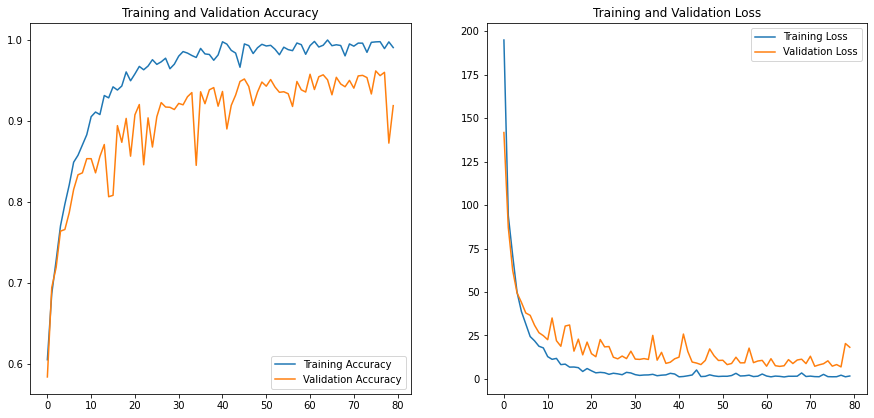

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions,target_names = ['NORMAL','COVID']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

      NORMAL       1.00      0.79      0.88      1161
       COVID       0.88      1.00      0.93      1742

    accuracy                           0.91      2903
   macro avg       0.94      0.89      0.91      2903
weighted avg       0.92      0.91      0.91      2903

